<a href="https://colab.research.google.com/github/AmandineLecerfDefer/OC_P5_Segmentez_des_clients_d-un_site_e-commerce/blob/main/POLIST_01_notebookanalyse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center><u><font color='red'>Projet 5 : Segmentez des clients d'un site e-commerce</font></u></center>

Amandine Lecerf Defer

## <font color='green'>Setting up the work environment</font>

### <font color='blue'>Library</font>

In [ ]:
# if problem
# !pip3 install jupyter
# !ipython kernel install --name=python3 --user

# in terminal
# python -m pip install ipykernel
# python -m ipykernel install --user

!pip install missingno
!pip install termcolor
!pip install shapely
!pip install geopandas
!pip install wordcloud

In [ ]:
# import packages
import missingno as msno
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
import seaborn as sns
import math
from termcolor import colored
from datetime import datetime
from datetime import timedelta

import scipy.stats as stats
from scipy.stats.stats import pearsonr

from scipy import stats
from scipy.stats import variation

import collections
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

pd.options.mode.chained_assignment = None

pd.options.display.width = 0

In [ ]:
# Installation : 
!pip install flake8 pycodestyle pycodestyle_magic
# Activate %%flake8 magic function
%load_ext pycodestyle_magic

# module to know if the text is with pep8 reglementation
# !pip install pycodestyle flake8
# !pip install pycodestyle_magic
# %load_ext pycodestyle_magic
# automatic search for the entire document : %pycodestyle_on  or %flake8_on to turn off : %pycodestyle_off or %flake8_off
# for each cell :  %%pycodestyle or %%flake8
# %%flake8 block showing output and to see ouptut, put %%flake8 in comment

The pycodestyle_magic extension is already loaded. To reload it, use:
  %reload_ext pycodestyle_magic


### <font color='blue'>Functions</font>

In [ ]:
# %%flake8
def informations(dataframe):
    """This function gives the general information of a dataset.
    It returns the number of rows and columns of the dataset.
    dataframe : dataset"""
    print(colored("\n Overview of the dataset : \n", 'red'))
    print(dataframe.head())
    lines = dataframe.shape[0]
    columns = dataframe.shape[1]
    print(colored("The dataset has {} rows and {} "
                  "columns. \n \n".format(lines, columns), 'blue'))
    print(colored("Column's name : \n", 'green'))
    print(dataframe.columns)
    print("\n")
    print(colored("Column's Type : \n", 'green'))
    print(dataframe.dtypes)
    print("\n \n")

In [ ]:
# %%flake8
def pie_NaN(dataframe, size):
    """This function allows to make a pie plot showing the
    proportion of missing data on the whole dataset.
    dataframe : dataset
    size : size of the figure (X,X)"""
    lines = dataframe.shape[0]
    columns = dataframe.shape[1]
    # NAN data
    nb_data = dataframe.count().sum()
    # Total data = (colonnes*lignes)
    nb_totale = (columns*lines)
    # Filling rate
    rate_dataOK = (nb_data/nb_totale)
    print("The data set is filled in at {:.2%}".format(rate_dataOK))
    print("and it has {:.2%} of missing data".format(1-rate_dataOK))
    print("\n \n ")
    # Pie Plot
    rates = [rate_dataOK, 1 - rate_dataOK]
    labels = ["Données", "NAN"]
    explode = (0, 0.1)
    colors = ['gold', 'pink']
    # Plot
    plt.figure(figsize=size)
    plt.pie(rates, explode=explode, labels=labels, colors=colors,
            autopct='%.2f%%', shadow=True, textprops={'fontsize': 26})
    ttl = plt.title("Fill rate of the dataset", fontsize=32)
    ttl.set_position([0.5, 0.85])
    plt.axis('equal')
    # ax.legend(labels, loc = "upper right", fontsize = 18)
    plt.tight_layout()
    plt.show()

In [ ]:
# %%flake8
def graph_fill_variable(dataframe, size):
    """This function allows to make barplot to show the distribution
    of the data between the different columns of the dataset.
    dataframe : dataset
    size : size of the figure (X, X)
    """
    df = pd.DataFrame(round(
        dataframe.shape[0] - dataframe.isna().sum())/dataframe.shape[0],
        columns=['Filling rate']).sort_values(
        'Filling rate', ascending=False).reset_index()
    fig, ax = plt.subplots(figsize=size)
    sns.barplot(y=df['index'], x='Filling rate', data=df)
    plt.title('Fill rate of the variables - %', fontsize=30)
    plt.show()

In [ ]:
# %%flake8
def duplicate(dataframe, depend_on):
    """This function allows to delete duplicated elements in the dataset.
    dataframe : dataset
    depend_on : Variable used to search for duplicates."""
    before = len(dataframe)
    dataframe.drop_duplicates(inplace=True, subset=[depend_on])
    after = len(dataframe)
    print("There are {} duplicates that have been removed from the dataset"
          .format(before-after))
    return dataframe

In [ ]:
# %%flake8
def plot_multiple_histograms(dataframe, size):
    """This function allows you to see graphically
    the shape of numerical variables by representing their density.
    dataframe : dataser
    size : size of the figure (x,x)"""
    cols = dataframe.select_dtypes(include=
                                   'number').columns.tolist()
    if cols is None:
        print("There are no numeric columns.")
        pass
    else : 
        num_plots = len(cols)
        num_cols = math.ceil(np.sqrt(num_plots))
        num_rows = math.ceil(num_plots/num_cols)
        fig, axs = plt.subplots(num_rows, num_cols, figsize=size)
        for ind, col in enumerate(cols):
            i = math.floor(ind/num_cols)
            j = ind - i*num_cols
            if num_rows == 1:
                if num_cols == 1:
                    sns.distplot(dataframe[col], kde=True, ax=axs)
                else:
                    sns.distplot(dataframe[col], kde=True, ax=axs[j])
            else:
                sns.distplot(dataframe[col], kde=True, ax=axs[i, j])

In [ ]:
# %%flake8
def description_var(dataframe):
    """This function allows the statistical analysis of
    numerical variables and the creation of an associated boxplot.
    """
    df = dataframe.select_dtypes(include='number')
    for col in df:
        colData = df[col]
        mean = np.mean(colData)
        median = np.median(colData)
        Q1 = np.percentile(colData, 25)
        Q3 = np.percentile(colData, 75)
        max = colData.max()
        min = colData.min()
        variance = np.var(colData)
        standard_deviation = np.std(colData)
        skew = pd.DataFrame(colData).skew()[0]
        kurt = pd.DataFrame(colData).kurtosis()[0]
        print("Statistical measures for the variable {} \n" .format(col))
        print("The average of the variable {} is : {}".format(
            col, round(mean, 2)))
        print("The median of the variable {} is : {}".format(
            col, round(median, 2)))
        print("Quartile Q1 is : {} ".format(round(Q1, 2)))
        print("Quartile Q3 is : : {} ".format(round(Q3, 2)))
        print("The maximum is : {} ".format(max))
        print("The minimum is : {} \n \n".format(min))
        print("Measures of dispersion for the variable {} \n" .format(col))
        print("The variance of the variable {} is : {} " .format(
            col, round(variance, 2)))
        print("The standard deviation of the variable {} is : {} " .format(
            col, round(standard_deviation, 2)))
        print("The coefficient of variation of the variable {} is : {}"
              .format(col, round(variation(colData), 2)))
        print("The interquartile range of the variable {} is : {} \n \n"
              .format(col, round(Q3-Q1, 2)))
        print("Shape measures for the variable {}\n" .format(col))
        print("The empirical skewness for the variable {} is {} " .format(
            col, round(skew, 4)))
        if (skew == 0):
            print("The distribution of the variable {} is symmetric.\n"
                  .format(col))
        elif (skew > 0):
            print("The distribution of the variable {} is spread"
                  "to the right. \n".format(col))
        else:
            print("The distribution of the variable {} is spread"
                  "to the left.\n" .format(col))
        print("The empirical Kurtosis for the variable {} is {} " .format(
            col, round(kurt, 4)))
        if kurt == 0:
            print("The distribution of the variable {} has the same smoothness"
                  "as the normal distribution.\n" .format(col))
        elif kurt > 0:
            print("The distribution of the variable {} is less flat"
                  "than the normal distribution, the observations"
                  "are more concentrated.\n"
                  .format(col))
        else:
            print("The distribution of the variable {} is flatter"
                  " than the normal distribution, the observations"
                  "are less concentrated.\n"
                  .format(col))
        plt.figure(figsize=(10, 8))
        df[col].hist(color='pink', edgecolor='red', log=True, )
        plt.title("Statistical representation of the variable {}"
                  "\n".format(col))
        plt.show()
        print("Boxplot of the variable {}".format(col))
        plt.figure(figsize=(6, 6))
        df.boxplot(column=[col], return_type='axes', vert=True,
                   showfliers=False, showcaps=True, patch_artist=True,
                   color='tan', medianprops={'linestyle': '-',
                                             'linewidth': 2, 'color': 'red'},
                   whiskerprops={'linestyle': '-', 'linewidth': 2,
                                 'color': 'blue'},
                   capprops={'linestyle': '-', 'linewidth': 2,
                             'color': 'blue'})
        plt.show()
        print("\n \n")

In [ ]:
# %%flake8
def verif_normalite(dataframe):
    """This function allows to check the normality of numerical variables.
    """
    numeric_columns = dataframe.select_dtypes(
        include=['int64', 'float64']).columns
    for column in numeric_columns:
        print('__\n{}'.format(column))
        k2, p = stats.normaltest(dataframe[column],
                                 axis=0,
                                 nan_policy='omit')
        alpha = 5e-2
        print("p = {:g}".format(p))
        if p < alpha:  # null hypothese: x as a normal distribution
            print(
                "H0 is rejected : {} is not normally distributed"
                .format(column))
        else:
            print(
                "H0 cannot be rejected:{} is normally distributed"
                .format(column))

In [ ]:
# %%flake8
def delete_outliers_IQR(dataframe, n):
    """Removal of outliers by the Interquartile method for variables
    following a normal distribution.
    dataframe : dataset
    n = number of extreme values to be taken
    into account to consider that a line is outlier."""
    indexes_outliers = []
    dd = df_in.select_dtypes(include=['int64', 'float64']).columns.tolist()
    for col_name in dd:
        print('colonne ', col_name)
        Q1 = dataframe[col_name].quantile(0.25)
        Q3 = dataframe[col_name].quantile(0.75)
        IQR = Q3 - Q1
        lower_limit = Q1 - 1.5*IQR
        upper_limit = Q3 + 1.5*IQR
        lower_limit, upper_limit
        list_outliers = dataframe[(dataframe[col_name] < lower_limit) |
                                  (dataframe[col_name] > upper_limit)].index
        indexes_outliers.extend(list_outliers)
    indexes_outliers = Counter(indexes_outliers)
    multiple_outliers = list(k for k, v in indexes_outliers.items() if v > n)
    print(" ")
    print("remove {} outliers" .format(len(multiple_outliers)))
    dataframe.drop(multiple_outliers, axis=0,
                   inplace=True).reset_index(drop=True)

In [ ]:
# %%flake8
def delete_outliers_percentiles(dataframe):
    '''Removal of extreme percentile outliers.
    dataframe : dataset'''
    numeric_columns = dataframe.select_dtypes(include=
                                              'number').columns.tolist()
    if numeric_columns:
        for column in numeric_columns :
            dataframe.loc[dataframe[column] > dataframe[column].quantile(0.995)] = np.nan
            dataframe.loc[dataframe[column] < dataframe[column].quantile(0.005)] = np.nan
            dataframe.loc[dataframe[column] < 0] = np.nan
            dataframe.dropna(inplace=True)

In [ ]:
# %%flake8
def graphe_categories(dataframe, size):
    """This function represents the categorical
    variables as a pie plot and histogram.
    dataframe : dataset
    size : size of the figure (X,X)"""
    object_df = dataframe.select_dtypes(include=['category'])
    columns_object_df = list(object_df)
    for col in columns_object_df :
        values = dataframe[col].value_counts()
        labels = dataframe[col].value_counts().index
        # Pie Plot
        plt.figure(figsize=size)
        plt.title("Représentation de la variable {}" .format(col), fontsize = 24) 
        plt.pie(values, labels=labels,
                autopct='%.1f%%', shadow=True, textprops={'fontsize': 20})
        #ttl.set_position([0.5, 1.05])
        plt.axis('equal')
        plt.tight_layout() 
        plt.show()
        print("\n \n \n")
        # Plot
        plt.figure(figsize=size)
        ax=sns.countplot(x = dataframe[col])
        plt.title("Représentation de la variable {}" .format(col), fontsize = 24)
        plt.rc('xtick', labelsize=14)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=70, ha="right")
        plt.tight_layout()
        plt.show()
        print("\n \n \n")

In [ ]:
# %%flake8
def pie_col_category(dataframe, col, size):
    """This function represents the categorical variables as a pie plot.
    dataframe : dataset
    size : size of the figure (X,X)"""
    values = dataframe[col].value_counts()
    labels = dataframe[col].value_counts().index
    # Plot
    plt.figure(figsize=size)
    plt.title("Représentation de la variable {}" .format(
        col), fontsize=20)
    plt.pie(values, labels=labels,
            autopct='%.1f%%', shadow=True, textprops={'fontsize': 20})
    plt.axis('equal')
    plt.tight_layout()
    plt.show()
    print("\n \n \n")

In [ ]:
# %%flake8
def hist_col_categories(dataframe, col, size):
    """This function represents the categorical variables as a histogram.
    dataframe : dataset
    size : size of the figure (X,X)"""
    # Plot
    plt.figure(figsize=size)
    ax = sns.countplot(x=dataframe[col],
                       order=dataframe[col].value_counts().index)
    plt.title("Representation of the variable {}" .format(col), fontsize=24)
    plt.rc('xtick', labelsize=14)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=70, ha="right")
    plt.tight_layout()
    plt.show()
    print("\n \n \n")

In [ ]:
# %%flake8
def graphe_objet(dataframe):
    """This function allows the creation of
    WordCloud and histograms 
    for the most common occurrences.
    dataframe : dataset"""
    from wordcloud import WordCloud, STOPWORDS
    object_df = dataframe.select_dtypes(include=['object'])
    columns_object_df = list(object_df)
    for col in columns_object_df :
        counts = dataframe[col].value_counts()
        counts.index = counts.index.map(str)
        wordcloud = WordCloud(
            background_color='white',
            stopwords=STOPWORDS,
            max_words=200,
            max_font_size=40, 
            scale=3,
            random_state=5 # chosen at random by flipping a coin; it was heads
        ).generate_from_frequencies(counts)
        fig = plt.figure(1, figsize=(12, 12))
        plt.axis('off')
        fig.suptitle("WordCloud of the variable {}" .format(col), fontsize=20)
        fig.subplots_adjust(top=2.3)
        plt.imshow(wordcloud)
        plt.show()
        print("\n \n")
        count  = dataframe[col].value_counts()
        count = count[:20,]
        plt.figure(figsize=(15,10))
        sns.set(style="whitegrid")
        sns.barplot(count.values, count.index, alpha=0.8, orient = 'h')
        plt.title("Top 20 number of occurrences for the variable {}" .format(col))
        plt.xlabel('Number of Occurrences', fontsize=12)
        plt.show()
        print("\n \n \n \n \n")

In [ ]:
# %%flake8
def plot_date_dist(df, feature_w_date):
    """plot the distribution of one feature date
    df : dataframe
    feature_w_date : Date column to plot"""

    df_tmp = pd.DataFrame(pd.DatetimeIndex(df[feature_w_date]).to_period('M'))
    tmp = df_tmp[feature_w_date].value_counts()
    df_tmp = pd.DataFrame({
                            feature_w_date : tmp.index,
                            'Quantity': tmp.values
                          })
    df_tmp = df_tmp.sort_values(by=feature_w_date)
    
    fig, ax = plt.subplots(figsize=(12,6))
    sns.set_color_codes("pastel")

    s = sns.barplot(ax = ax,
                    x = feature_w_date,
                    y = 'Quantity',
                    data = df_tmp)
    plt.xticks(rotation=45)
    plt.show();

In [ ]:
# %%flake8
def plot_hist_stats(df, feature, title=None, verticale=False):
    """Displays the histogram of a characteristic
    df : dataframe
    feature : column to plot
    title : title of the plot
    verticale : verticalization of xtick"""
    tmp = df[feature].value_counts()
    df_tmp = pd.DataFrame({
                            feature: tmp.index,
                            'Quantity': tmp.values
                          })
    fig, ax = plt.subplots(figsize=(15, 6))
    sns.set_color_codes("pastel")

    s = sns.barplot(ax=ax,
                    x=feature,
                    y='Quantity',
                    data=df_tmp)
    if title != None:
        plt.title(title)

    if verticale == True:
        plt.xticks(rotation=90)

    plt.tick_params(axis='both', which='major', labelsize=10)

    plt.show();

In [ ]:
# %%flake8
def filtration_columns(dataframe, filling_rate):
  """filtration of the columns of a dataframe according to a predefined filling rate of the columns
  dataframe : Dataframe to be filtered
  filling_rate : filling rate"""
  dataframe = dataframe.replace(to_replace='^nan$',
                                value=np.nan, regex=True)
  indexes = []
  # number of columns at the origin
  nb_colonne = dataframe.shape[1]
  for col_name in dataframe.columns.tolist():
      rate_data_column = (dataframe[col_name].shape[0] - dataframe[col_name]
                            .isna().sum())/dataframe[col_name].shape[0]
  # fill rate for each column :
  # (numberofline-numberofNANspercolumn)/numberofline
      if rate_data_column < filling_rate:
          # Filtration of the columns whose filling is higher than the limit
          dataframe.drop(col_name, axis=1, inplace=True)
  # nombre de colonnes au final
  nb_column_supp = nb_colonne - dataframe.shape[1]
  if nb_column_supp == 0:
      print("All the columns have a filling rate higher than {:.2%}"
            .format(filling_rate))
  else :
      print("Number of columns with a fill rate greater than {:.2%}: "
            "{} columns."
            .format(filling_rate, dataframe.shape[1]))
      print("Number of deleted columns: {} columns".format(nb_column_supp))
      print("\n")        
  return dataframe

In [ ]:
# %%flake8
def scatter_plot(dataframe_point, colX, colY, dataframe_reg, hue=None):
    """This function shows graphically the relationship
    between two variables by creating a scatter plot.
    dataframe_point : dataframe to make plot
    colX : variable plotting on x axis
    colY : variable plotting on y axis
    dataframe_reg : dataframe to make regression
    hue : plot color by a specific variable by default None"""
    print("The Pearson coefficient is {:.2f}".format(np.corrcoef(dataframe_point[colX],
                                                                   dataframe_point[colY])[0][1]))
    sns.set(style="darkgrid", color_codes=True)
    sns.set(rc={'figure.figsize':(15,10)})
    r, p = stats.pearsonr(dataframe_reg[colX], dataframe_reg[colY])
    slope, intercept, r_value, p_value, std_err = stats.linregress(
        dataframe_reg[colX], dataframe_reg[colY])
    ax = sns.scatterplot(data=dataframe_point, x=colX, y=colY, hue=hue)
    p=sns.regplot(data=dataframe_reg, x=colX, y=colY, scatter=False,
                  ci=68, ax=ax, line_kws={'color':'red'})
    p.annotate(f'y={slope:.2f}x+{intercept:.1f}\n R2={r*r:.4f}',
                      xy=(0.1, 0.9), xycoords='axes fraction',
                      ha='left', va='center',
                      color='black',
                      fontweight="bold",
                      bbox={'boxstyle': 'round', 'fc': 'pink', 'ec': 'purple'})
    plt.title("Relationship between the variable {} and the variable {}".format(colX, colY),
              fontsize=18, fontweight="bold")
    plt.tight_layout()    
    plt.show()

## <font color='green'>CSV Importation</font>

In [ ]:
# %%flake8
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/My\ Drive/Data_projet_OC
!ls

customers = pd.read_csv('/content/drive/MyDrive/Data_projet_OC/'
                        'olist_customers_dataset.csv')

geolocalisation = pd.read_csv('/content/drive/MyDrive/Data_projet_OC/'
                              'olist_geolocation_dataset.csv')

order_items = pd.read_csv('/content/drive/MyDrive/Data_projet_OC/'
                          'olist_order_items_dataset.csv')

order_payments = pd.read_csv('/content/drive/MyDrive/Data_projet_OC/'
                             'olist_order_payments_dataset.csv')

order_reviews = pd.read_csv('/content/drive/MyDrive/Data_projet_OC/'
                            'olist_order_reviews_dataset.csv')

orders = pd.read_csv('/content/drive/MyDrive/Data_projet_OC/'
                     'olist_orders_dataset.csv')

products = pd.read_csv('/content/drive/MyDrive/Data_projet_OC/'
                       'olist_products_dataset.csv')

sellers = pd.read_csv('/content/drive/MyDrive/Data_projet_OC/'
                      'olist_sellers_dataset.csv')

product_category = pd.read_csv('/content/drive/MyDrive/Data_projet_OC/'
                               'product_category_name_translation.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Data_projet_OC
bd_olist_finale.csv		  olist_order_reviews_dataset.csv
olist_customers_dataset.csv	  olist_orders_dataset.csv
olist_geolocation_dataset.csv	  olist_products_dataset.csv
olist_order_items_dataset.csv	  olist_sellers_dataset.csv
olist_order_payments_dataset.csv  product_category_name_translation.csv


In [ ]:
"""# %%flake8
customers = pd.read_csv("/Users/amandinelecerfdefer/Desktop/"
                        "Formation_Data_Scientist_OC/WORK-projet5/Data/"
                        "olist_customers_dataset.csv")

geolocalisation = pd.read_csv("/Users/amandinelecerfdefer/Desktop/"
                              "Formation_Data_Scientist_OC/WORK-projet5/Data/"
                              "olist_geolocation_dataset.csv")

order_items = pd.read_csv("/Users/amandinelecerfdefer/Desktop/"
                          "Formation_Data_Scientist_OC/WORK-projet5/Data/"
                          "olist_order_items_dataset.csv")

order_payments = pd.read_csv("/Users/amandinelecerfdefer/Desktop/"
                             "Formation_Data_Scientist_OC/WORK-projet5/Data/"
                             "olist_order_payments_dataset.csv")

order_reviews = pd.read_csv("/Users/amandinelecerfdefer/Desktop/"
                            "Formation_Data_Scientist_OC/WORK-projet5/Data/"
                            "olist_order_reviews_dataset.csv")

orders = pd.read_csv("/Users/amandinelecerfdefer/Desktop/"
                     "Formation_Data_Scientist_OC/WORK-projet5/Data/"
                     "olist_orders_dataset.csv")

products = pd.read_csv("/Users/amandinelecerfdefer/Desktop/"
                       "Formation_Data_Scientist_OC/WORK-projet5/Data/"
                       "olist_products_dataset.csv")

sellers = pd.read_csv("/Users/amandinelecerfdefer/Desktop/"
                      "Formation_Data_Scientist_OC/WORK-projet5/Data/"
                      "olist_sellers_dataset.csv")

product_category = pd.read_csv("/Users/amandinelecerfdefer/Desktop/"
                               "Formation_Data_Scientist_OC/WORK-projet5/Data/"
                               "product_category_name_translation.csv")"""

'# %%flake8\ncustomers = pd.read_csv("/Users/amandinelecerfdefer/Desktop/"\n                        "Formation_Data_Scientist_OC/WORK-projet5/Data/"\n                        "olist_customers_dataset.csv")\n\ngeolocalisation = pd.read_csv("/Users/amandinelecerfdefer/Desktop/"\n                              "Formation_Data_Scientist_OC/WORK-projet5/Data/"\n                              "olist_geolocation_dataset.csv")\n\norder_items = pd.read_csv("/Users/amandinelecerfdefer/Desktop/"\n                          "Formation_Data_Scientist_OC/WORK-projet5/Data/"\n                          "olist_order_items_dataset.csv")\n\norder_payments = pd.read_csv("/Users/amandinelecerfdefer/Desktop/"\n                             "Formation_Data_Scientist_OC/WORK-projet5/Data/"\n                             "olist_order_payments_dataset.csv")\n\norder_reviews = pd.read_csv("/Users/amandinelecerfdefer/Desktop/"\n                            "Formation_Data_Scientist_OC/WORK-projet5/Data/"\n              

## <font color='green'>General presentation of CSVs</font>

#### <font color='purple'> Général </font>

In [ ]:
# %%flake8
datasets = [customers, geolocalisation, order_items, order_payments,
            order_reviews, orders, products, sellers, product_category]

In [ ]:
# %%flake8
list_names = ['customers', 'geolocalisation', 'order_items', 'order_payments',
              'order_reviews', 'orders', 'products', 'sellers',
              'product_category']

General presentation of the dataset customers.

 Overview of the dataset : 

                        customer_id  ... customer_state
0  06b8999e2fba1a1fbc88172c00ba8bc7  ...             SP
1  18955e83d337fd6b2def6b18a428ac77  ...             SP
2  4e7b3e00288586ebd08712fdd0374a03  ...             SP
3  b2b6027bc5c5109e529d4dc6358b12c3  ...             SP
4  4f2d8ab171c80ec8364f7c12e35b23ad  ...             SP

[5 rows x 5 columns]
The dataset has 99441 rows and 5 columns. 
 

Column's name : 

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')


Column's Type : 

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

 

The data set is filled in at 100.00%
and it has 0.00% of missing data

 
 


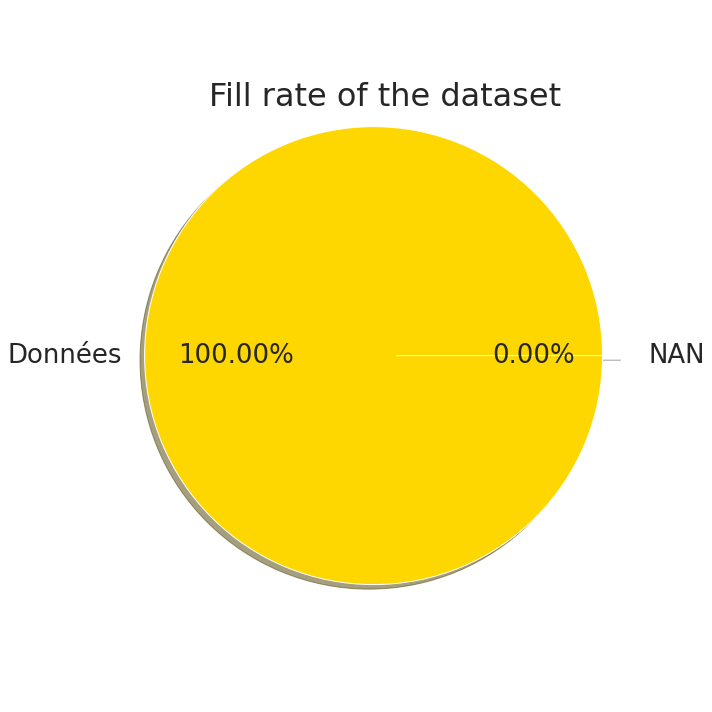

General presentation of the dataset geolocalisation.

 Overview of the dataset : 

   geolocation_zip_code_prefix  ...  geolocation_state
0                         1037  ...                 SP
1                         1046  ...                 SP
2                         1046  ...                 SP
3                         1041  ...                 SP
4                         1035  ...                 SP

[5 rows x 5 columns]
The dataset has 1000163 rows and 5 columns. 
 

Column's name : 

Index(['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng',
       'geolocation_city', 'geolocation_state'],
      dtype='object')


Column's Type : 

geolocation_zip_code_prefix      int64
geolocation_lat                float64
geolocation_lng                float64
geolocation_city                object
geolocation_state               object
dtype: object

 

The data set is filled in at 100.00%
and it has 0.00% of missing data

 
 


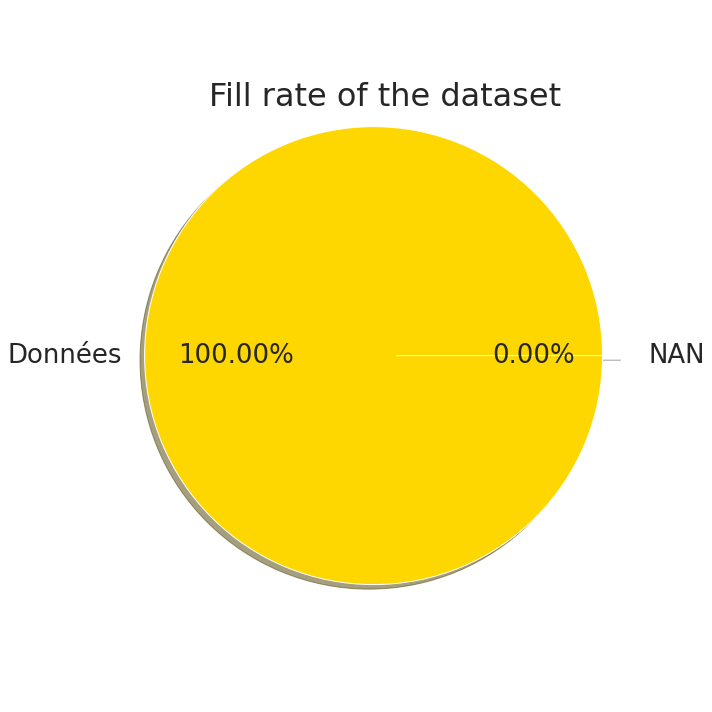

General presentation of the dataset order_items.

 Overview of the dataset : 

                           order_id  order_item_id  ...   price freight_value
0  00010242fe8c5a6d1ba2dd792cb16214              1  ...   58.90         13.29
1  00018f77f2f0320c557190d7a144bdd3              1  ...  239.90         19.93
2  000229ec398224ef6ca0657da4fc703e              1  ...  199.00         17.87
3  00024acbcdf0a6daa1e931b038114c75              1  ...   12.99         12.79
4  00042b26cf59d7ce69dfabb4e55b4fd9              1  ...  199.90         18.14

[5 rows x 7 columns]
The dataset has 112650 rows and 7 columns. 
 

Column's name : 

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')


Column's Type : 

order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value     

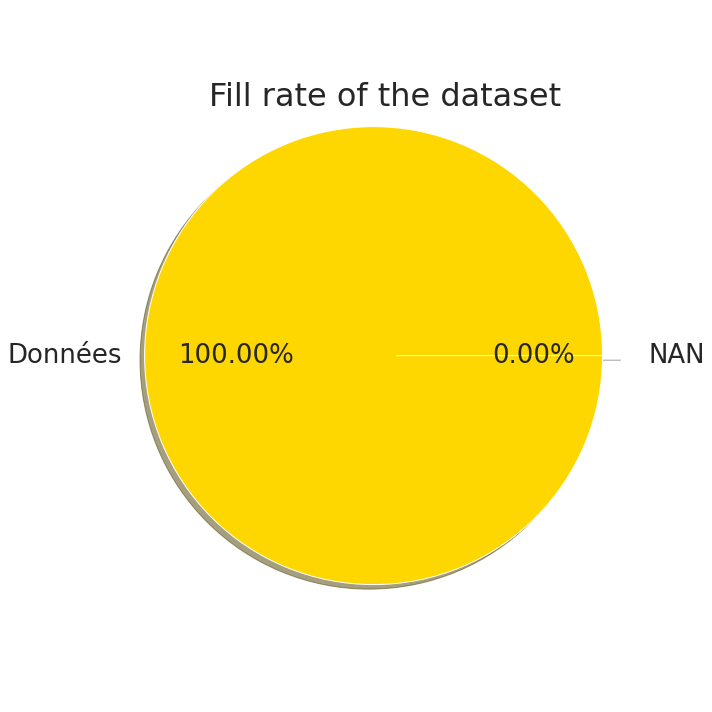

General presentation of the dataset order_payments.

 Overview of the dataset : 

                           order_id  ...  payment_value
0  b81ef226f3fe1789b1e8b2acac839d17  ...          99.33
1  a9810da82917af2d9aefd1278f1dcfa0  ...          24.39
2  25e8ea4e93396b6fa0d3dd708e76c1bd  ...          65.71
3  ba78997921bbcdc1373bb41e913ab953  ...         107.78
4  42fdf880ba16b47b59251dd489d4441a  ...         128.45

[5 rows x 5 columns]
The dataset has 103886 rows and 5 columns. 
 

Column's name : 

Index(['order_id', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value'],
      dtype='object')


Column's Type : 

order_id                 object
payment_sequential        int64
payment_type             object
payment_installments      int64
payment_value           float64
dtype: object

 

The data set is filled in at 100.00%
and it has 0.00% of missing data

 
 


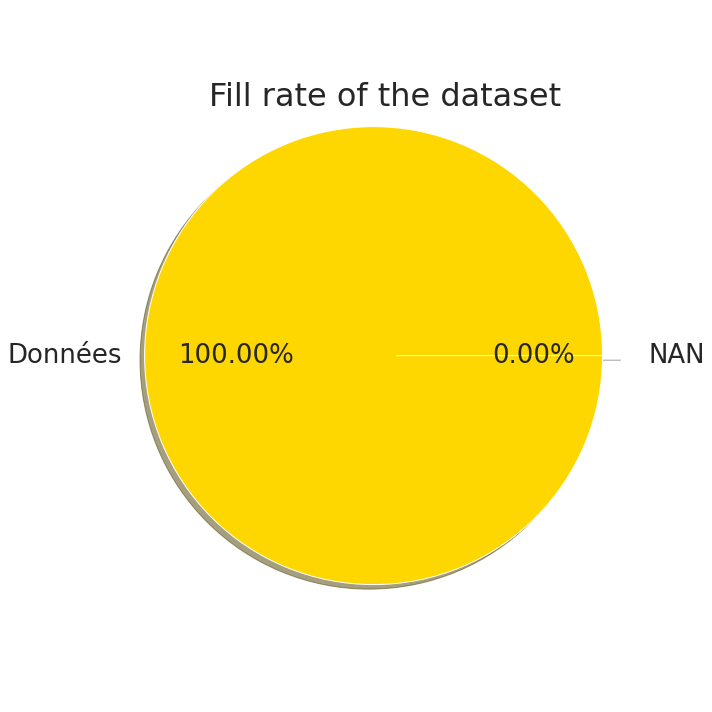

General presentation of the dataset order_reviews.

 Overview of the dataset : 

                          review_id  ... review_answer_timestamp
0  7bc2406110b926393aa56f80a40eba40  ...     2018-01-18 21:46:59
1  80e641a11e56f04c1ad469d5645fdfde  ...     2018-03-11 03:05:13
2  228ce5500dc1d8e020d8d1322874b6f0  ...     2018-02-18 14:36:24
3  e64fb393e7b32834bb789ff8bb30750e  ...     2017-04-21 22:02:06
4  f7c4243c7fe1938f181bec41a392bdeb  ...     2018-03-02 10:26:53

[5 rows x 7 columns]
The dataset has 100000 rows and 7 columns. 
 

Column's name : 

Index(['review_id', 'order_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp'],
      dtype='object')


Column's Type : 

review_id                  object
order_id                   object
review_score                int64
review_comment_title       object
review_comment_message     object
review_creation_date       object
review_answer_timestamp    objec

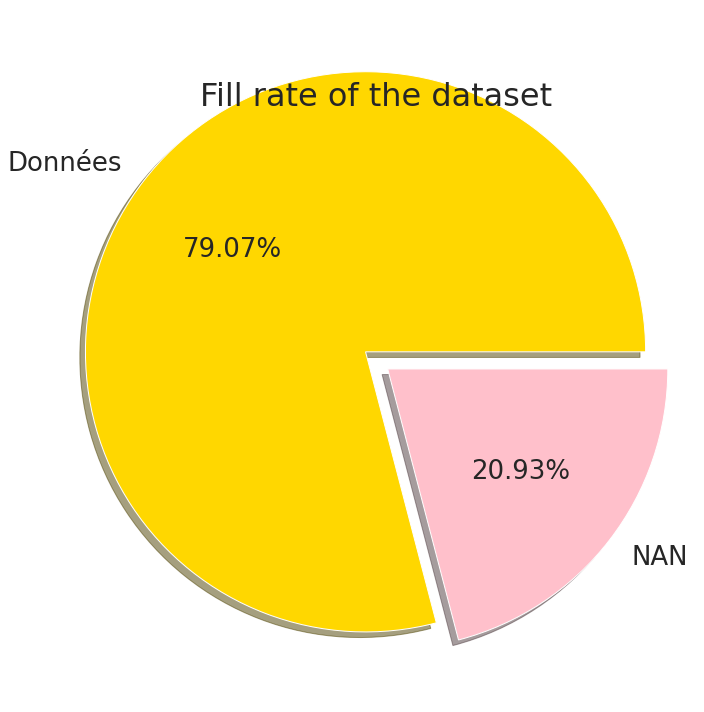

General presentation of the dataset orders.

 Overview of the dataset : 

                           order_id  ... order_estimated_delivery_date
0  e481f51cbdc54678b7cc49136f2d6af7  ...           2017-10-18 00:00:00
1  53cdb2fc8bc7dce0b6741e2150273451  ...           2018-08-13 00:00:00
2  47770eb9100c2d0c44946d9cf07ec65d  ...           2018-09-04 00:00:00
3  949d5b44dbf5de918fe9c16f97b45f8a  ...           2017-12-15 00:00:00
4  ad21c59c0840e6cb83a9ceb5573f8159  ...           2018-02-26 00:00:00

[5 rows x 8 columns]
The dataset has 99441 rows and 8 columns. 
 

Column's name : 

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')


Column's Type : 

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object


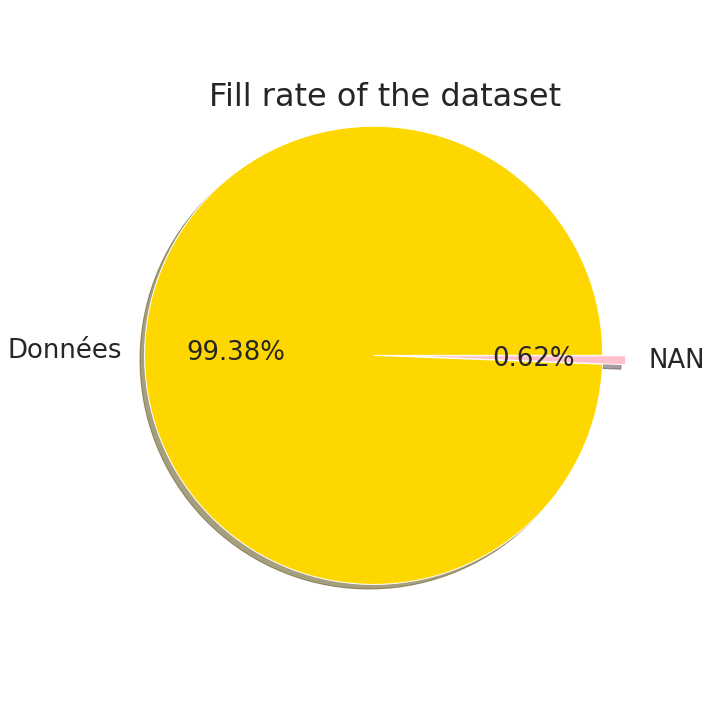

General presentation of the dataset products.

 Overview of the dataset : 

                         product_id  ... product_width_cm
0  1e9e8ef04dbcff4541ed26657ea517e5  ...             14.0
1  3aa071139cb16b67ca9e5dea641aaa2f  ...             20.0
2  96bd76ec8810374ed1b65e291975717f  ...             15.0
3  cef67bcfe19066a932b7673e239eb23d  ...             26.0
4  9dc1a7de274444849c219cff195d0b71  ...             13.0

[5 rows x 9 columns]
The dataset has 32951 rows and 9 columns. 
 

Column's name : 

Index(['product_id', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')


Column's Type : 

product_id                     object
product_category_name          object
product_name_lenght           float64
product_description_lenght    float64
product_photos_qty            float64
product_weight_g              float64
pr

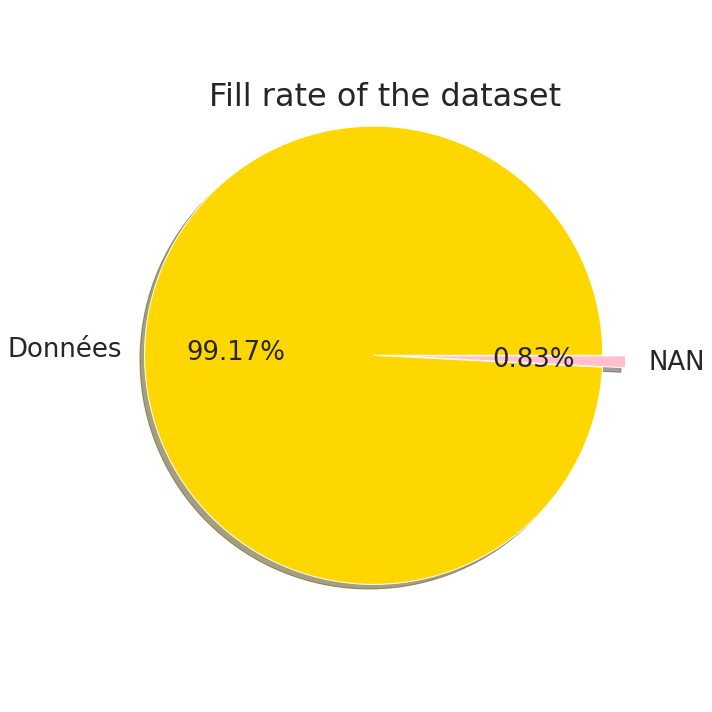

General presentation of the dataset sellers.

 Overview of the dataset : 

                          seller_id  ...  seller_state
0  3442f8959a84dea7ee197c632cb2df15  ...            SP
1  d1b65fc7debc3361ea86b5f14c68d2e2  ...            SP
2  ce3ad9de960102d0677a81f5d0bb7b2d  ...            RJ
3  c0f3eea2e14555b6faeea3dd58c1b1c3  ...            SP
4  51a04a8a6bdcb23deccc82b0b80742cf  ...            SP

[5 rows x 4 columns]
The dataset has 3095 rows and 4 columns. 
 

Column's name : 

Index(['seller_id', 'seller_zip_code_prefix', 'seller_city', 'seller_state'], dtype='object')


Column's Type : 

seller_id                 object
seller_zip_code_prefix     int64
seller_city               object
seller_state              object
dtype: object

 

The data set is filled in at 100.00%
and it has 0.00% of missing data

 
 


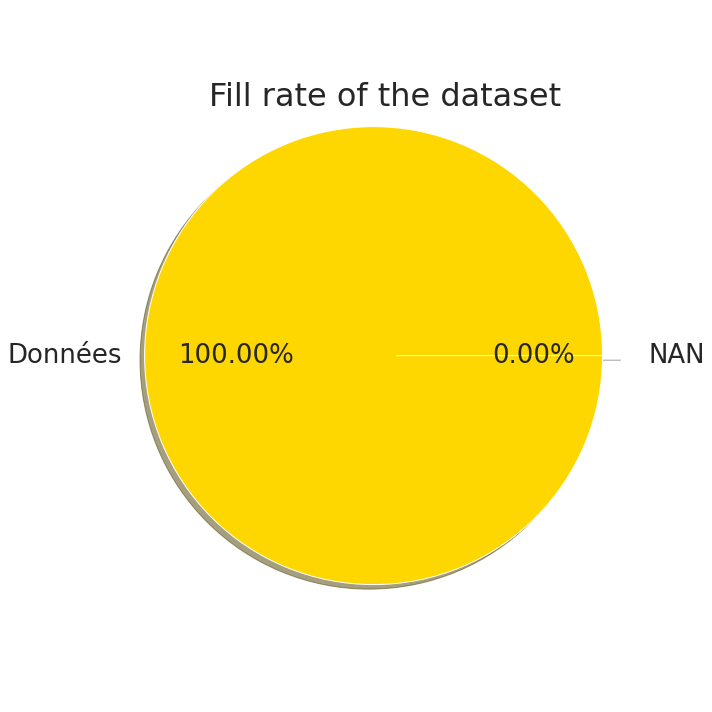

General presentation of the dataset product_category.

 Overview of the dataset : 

    product_category_name product_category_name_english
0            beleza_saude                 health_beauty
1  informatica_acessorios         computers_accessories
2              automotivo                          auto
3         cama_mesa_banho                bed_bath_table
4        moveis_decoracao               furniture_decor
The dataset has 71 rows and 2 columns. 
 

Column's name : 

Index(['product_category_name', 'product_category_name_english'], dtype='object')


Column's Type : 

product_category_name            object
product_category_name_english    object
dtype: object

 

The data set is filled in at 100.00%
and it has 0.00% of missing data

 
 


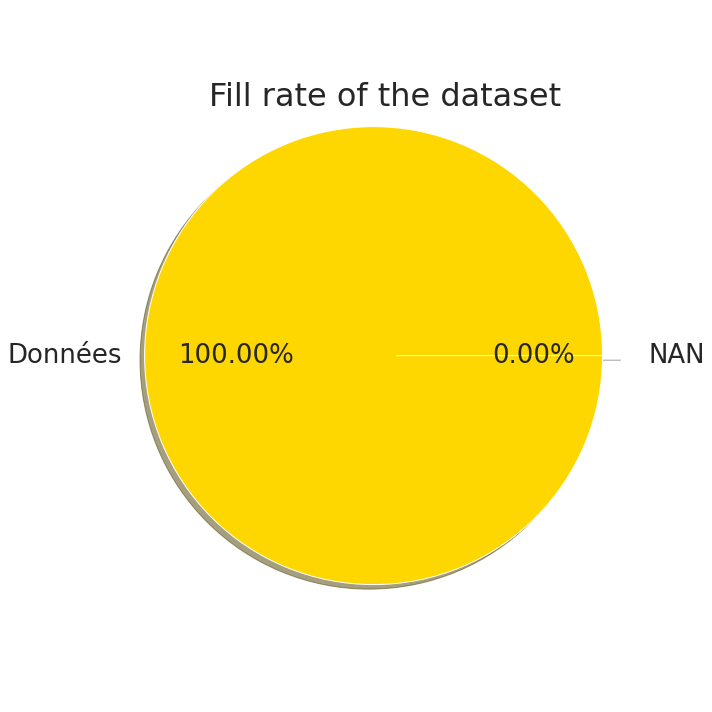

Dataset    Lines  Columns
0         customers    99441        5
1   geolocalisation  1000163        5
2       order_items   112650        7
3    order_payments   103886        5
4     order_reviews   100000        7
5            orders    99441        8
6          products    32951        9
7           sellers     3095        4
8  product_category       71        2

In [ ]:
# %%flake8
resume = []
for name in list_names:
    pos = list_names.index(name)
    dataset = datasets[pos]
    print("General presentation of the dataset {}." .format(name))
    informations(dataset)
    pie_NaN(dataset, (10, 10))
    resume.append(
        {
            'Dataset': name,
            'Lines': dataset.shape[0],
            'Columns': dataset.shape[1]
        }
    )

pd.DataFrame(resume)

The Customers dataset gathers information about a customer. It contains his identifier, a unique identifier, the zip code of the place where the buyer lives, his city and his country.

- customer_id :
key to the orders dataset. Each order has a unique customer_id.

- customer_unique_id:
unique identifier of a customer.

- customer_zip_code_prefix:
first five digits of customer zip code

- customer_city
customer city name

- customer_state
customer state


The Geolocalisation dataset allows the correspondence between customers custom_state, zip code and city name and sellers. It can be linked to customers by the link that exists between the two datasets and especially the columns customer_zip_code_prefix and geolocation_zip_code_prefix.

- geolocation_zip_code_prefix : first 5 digits of zip code

- geolocation_lat : latitude

- geolocation_lng : longitude

- geolocation_city : city name

- geolocation_state : state

The orders item dataset gives information on the different commands (id order, number of product, id of product, seller id, limit shipping date, total price and expedition tax).

- order_id :
order unique identifier

- order_item_id :
sequential number identifying number of items included in the same order.

- product_id :
product unique identifier

- seller_id :
seller unique identifier

- shipping_limit_date : 
Shows the seller shipping limit date for handling the order over to the logistic partner.

- price :
item price

- freight_value :
item freight value item (if an order has more than one item the freight value is splitted between items)

Order Payment : Information about the payment the customer has made for an order (id, number of part for payment, payment type, value).

- order_id :
unique identifier of an order.

- payment_sequential :
a customer may pay an order with more than one payment method. If he does so, a sequence will be created to accommodate all payments.

- payment_type :
method of payment chosen by the customer.

- payment_installments :
number of installments chosen by the customer.

- payment_value :
transaction value.

Order review : This dataset contains the evaluations that each customer makes per order (id, order id, score out of 5, title, comment, creation date, answer date).

- review_id :
unique review identifier

- order_id
unique order identifier

- review_score :
Note ranging from 1 to 5 given by the customer on a satisfaction survey.

- review_comment_title :
Comment title from the review left by the customer, in Portuguese.

- review_comment_message :
Comment message from the review left by the customer, in Portuguese.

- review_creation_date :
Shows the date in which the satisfaction survey was sent to the customer.

- review_answer_timestamp :
Shows satisfaction survey answer timestamp

The Order dataset contains information about the orders (id, customer id, status, purchase date, approval date, delivered date (carrier & customers), delivery date). It can be linked to customers by the link that exists between the two datasets and especially the customers_id and it can be linked to order_review, order_payment and order_item by the link that exists between datasets and especially order_id.

- order_id :
unique identifier of the order.

- customer_id :
key to the customer dataset. Each order has a unique customer_id.

- order_status :
Reference to the order status (delivered, shipped, etc).

- order_purchase_timestamp :
Shows the purchase timestamp.

- order_approved_at :
Shows the payment approval timestamp.

- order_delivered_carrier_date :
Shows the order posting timestamp. When it was handled to the logistic partner.

- order_delivered_customer_date :
Shows the actual order delivery date to the customer.

- order_estimated_delivery_date :
Shows the estimated delivery date that was informed to customer at the purchase moment.

The product dataset contains information about the product (id, category, lenght of product name and description, number of photos and dimensions of the product). It can be liked to order_item by the product id.

- product_id :
unique product identifier

- product_category_name :
root category of product, in Portuguese.

- product_name_lenght :
number of characters extracted from the product name.

- product_description_lenght :
number of characters extracted from the product description.

- product_photos_qty :
number of product published photos

- product_weight_g :
product weight measured in grams.

- product_length_cm :
product length measured in centimeters.

- product_height_cm :
product height measured in centimeters.

- product_width_cm :
product width measured in centimeters.

The seller dataset contains information about the sellers (id, zip code, city and state). It can be liked to order_item by the seller id and with geolocalisation by zip code prefix.

- seller_id :
seller unique identifier

- seller_zip_code_prefix :
first 5 digits of seller zip code

- seller_city :
seller city name

- seller_state :
seller state

The product category table allows the conversion of product names into English.

- product_category_name :
category name in Portugues

- product_category_name_english :
category name in English

#### <font color='purple'> Shape </font>

In [ ]:
for name in list_names:
    pos = list_names.index(name)
    dataset = datasets[pos]
    print("Shape of the dataset {}." .format(name))
    print(dataset.shape)
    print("\n")

Shape of the dataset customers.
(99441, 5)


Shape of the dataset geolocalisation.
(1000163, 5)


Shape of the dataset order_items.
(112650, 7)


Shape of the dataset order_payments.
(103886, 5)


Shape of the dataset order_reviews.
(100000, 7)


Shape of the dataset orders.
(99441, 8)


Shape of the dataset products.
(32951, 9)


Shape of the dataset sellers.
(3095, 4)


Shape of the dataset product_category.
(71, 2)




#### <font color='purple'> Missing Data </font>

In [ ]:
for name in list_names:
    pos = list_names.index(name)
    dataset = datasets[pos]
    lines = dataset.shape[0]
    columns = dataset.shape[1]
    nb_data = dataset.count().sum()
    nb_totale = (columns*lines)
    rate_dataOK = (nb_data/nb_totale)
    print("NAN of the dataset {}." .format(name))
    print("There is {:.2%} of missing data".format(1-rate_dataOK))
    print("\n")

NAN of the dataset customers.
There is 0.00% of missing data


NAN of the dataset geolocalisation.
There is 0.00% of missing data


NAN of the dataset order_items.
There is 0.00% of missing data


NAN of the dataset order_payments.
There is 0.00% of missing data


NAN of the dataset order_reviews.
There is 20.93% of missing data


NAN of the dataset orders.
There is 0.62% of missing data


NAN of the dataset products.
There is 0.83% of missing data


NAN of the dataset sellers.
There is 0.00% of missing data


NAN of the dataset product_category.
There is 0.00% of missing data




There are missing data for :
- order_reviews
- orders
- products

In [ ]:
order_reviews.isna().sum(axis=0)

review_id                      0
order_id                       0
review_score                   0
review_comment_title       88285
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

Missing data correspond to empty titles and messages.

In [ ]:
orders.isna().sum(axis=0)

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

For orders, the missing data is increasing in the order of an order process and corresponds to the problem orders.

In [ ]:
orders.max()

Series([], dtype: float64)

In [ ]:
products.isna().sum(axis=0)

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

For products, there is missing data for:
- product_category_name
- product_name_lenght
- product_description_lenght
- product_photos_qty
- product_weight_g
- product_length_cm
- product_height_cm
- product_width_cm

In [ ]:
products[products['product_category_name'].isna()].sample(5)

product_id  ... product_width_cm
16138  df07d0388563ce1b87695a6ae85898da  ...             20.0
19715  e878662b68e175a58b5951e44574d5c8  ...             23.0
294    39e3b9b12cd0bf8ee681bbc1c130feb5  ...             11.0
24335  3e591cbf1cec40074c24a2ce372a5b62  ...             25.0
616    671446e8e3aa3df1eca47b6c354a2921  ...             33.0

[5 rows x 9 columns]

We have products for which important information is missing (especially the product category).

In [ ]:
products[products['product_weight_g'].isna()]

product_id  ... product_width_cm
8578   09ff539a621711667c43eba6a3bd8466  ...              NaN
18851  5eb564652db742ff8f28759cd8d2652a  ...              NaN

[2 rows x 9 columns]

#### <font color='purple'> Duplicate </font>

In [ ]:
for name in list_names:
    pos = list_names.index(name)
    dataset = datasets[pos]
    print("Duplicate of the dataset {}." .format(name))
    print(dataset.duplicated().sum())
    print("\n")

Duplicate of the dataset customers.
0


Duplicate of the dataset geolocalisation.
261831


Duplicate of the dataset order_items.
0


Duplicate of the dataset order_payments.
0


Duplicate of the dataset order_reviews.
0


Duplicate of the dataset orders.
0


Duplicate of the dataset products.
0


Duplicate of the dataset sellers.
0


Duplicate of the dataset product_category.
0




There are duplicates only for the geolocation dataset.

#### <font color='purple'> Data Type </font>

In [ ]:
list_df = []
list_column = []
list_type = []
list_uniq_val = []

for name in list_names:
    pos = list_names.index(name)
    dataset = datasets[pos]
    for column in dataset.columns:
        list_df.append(name)
        list_column.append(column)
        list_type.append(dataset[column].dtype)
        list_uniq_val.append(dataset[column].nunique())

    resume_data = pd.DataFrame([list_df, 
                            list_column, 
                            list_type,
                            list_uniq_val]
                          ).T
resume_data.columns=['dataset', 'column', 'Type', 'list_uniq_val']
resume_data
        

dataset                         column     Type list_uniq_val
0          customers                    customer_id   object         99441
1          customers             customer_unique_id   object         96096
2          customers       customer_zip_code_prefix    int64         14994
3          customers                  customer_city   object          4119
4          customers                 customer_state   object            27
5    geolocalisation    geolocation_zip_code_prefix    int64         19015
6    geolocalisation                geolocation_lat  float64        717358
7    geolocalisation                geolocation_lng  float64        717613
8    geolocalisation               geolocation_city   object          8011
9    geolocalisation              geolocation_state   object            27
10       order_items                       order_id   object         98666
11       order_items                  order_item_id    int64            21
12       order_items                     product_id   object         32951
13       order_items                      seller_id   object          3095
14       order_items            shipping_limit_date   object         93318
15       order_items                          price  float64          5968
16       order_items                  freight_value  float64          6999
17    order_payments                       order_id   object         99440
18    order_payments             payment_sequential    int64            29
19    order_payments                   payment_type   object             5
20    order_payments           payment_installments    int64            24
21    order_payments                  payment_value  float64         29077
22     order_reviews                      review_id   object         99173
23     order_reviews                       order_id   object         99441
24     order_reviews                   review_score    int64             5
25     order_reviews           review_comment_title   object          4600
26     order_reviews         review_comment_message   object         36921
27     order_reviews           review_creation_date   object           637
28     order_reviews        review_answer_timestamp   object         99010
29            orders                       order_id   object         99441
30            orders                    customer_id   object         99441
31            orders                   order_status   object             8
32            orders       order_purchase_timestamp   object         98875
33            orders              order_approved_at   object         90733
34            orders   order_delivered_carrier_date   object         81018
35            orders  order_delivered_customer_date   object         95664
36            orders  order_estimated_delivery_date   object           459
37          products                     product_id   object         32951
38          products          product_category_name   object            73
39          products            product_name_lenght  float64            66
40          products     product_description_lenght  float64          2960
41          products             product_photos_qty  float64            19
42          products               product_weight_g  float64          2204
43          products              product_length_cm  float64            99
44          products              product_height_cm  float64           102
45          products               product_width_cm  float64            95
46           sellers                      seller_id   object          3095
47           sellers         seller_zip_code_prefix    int64          2246
48           sellers                    seller_city   object           611
49           sellers                   seller_state   object            23
50  product_category          product_category_name   object            71
51  product_category  product_category_name_english   object            71

customers : 
- there are more unique values for customer_id than for customer_unique_id (assumption: customer_unique_id corresponds to the number of customers and customer_id corresponds to the customer id for each order. Thus, customers could make several orders with the same unique id but with different customer_id for different orders).

- The customers zip_code should not be an int but an object.


geolocation
- Many different latitudes and longitudes for 27 state

order_items
- order_item_id should not be an int but an object
- shipping_limit_date should not be an object but a date


order_payments :
- payment_sequential and payment_installments not int set to object (category)
- order_id : different number than in the order dataset.

order_review :
- id: there is less feedback than order
- review_score : not int but object (category)
- review_creation_date and review_answer_timestamp should not be an object but a date 


orders : 
- order_status: categorize?
- order_purchase_timestamp : to put in date format
- order_approved_at : to put in date format
- order_delivered_carrier_date : to put in date format
- order_delivered_customer_date : to put in date format
- order_estimated_delivery_date : to be set in date format

sellers:
- The sellers zip_code should not be an int but an object.

product_category : 
- all translated categories

## <font color='green'>Initial observations and modifications</font>

#### <font color='purple'> Geolocalisation </font>

In [ ]:
# %%flake8
geolocalisation.duplicated().sum()

261831

In [ ]:
# %%flake8
geolocalisation.loc[geolocalisation['geolocation_zip_code_prefix'] == 1046]

geolocation_zip_code_prefix  ...  geolocation_state
1                            1046  ...                 SP
2                            1046  ...                 SP
15                           1046  ...                 SP
19                           1046  ...                 SP
20                           1046  ...                 SP
...                           ...  ...                ...
1432                         1046  ...                 SP
1437                         1046  ...                 SP
1439                         1046  ...                 SP
1450                         1046  ...                 SP
1457                         1046  ...                 SP

[141 rows x 5 columns]

We can see that for the same postal code, there are several locations with different latitudes and longitudes. To homogenize the latitudes and longitudes for each city, we can take for each city the average of the latitudes and longitudes.

In [ ]:
# %%flake8
geolocalisation['geolocation_lat_means'] = geolocalisation\
                .groupby(by='geolocation_zip_code_prefix')['geolocation_lat']\
                .transform('mean')

In [ ]:
# %%flake8
geolocalisation['geolocation_lng_means'] = geolocalisation\
                .groupby(by='geolocation_zip_code_prefix')['geolocation_lng']\
                .transform('mean')

In [ ]:
# %%flake8
geolocalisation

geolocation_zip_code_prefix  ...  geolocation_lng_means
0                               1037  ...             -46.638924
1                               1046  ...             -46.643998
2                               1046  ...             -46.643998
3                               1041  ...             -46.640046
4                               1035  ...             -46.641549
...                              ...  ...                    ...
1000158                        99950  ...             -52.012068
1000159                        99900  ...             -52.228478
1000160                        99950  ...             -52.012068
1000161                        99980  ...             -51.843836
1000162                        99950  ...             -52.012068

[1000163 rows x 7 columns]

In [ ]:
# %%flake8
duplicate(geolocalisation, 'geolocation_zip_code_prefix')

There are 981148 duplicates that have been removed from the dataset


geolocation_zip_code_prefix  ...  geolocation_lng_means
0                              1037  ...             -46.638924
1                              1046  ...             -46.643998
3                              1041  ...             -46.640046
4                              1035  ...             -46.641549
5                              1012  ...             -46.634859
...                             ...  ...                    ...
999774                        99955  ...             -52.143843
999780                        99970  ...             -51.874689
999786                        99910  ...             -52.075287
999803                        99920  ...             -52.300906
999846                        99952  ...             -51.908569

[19015 rows x 7 columns]

There were 981 148 duplicate elements.

#### <font color='purple'> Missing data </font>

There are missing data in review comment title and message. It is therefore necessary to charge them.

In [ ]:
# %%flake8
order_reviews['review_comment_title'].fillna(' ', inplace=True)
order_reviews['review_comment_message'].fillna(' ', inplace=True)

There are missing data in approval date, delivered carrier date and delivered customer date. It is therefore necessary to charge them.

In [ ]:
# %%flake8
orders['order_approved_at'].fillna(0, inplace=True)
orders['order_delivered_carrier_date'].fillna(0, inplace=True)
orders['order_delivered_customer_date'].fillna(0, inplace=True)

There is missing data for this dataset in category name, lenght name and description, number of photos and product's dimensions.

In [ ]:
# %%flake8
products['product_category_name'].fillna('Unkwown', inplace=True)
products['product_name_lenght'].fillna(0, inplace=True)
products['product_description_lenght'].fillna(0, inplace=True)
products['product_photos_qty'].fillna(0, inplace=True)
products['product_weight_g'].fillna(0, inplace=True)
products['product_length_cm'].fillna(0, inplace=True)
products['product_height_cm'].fillna(0, inplace=True)
products['product_width_cm'].fillna(0, inplace=True)

#### <font color='purple'> change of type </font>

In [ ]:
# %%flake8
order_payments["payment_installments"].unique()

array([ 8,  1,  2,  3,  6,  5,  4, 10,  7, 12,  9, 13, 15, 24, 11, 18, 14,
       20, 21, 17, 22,  0, 16, 23])

In [ ]:
#%%flake8
visualization_payment = order_payments.copy()

In [ ]:
# %%flake8
visualization_payment.loc[(order_payments["payment_installments"] == 0), "payment_installments"] = 1

In [ ]:
# %%flake8
visualization_payment.loc[(visualization_payment["payment_installments"] > 5) & (
    visualization_payment["payment_installments"] <= 10),
         "payment_installments"] = 1000

In [ ]:
# %%flake8
visualization_payment.loc[(visualization_payment["payment_installments"] > 10) & (
    visualization_payment["payment_installments"] < 50),
    "payment_installments"] = 2000

In [ ]:
# %%flake8
visualization_payment["payment_installments"].unique()

array([1000,    1,    2,    3,    5,    4, 2000])

In [ ]:
# %%flake8
visualization_payment['payment_installments'] = visualization_payment[
    'payment_installments'].replace(
    [1000, 2000], ['between_5&10', 'over_10'])

In [ ]:
# %%flake8
visualization_payment["payment_installments"].unique()

array(['between_5&10', 1, 2, 3, 5, 4, 'over_10'], dtype=object)

In [ ]:
# %%flake8
visualization_payment['payment_sequential'].value_counts().sort_index(ascending=True)

1     99360
2      3039
3       581
4       278
5       170
6       118
7        82
8        54
9        43
10       34
11       29
12       21
13       13
14       10
15        8
16        6
17        6
18        6
19        6
20        4
21        4
22        3
23        2
24        2
25        2
26        2
27        1
28        1
29        1
Name: payment_sequential, dtype: int64

In [ ]:
# %%flake8
visualization_payment["payment_sequential"].unique()

array([ 1,  2,  4,  5,  3,  8,  6,  7, 10, 11, 17, 19, 27, 12,  9, 15, 13,
       14, 16, 25, 22, 26, 29, 28, 18, 21, 24, 23, 20])

In [ ]:
# %%flake8
visualization_payment.loc[(order_payments["payment_sequential"] > 3),
                   "payment_sequential"] = 45

In [ ]:
# %%flake8
visualization_payment["payment_sequential"].unique()

array([ 1,  2, 45,  3])

In [ ]:
# %%flake8
visualization_payment['payment_sequential'] = visualization_payment[
    'payment_sequential'].replace(
    [45], ['over_3'])

In [ ]:
# %%flake8
visualization_payment["payment_sequential"].unique()

array([1, 2, 'over_3', 3], dtype=object)

In [ ]:
# %%flake8
orders['order_purchase_timestamp'] = orders[
        'order_purchase_timestamp'].astype('datetime64')
orders['order_approved_at'] = orders[
        'order_approved_at'].astype('datetime64')
orders['order_delivered_carrier_date'] = orders[
        'order_delivered_carrier_date'].astype('datetime64')
orders['order_delivered_customer_date'] = orders[
        'order_delivered_customer_date'].astype('datetime64')
orders['order_estimated_delivery_date'] = orders[
        'order_estimated_delivery_date'].astype('datetime64')
order_reviews['review_creation_date'] = order_reviews[
        'review_creation_date'].astype('datetime64')
order_reviews['review_answer_timestamp'] = order_reviews[
        'review_answer_timestamp'].astype('datetime64')
order_items['shipping_limit_date'] = order_items[
        'shipping_limit_date'].astype('datetime64')
order_payments['payment_value'] = order_payments[
    'payment_value'].astype('float64')
customers['customer_zip_code_prefix'] = customers[
    'customer_zip_code_prefix'].astype(
    'object')
sellers['seller_zip_code_prefix'] = sellers['seller_zip_code_prefix'].astype(
    'object')
customers['customer_zip_code_prefix'] = customers[
    'customer_zip_code_prefix'].astype('object')
sellers['seller_zip_code_prefix'] = sellers[
    'seller_zip_code_prefix'].astype('object')
order_items['order_item_id'] = order_items['order_item_id'].astype('object')
geolocalisation["geolocation_zip_code_prefix"] = geolocalisation[
    "geolocation_zip_code_prefix"].astype('object')
order_reviews['review_score'] = order_reviews[
    'review_score'].astype('int64')

#### <font color='purple'> Outliers </font>

In [ ]:
# %%flake8
indexNames = order_reviews[order_reviews['review_score'] < 1].index
indexNames1 = order_reviews[order_reviews['review_score'] > 5].index
indexNames = indexNames.append(indexNames1)
order_reviews.drop(indexNames, inplace=True)

In [ ]:
order_reviews['review_score'] = order_reviews['review_score'].astype('object')


 Boxplot of the dataset order_items: 


 Boxplot of the columns product_name_lenght: 



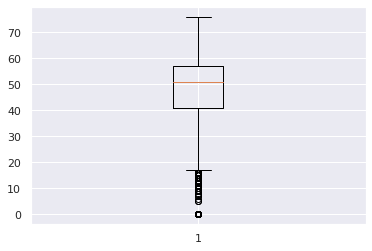


 Boxplot of the columns product_description_lenght: 



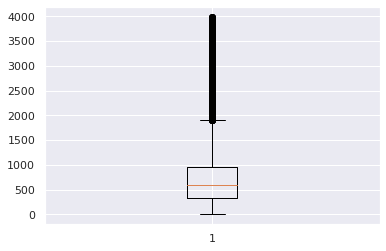


 Boxplot of the columns product_photos_qty: 



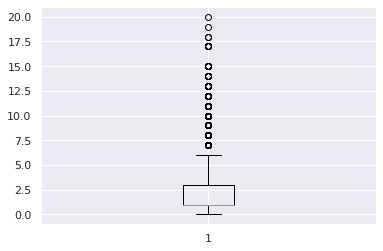


 Boxplot of the columns product_weight_g: 



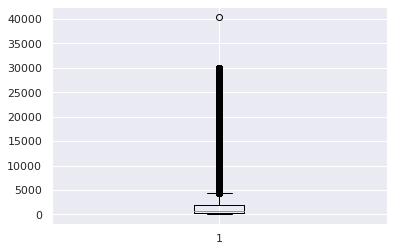


 Boxplot of the columns product_length_cm: 



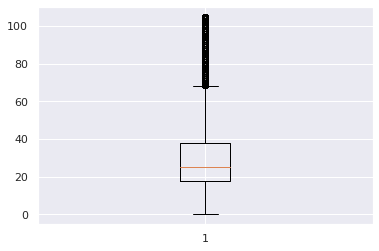


 Boxplot of the columns product_height_cm: 



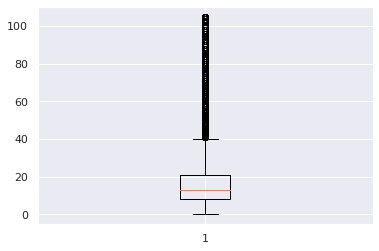


 Boxplot of the columns product_width_cm: 



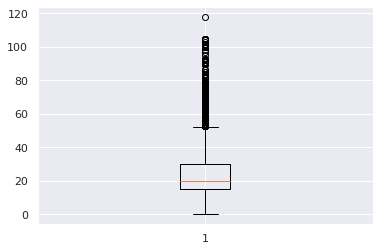


 Boxplot of the dataset order_payments: 


 Boxplot of the columns product_name_lenght: 



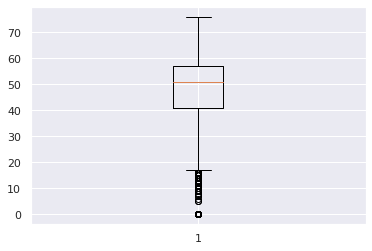


 Boxplot of the columns product_description_lenght: 



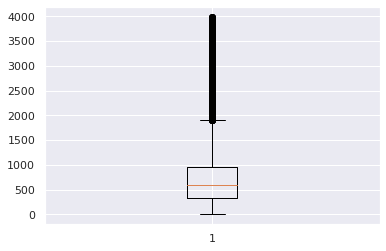


 Boxplot of the columns product_photos_qty: 



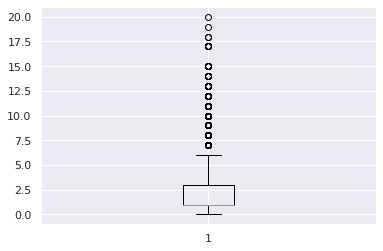


 Boxplot of the columns product_weight_g: 



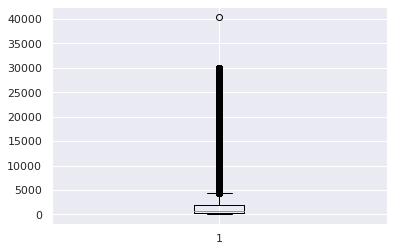


 Boxplot of the columns product_length_cm: 



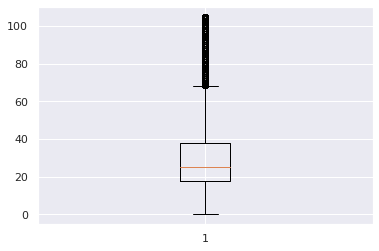


 Boxplot of the columns product_height_cm: 



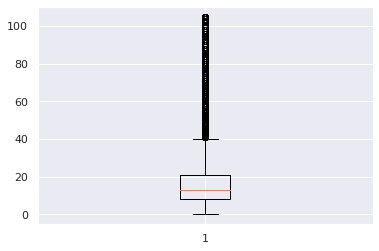


 Boxplot of the columns product_width_cm: 



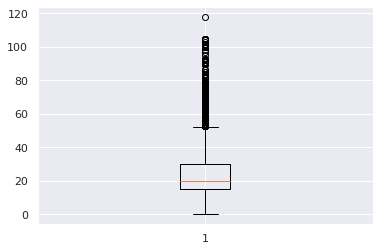


 Boxplot of the dataset products: 


 Boxplot of the columns product_name_lenght: 



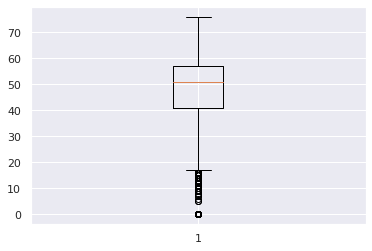


 Boxplot of the columns product_description_lenght: 



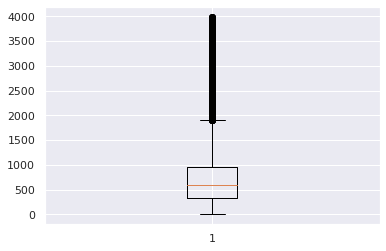


 Boxplot of the columns product_photos_qty: 



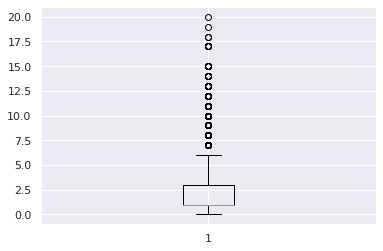


 Boxplot of the columns product_weight_g: 



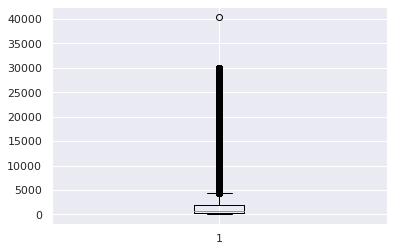


 Boxplot of the columns product_length_cm: 



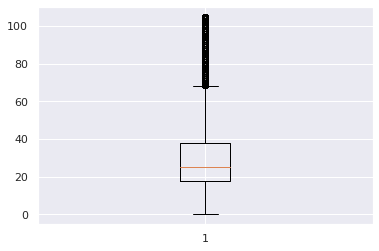


 Boxplot of the columns product_height_cm: 



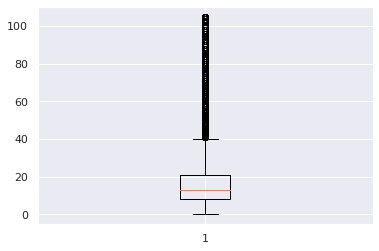


 Boxplot of the columns product_width_cm: 



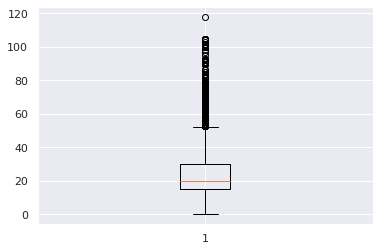

In [ ]:
datasets = [order_items, order_payments, products]
list_names = ['order_items', 'order_payments',
              'products']

for name in list_names:
    pos = list_names.index(name)
    dataset = datasets[pos] 
    print(colored("\n Boxplot of the dataset {}: \n".format(name), 'red'))
    columns = data.select_dtypes(include='number').columns
    for col in columns :
      print(colored("\n Boxplot of the columns {}: \n".format(col), 'green'))
      plt.boxplot(data[col])
      plt.show()

In [ ]:
"""I decide not to remove any more outliers so as not to exclude potential large orders.
for name in list_names:
    pos = list_names.index(name)
    dataset = datasets[pos]
    print("Verification of the normality of the numerical columns of the dataset: {}." .format(name))
    verif_normalite(dataset)
    print("\n")

print("Verification of the normality of the numerical"
      "columns of the dataset: {}." .format("order_items"))
print(plot_multiple_histograms(order_items, (15, 5)))

print("Verification of the normality of the numerical"
      "columns of the dataset: {}." .format("order_payments"))
print(plot_multiple_histograms(order_payments, (15, 5)))

print("Verification of the normality of the numerical"
      "columns of the dataset: {}." .format("products"))
print(plot_multiple_histograms(products, (15, 15)))

The variables don't have a Normal distribution so the Outliers are removed by the Percentile method.

outliers_datasets = [order_items, order_payments, products]

outliers_list_names = ['order_items', 'order_payments', 'products']

for name in outliers_list_names:
    pos = outliers_list_names.index(name)
    dataset = outliers_datasets[pos]
    print("Delete outliers: {}." .format(name))
    delete_outliers_percentiles(dataset)
    print("OK")
    print("\n")

print("Histogramme of the numerical"
      "columns of the dataset: {}." .format("order_items"))
print(plot_multiple_histograms(order_items, (15, 5)))

print("Histogramme of the numerical"
      "columns of the dataset: {}." .format("order_payments"))
print(plot_multiple_histograms(order_payments, (15, 5)))

print("Histogramme of the numerical"
      "columns of the dataset: {}." .format("products"))
print(plot_multiple_histograms(products, (15, 15)))"""

'for name in list_names:\n    pos = list_names.index(name)\n    dataset = datasets[pos]\n    print("Verification of the normality of the numerical columns of the dataset: {}." .format(name))\n    verif_normalite(dataset)\n    print("\n")\n\nprint("Verification of the normality of the numerical"\n      "columns of the dataset: {}." .format("order_items"))\nprint(plot_multiple_histograms(order_items, (15, 5)))\n\nprint("Verification of the normality of the numerical"\n      "columns of the dataset: {}." .format("order_payments"))\nprint(plot_multiple_histograms(order_payments, (15, 5)))\n\nprint("Verification of the normality of the numerical"\n      "columns of the dataset: {}." .format("products"))\nprint(plot_multiple_histograms(products, (15, 15)))\n\nThe variables don\'t have a Normal distribution so the Outliers are removed by the Percentile method.\n\noutliers_datasets = [order_items, order_payments, products]\n\noutliers_list_names = [\'order_items\', \'order_payments\', \'produc

#### <font color='purple'> Creation of a new column to put products in large category </font>

In [ ]:
dict_categories = {
    
#hygiene_health_wellness
'health_beauty' : 'hygiene_health_wellness', 
'baby': 'hygiene_health_wellness',
'diapers_and_hygiene' : 'hygiene_health_wellness',
'perfumery' : 'hygiene_health_wellness',    

#furniture_decoration_home
'furniture_living_room' : 'furniture_decoration_home',
'furniture_mattress_and_upholstery' : 'furniture_decoration_home',
'furniture_bedroom' : 'furniture_decoration_home',
'furniture_decor' : 'furniture_decoration_home',
'bed_bath_table' : 'furniture_decoration_home',
'kitchen_dining_laundry_garden_furniture' : 'furniture_decoration_home',
'la_cuisine' : 'furniture_decoration_home',
'home_confort' : 'furniture_decoration_home',
'home_comfort_2' : 'furniture_decoration_home',
'christmas_supplies' : 'furniture_decoration_home',
    
#repairs_constructions
'construction_tools_construction': 'repairs_constructions',
'costruction_tools_garden': 'repairs_constructions',
'costruction_tools_tools': 'repairs_constructions',
'construction_tools_safety': 'repairs_constructions',
'construction_tools_lights': 'repairs_constructions',
'home_construction': 'repairs_constructions',
'air_conditioning': 'repairs_constructions',
'auto' : 'repairs_constructions',
   
#Office_equipment_furniture
'office_furniture' : 'Office_equipment_furniture',
'industry_commerce_and_business' : 'Office_equipment_furniture',
'stationery' : 'Office_equipment_furniture',
'agro_industry_and_commerce' : 'Office_equipment_furniture',
'signaling_and_security' : 'Office_equipment_furniture',
'furnitures' : 'Office_equipment_furniture',
'security_and_services' : 'Office_equipment_furniture',

#food_drink
'food_drink' : 'food_drink',
'food' : 'food_drink',
'drinks' : 'food_drink',

#electronic_equipment
'telephony' : 'electronic_equipment',
'electronics': 'electronic_equipment',
'computers_accessories': 'electronic_equipment',
'consoles_games': 'electronic_equipment',
'fixed_telephony': 'electronic_equipment',
'audio': 'electronic_equipment',
'computers': 'electronic_equipment',
'tablets_printing_image': 'electronic_equipment',

#home_appliances
'small_appliances' : 'home_appliances',
'small_appliances_home_oven_and_coffee' : 'home_appliances',
'home_appliances_2' : 'home_appliances',
'home_appliances' : 'home_appliances',
'housewares' : 'home_appliances',

#clothing_accessories
'watches_gifts' : 'clothing_accessories',
'fashion_bags_accessories' : 'clothing_accessories',
'fashion_underwear_beach' : 'clothing_accessories',
'fashion_shoes' : 'clothing_accessories', 
'fashion_male_clothing' : 'clothing_accessories',
'fashio_female_clothing' : 'clothing_accessories',
'fashion_sport' : 'clothing_accessories',
'fashion_childrens_clothes' : 'clothing_accessories',
'luggage_accessories': 'clothing_accessories',

#garden and pets
'flowers' : 'garden_pets',
'pet_shop' : 'garden_pets',
'garden_tools' : 'garden_pets',

#leisure_homemade
'sports_leisure' : 'leisure_homemade',
'musical_instruments': 'leisure_homemade',
'party_supplies': 'leisure_homemade',
'books' : 'leisure_homemade',
'books_imported': 'leisure_homemade',
'books_general_interest': 'leisure_homemade',
'books_technical': 'leisure_homemade',
'art': 'leisure_homemade',
'toys': 'leisure_homemade',
'cine_photo': 'leisure_homemade',
'cds_dvds_musicals': 'leisure_homemade',
'music': 'leisure_homemade',
'dvds_blu_ray': 'leisure_homemade',
'arts_and_craftmanship': 'leisure_homemade',

#other
'Unknown' : 'other',
'market_place' : 'other', 
'cool_stuff' : 'other'}

In [ ]:
# %%flake8
product_category['product_category_general'] = product_category[
    'product_category_name_english'].map(dict_categories)

#### <font color='purple'> Creation of a new column with the volume of each product </font>

In [ ]:
# %%flake8
products['volume_product'] = products['product_length_cm']*products[
    'product_height_cm']*products['product_width_cm']

## <font color='green'> Univariate analysis </font>

#### <font color='purple'> numerical variable </font>

In [ ]:
for name in list_names:
    pos = list_names.index(name)
    dataset = datasets[pos]
    print("Analyze of the dataset : {}.".format(name))
    print(description_var(dataset))
    print("\n")

NameError: ignored

#### <font color='purple'> Customers </font>

In [ ]:
# %%flake8
customers['customer_unique_id'].nunique()

96096

There are 96096 different customers.

In [ ]:
# %%flake8
customers['customer_id'].nunique()

99441

There are more consumer identifiers than unique consumer identifiers: this makes it possible to hypothesize that some consumers have made more than one order. To be checked with order.

In [ ]:
# %%flake8
customers['customer_zip_code_prefix'].nunique()

14994

Consumers come from 14 994 different zip codes.

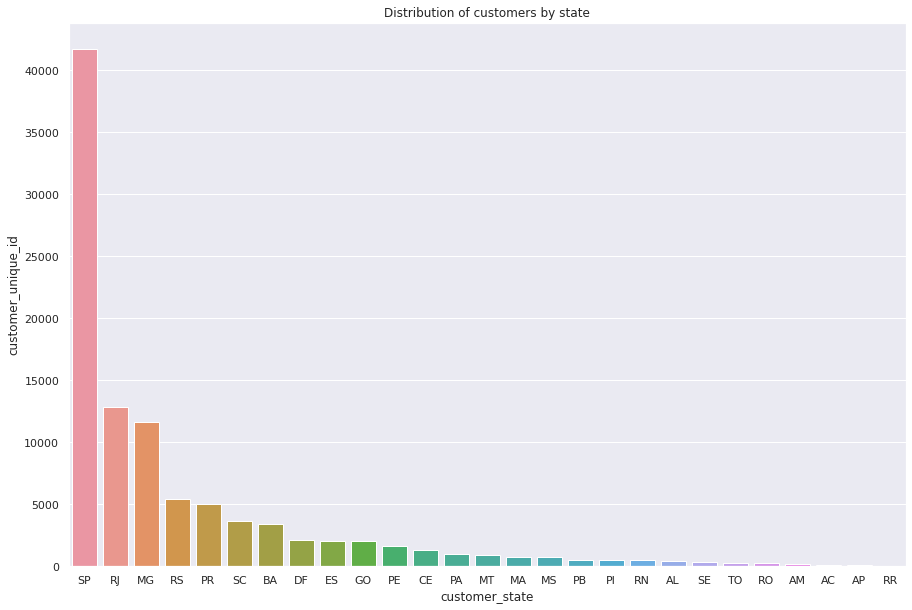

In [ ]:
# %%flake8
customer_by_state = customers[['customer_unique_id', 'customer_state']]\
                    .groupby('customer_state').count().reset_index()
customer_by_state = customer_by_state.sort_values(by=['customer_unique_id'],
                                                  ascending=False)
plt.figure(figsize=(15, 10))
sns.barplot(x='customer_state',
            y='customer_unique_id',
            data=customer_by_state)
plt.title("Distribution of customers by state")
plt.show()

With this graph, we can see that most customers are located in SP, RJ, MG. We will have to see how these initials match. SP is Sao Paulo,  RJ for Rio de Janero, MG for belo horizonte.

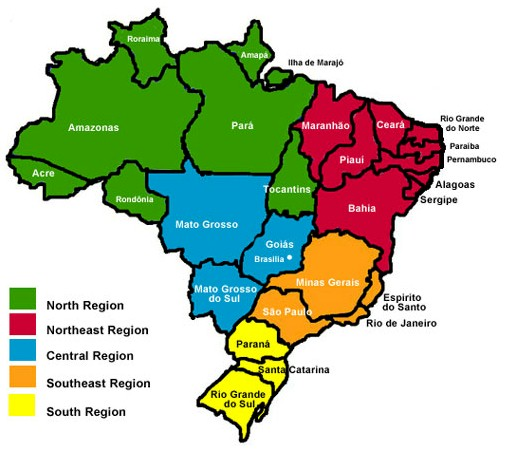

In [ ]:
# %%flake8
def region_feature():
    regions_dict = {
        "North" : set(['AC', 'AM', 'RR', 'RO', 'PA', 'AP', 'TO']),
        "Northeast" : set(
            ['MA', 'PI', 'BA', 'CE', 'RN', 'PB', 'PE', 'AL', 'SE']
        ),
        "Central" : set(['MT', 'GO', 'MS', 'DF']),
        "Southeast" : set(['MG', 'SP', 'ES', 'RJ']),
        "South" : set(['PR', 'SC', 'RS']),
    }

    def get_region(state):
        for region, set_states in regions_dict.items():
            if state in set_states:
                return region

    customers['customer_region'] =\
        customers['customer_state'].map(get_region)
    customers['customer_region'] = \
        customers['customer_region'].astype('category')
    customers['customer_region'].value_counts()


region_feature()

In [ ]:
customers['customer_region']

0        Southeast
1        Southeast
2        Southeast
3        Southeast
4        Southeast
           ...    
99436    Southeast
99437    Southeast
99438    Northeast
99439        South
99440    Southeast
Name: customer_region, Length: 99441, dtype: category
Categories (5, object): ['Central', 'North', 'Northeast', 'South', 'Southeast']

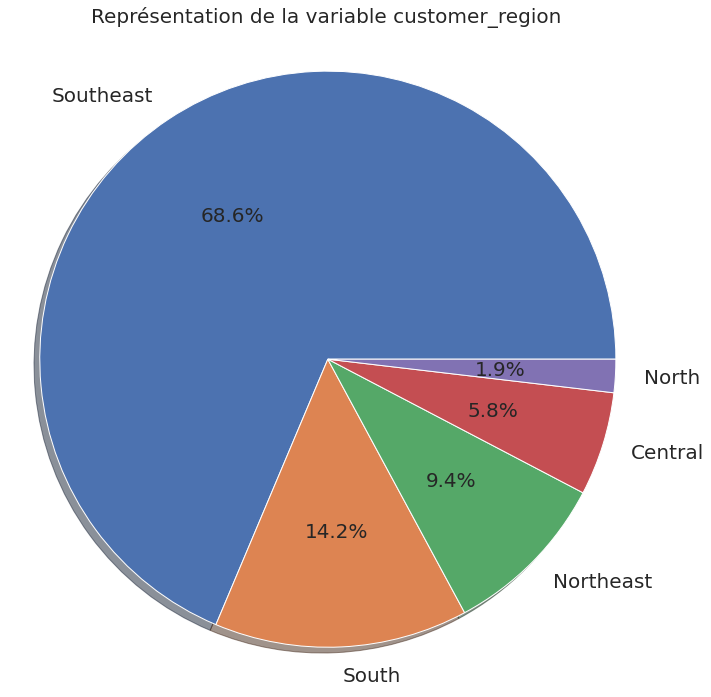

In [ ]:
pie_col_category(customers, 'customer_region', (10,10))

#### <font color='purple'> Geolocalisation </font>

In [ ]:
# %%flake8
geolocalisation['geolocation_state'].unique()

array(['SP', 'RJ', 'ES', 'MG', 'BA', 'SE', 'PE', 'RN', 'AL', 'PB', 'CE',
       'PI', 'MA', 'PA', 'AP', 'AM', 'RR', 'AC', 'DF', 'GO', 'RO', 'TO',
       'MT', 'MS', 'PR', 'SC', 'RS'], dtype=object)

In [ ]:
# %%flake8
geolocalisation['geolocation_state'].nunique()

27

There are a total of 27 states represented in this dataset.

In [ ]:
# %%flake8
geolocalisation['geolocation_city'].unique()

array(['sao paulo', 'são paulo', 'osasco', ..., 'floriano peixoto',
       'erebango', 'santa cecilia do sul'], dtype=object)

In [ ]:
# %%flake8
geolocalisation['geolocation_city'] = geolocalisation['geolocation_city']\
                                      .replace(['são paulo'], 'sao paulo')

In [ ]:
# %%flake8
geolocalisation['geolocation_city'].nunique()

5954

There are a total of 5954 cities represented in this dataset.

In [ ]:
# %%flake8
geolocalisation.loc[geolocalisation['geolocation_state'] == 'SP']

geolocation_zip_code_prefix  ...  geolocation_lng_means
0                             1037  ...             -46.638924
1                             1046  ...             -46.643998
3                             1041  ...             -46.640046
4                             1035  ...             -46.641549
5                             1012  ...             -46.634859
...                            ...  ...                    ...
403111                       19960  ...             -49.999641
403113                       19904  ...             -49.884883
403143                       19902  ...             -49.860821
403155                       19909  ...             -49.903697
403260                       19930  ...             -49.799971

[6349 rows x 7 columns]

In [ ]:
# %%flake8
geolocalisation.loc[geolocalisation['geolocation_state'] == 'RJ']

geolocation_zip_code_prefix  ...  geolocation_lng_means
404270                       20010  ...             -43.178599
404271                       20011  ...             -43.176078
404272                       20021  ...             -43.173501
404273                       20030  ...             -43.173650
404275                       20050  ...             -43.179258
...                            ...  ...                    ...
521701                       28998  ...             -42.599654
521783                       28993  ...             -42.470007
522142                       28992  ...             -42.420472
522800                       28900  ...             -42.006488
524032                       28945  ...             -43.935855

[1390 rows x 7 columns]

In [ ]:
# %%flake8
geolocalisation.loc[geolocalisation['geolocation_state'] == 'MG']

geolocation_zip_code_prefix  ...  geolocation_lng_means
542189                       30001  ...             -43.935706
542190                       30035  ...             -43.918429
542191                       30150  ...             -43.927001
542192                       30120  ...             -43.939890
542193                       30112  ...             -43.935649
...                            ...  ...                    ...
667730                       39931  ...             -40.296888
667744                       39995  ...             -41.341485
667772                       39923  ...             -46.117527
667777                       39955  ...             -40.444475
667866                       39948  ...             -40.318720

[1868 rows x 7 columns]

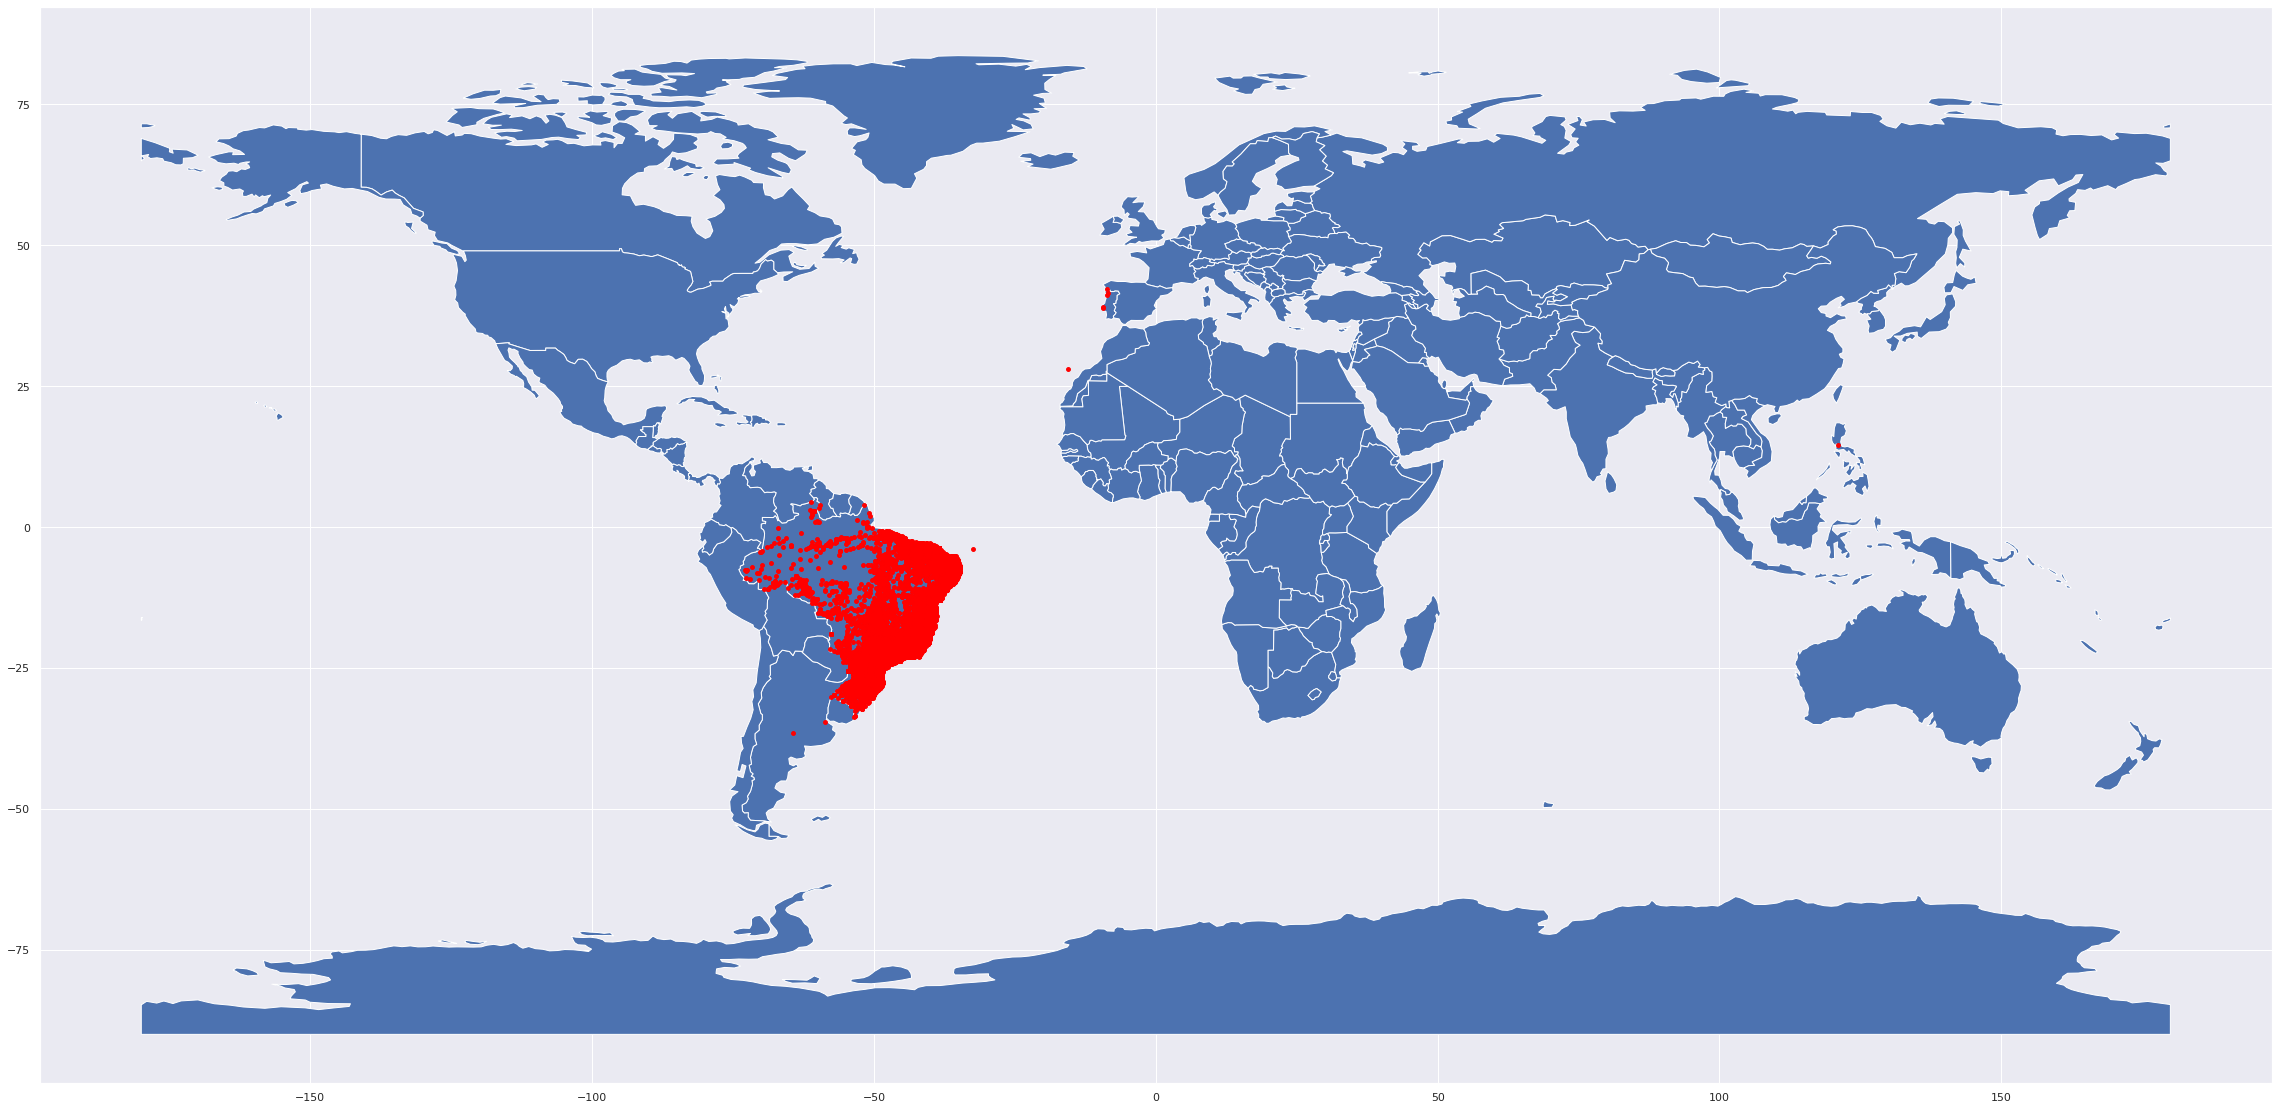

In [ ]:
# %%flake8
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

geometry = [Point(xy) for xy in zip(geolocalisation['geolocation_lng'],
                                    geolocalisation['geolocation_lat'])]
gdf = GeoDataFrame(geolocalisation, geometry=geometry)

# this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(40, 30)), marker='o',
         color='red', markersize=15)

With this map, we can say that almost all sellers and buyers are in Brazil and some of these people are in Portugal, Mexico that is why the shipping tax is different.

In [ ]:
# %%flake8
geolocalisation = geolocalisation.drop(columns=['geometry'])

#### <font color='purple'> Order item </font>

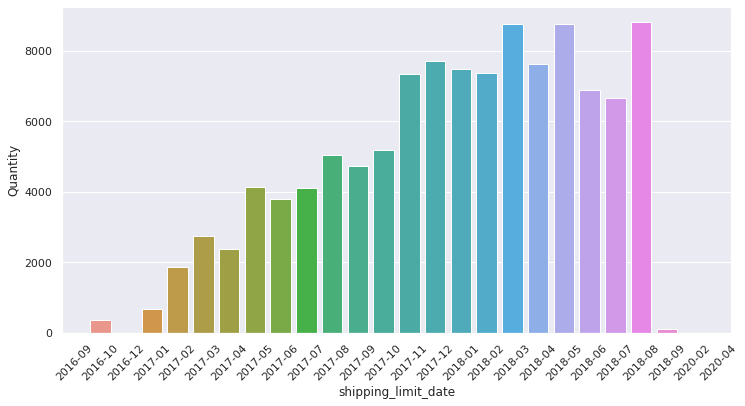

In [ ]:
# %%flake8
plot_date_dist(order_items, 'shipping_limit_date')

Here we see that most of the products are no longer marketed at the end of 2017 and into 2018. Some products are available until early 2020.

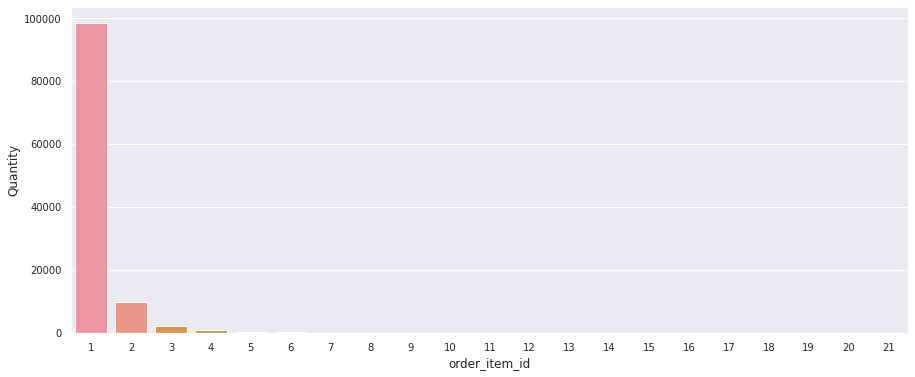

In [ ]:
# %%flake8
plot_hist_stats(order_items, 'order_item_id')

Most orders are for 1 item.

#### <font color='purple'> Order Payment </font>

In [ ]:
# %%flake8
order_payments['payment_value'].describe()

count    103886.000000
mean        154.100380
std         217.494064
min           0.000000
25%          56.790000
50%         100.000000
75%         171.837500
max       13664.080000
Name: payment_value, dtype: float64

The average customer basket is 154 euros

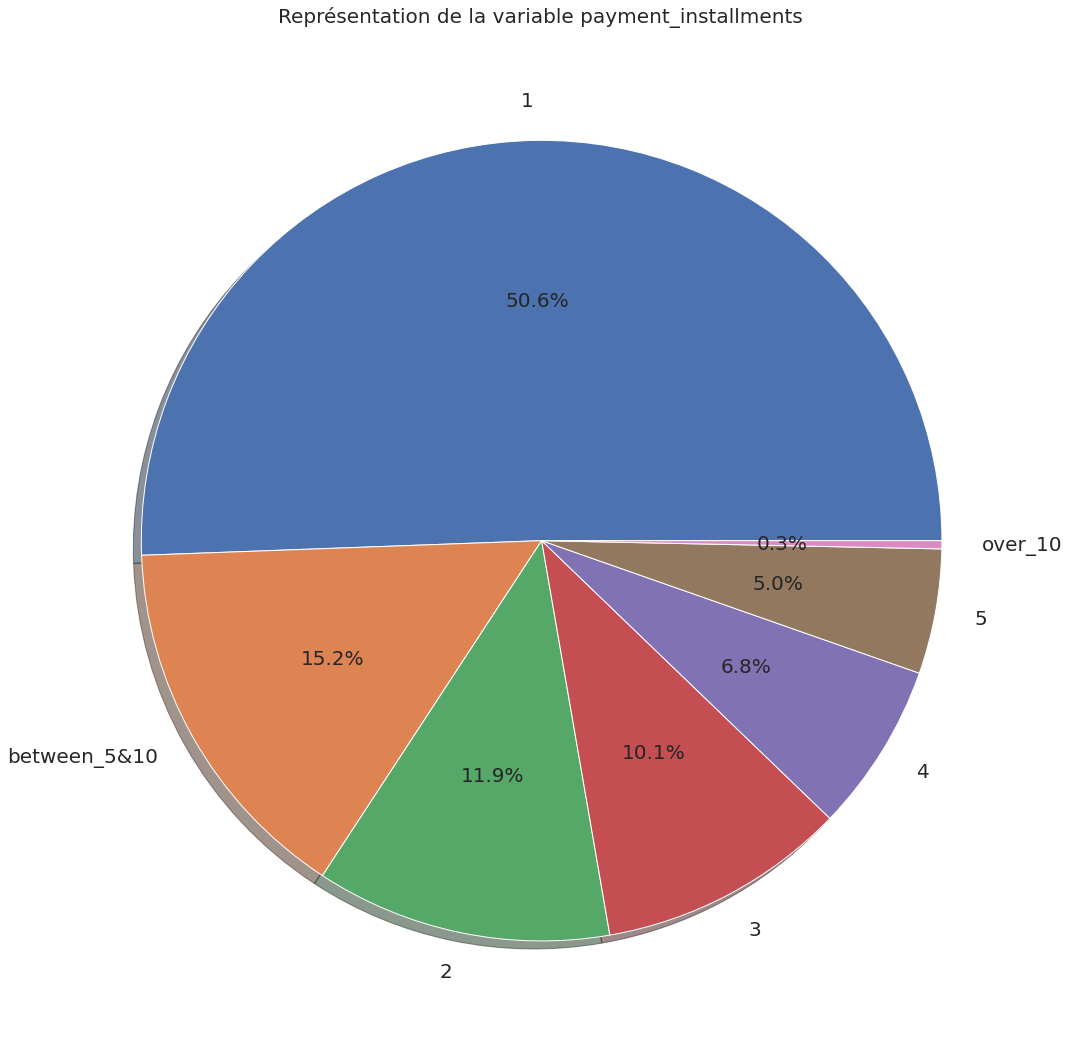

In [ ]:
# %%flake8
pie_col_category(visualization_payment, 'payment_installments', (15, 15))

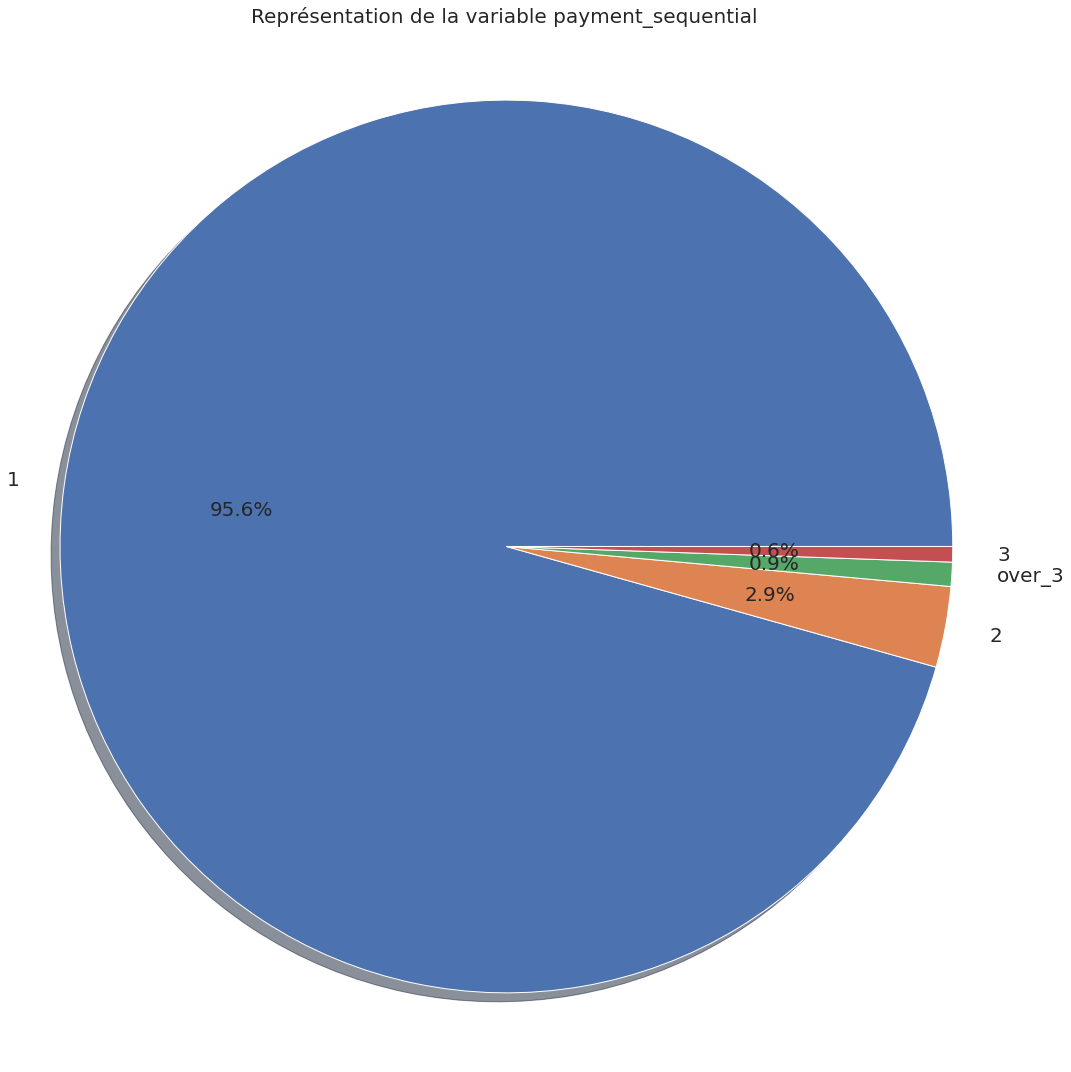

In [ ]:
# %%flake8
pie_col_category(visualization_payment, 'payment_sequential', (15, 15))

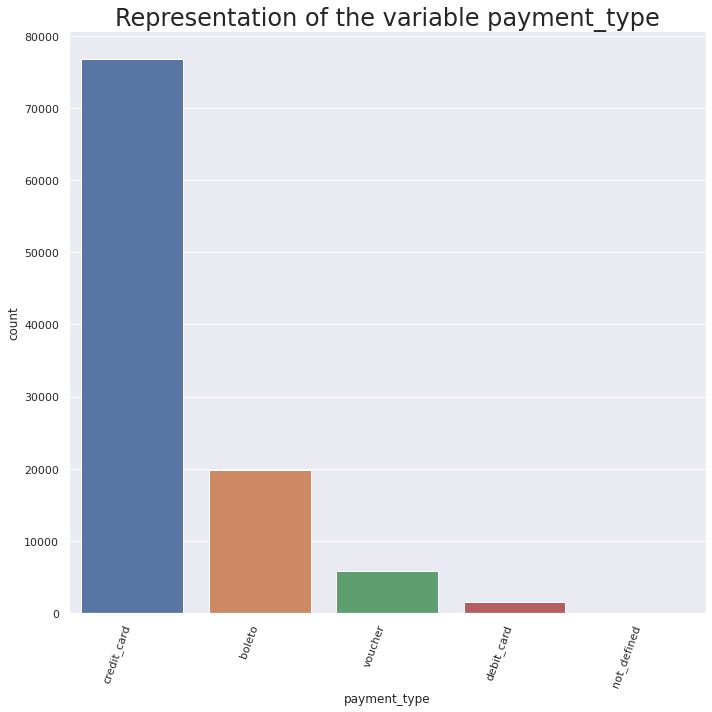

In [ ]:
# %%flake8
hist_col_categories(order_payments, 'payment_type', (10, 10))

#### <font color='purple'> Order review </font>

In [ ]:
# %%flake8
order_reviews['review_score'] = order_reviews[
    'review_score'].astype('category')

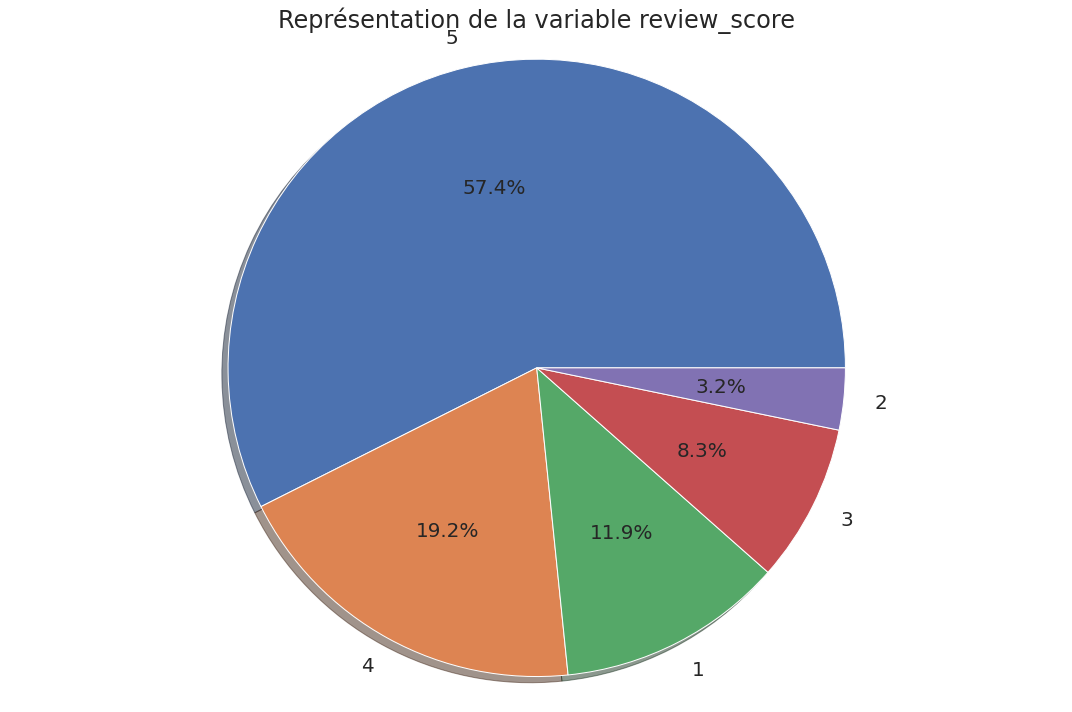

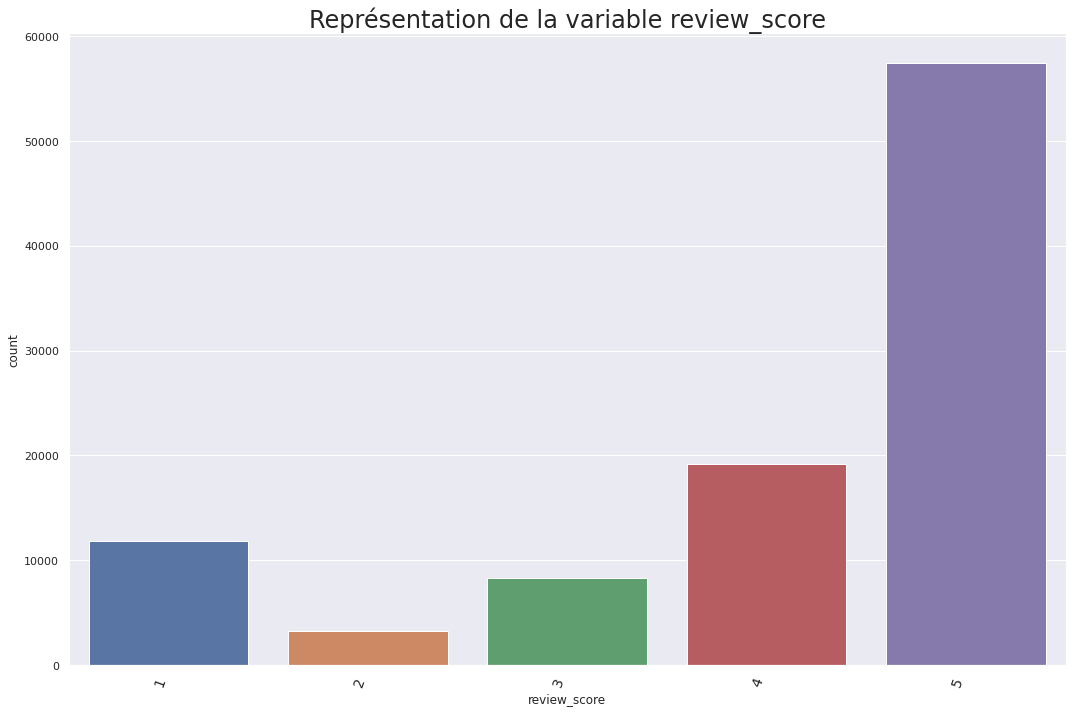

In [ ]:
graphe_categories(order_reviews, (15, 10))

In [ ]:
# %%flake8
order_reviews['review_score'] = order_reviews[
    'review_score'].astype('int64')

In [ ]:
# %%flake8
order_reviews2 = order_reviews.drop(['review_id', 'order_id',
                                     'review_creation_date',
                                     'review_answer_timestamp'], axis=1)

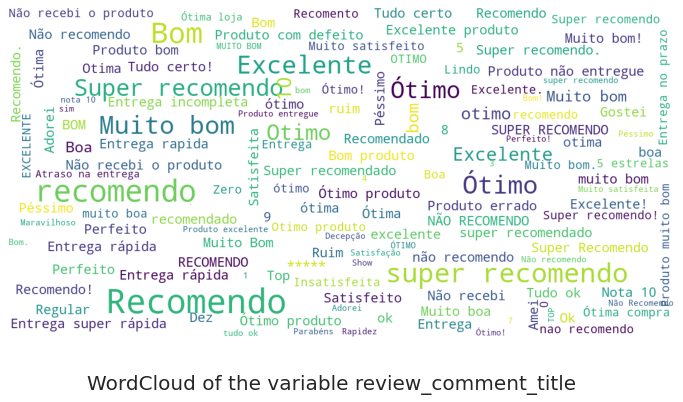

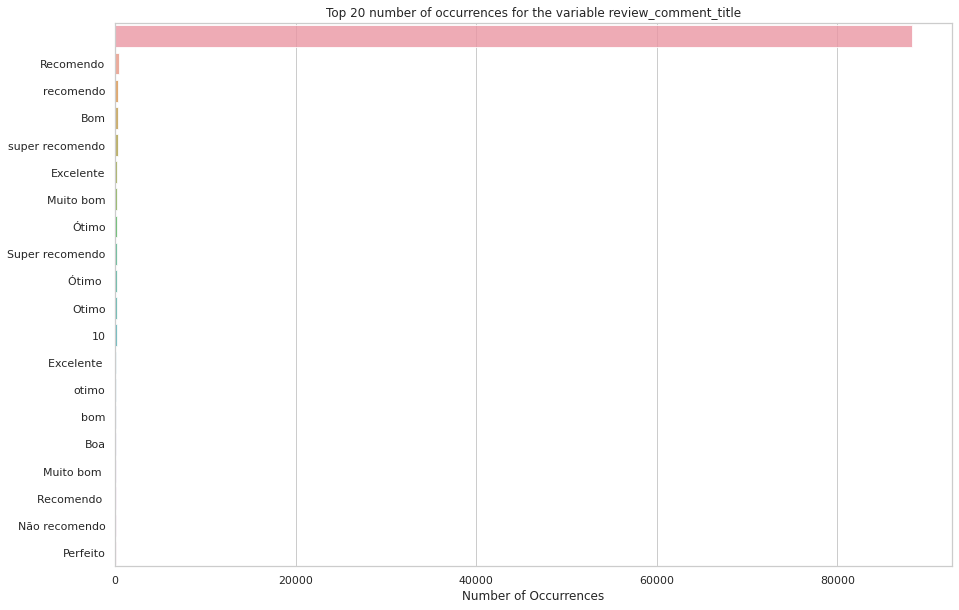

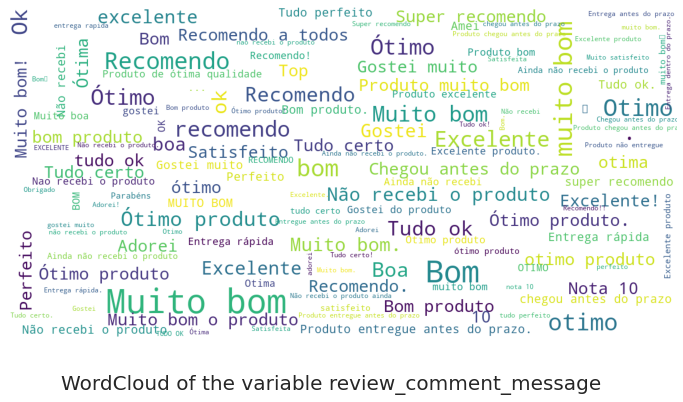

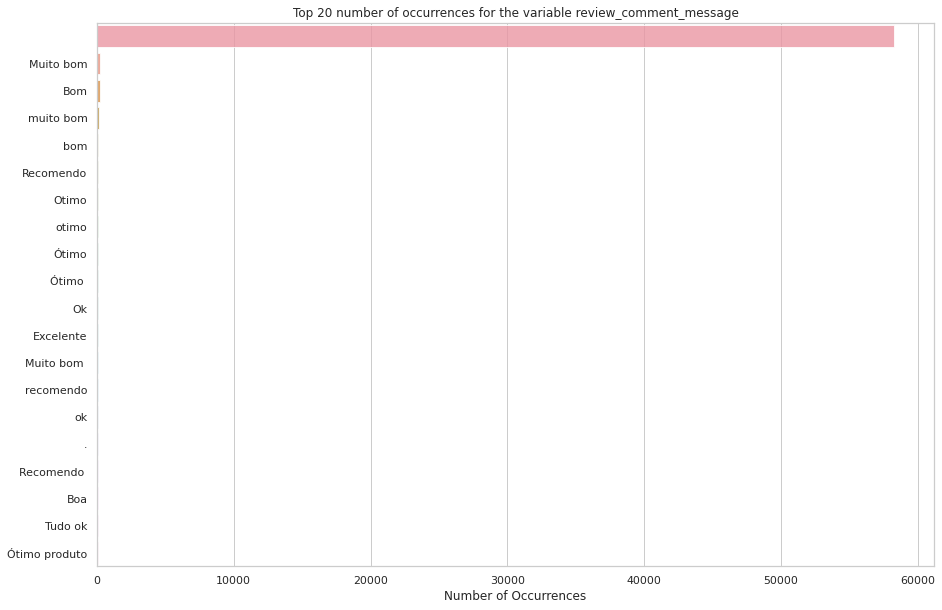

In [ ]:
# %%flake8
graphe_objet(order_reviews2)

Here we can see that the vast majority of orders are positive.

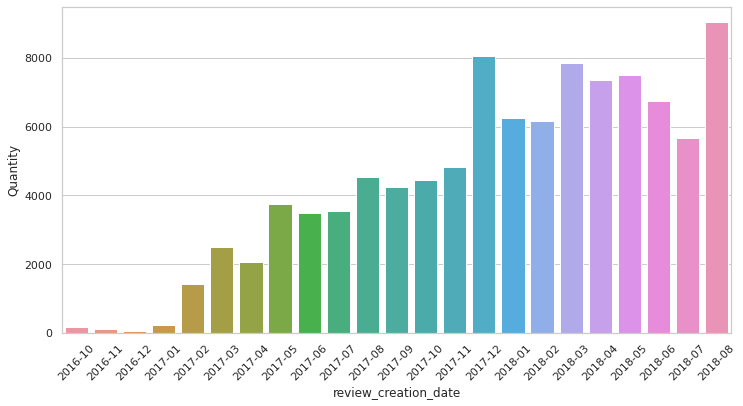

In [ ]:
# %%flake8
plot_date_dist(order_reviews, 'review_creation_date')

Here, we can see that the majority of comments were given in 2018.

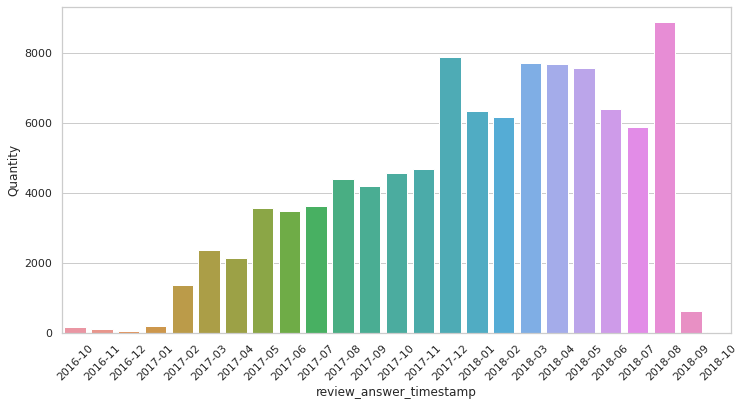

In [ ]:
# %%flake8
plot_date_dist(order_reviews, 'review_answer_timestamp')

#### <font color='purple'> Order </font>

In [ ]:
# %%flake8
orders.order_id.nunique()

99441

There were a total of 99,441 orders in 2 years.

In [ ]:
# %%flake8
nb_customer = customers['customer_unique_id'].nunique()
nb_orders = orders.order_id.nunique()    # nombre de commande
mean_order = nb_orders/nb_customer
mean_order

1.0348089410589412

Here, we can say that some buyers make more than one order on the site.

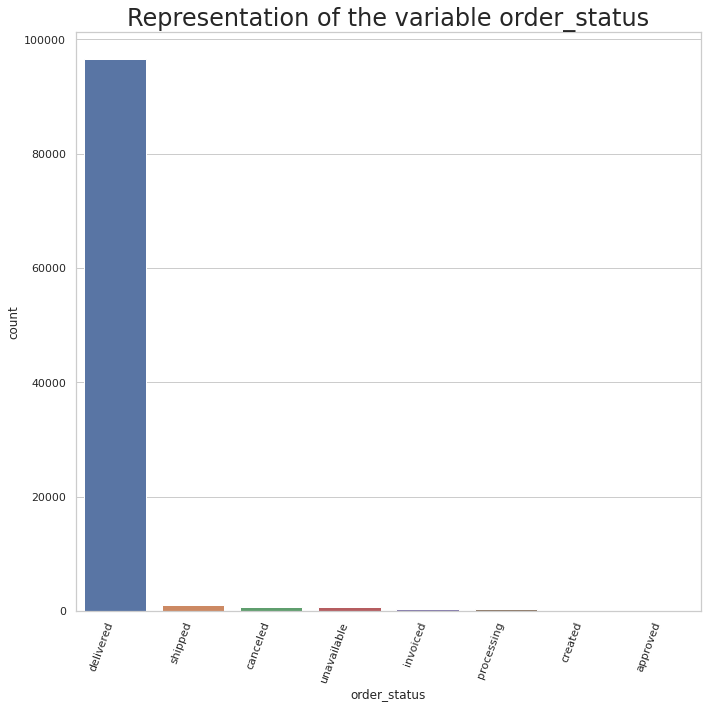

In [ ]:
# %%flake8
hist_col_categories(orders, 'order_status', (10, 10))

In [ ]:
# %%flake8
orders['order_purchase_timestamp'].max()  # .MAXYEAR

Timestamp('2018-10-17 17:30:18')

In [ ]:
# %%flake8
orders['order_purchase_timestamp'].min() # .MINYEAR

Timestamp('2016-09-04 21:15:19')

We have the data for orders that span from 2016 to 2018 which is 2 years.

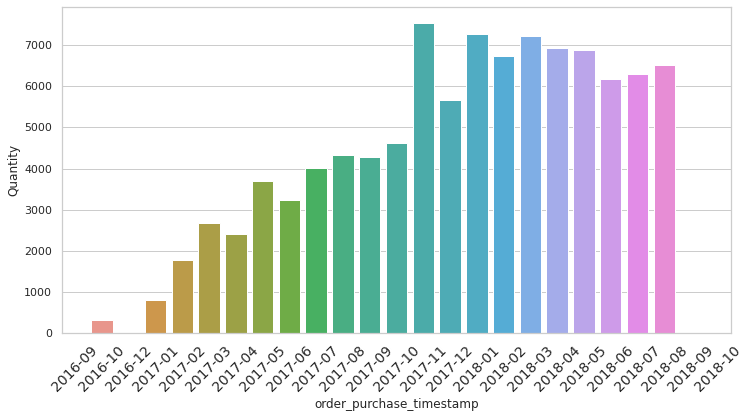

In [ ]:
plot_date_dist(orders, 'order_purchase_timestamp')

#### <font color='purple'> Product </font>

In [ ]:
# %%flake8
products2 = products.drop(['product_id'], axis=1)

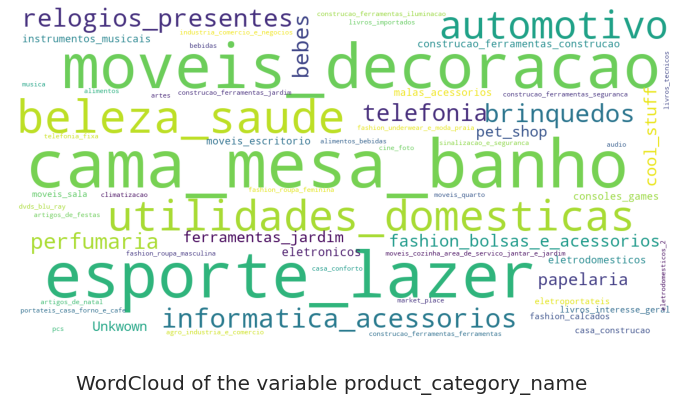

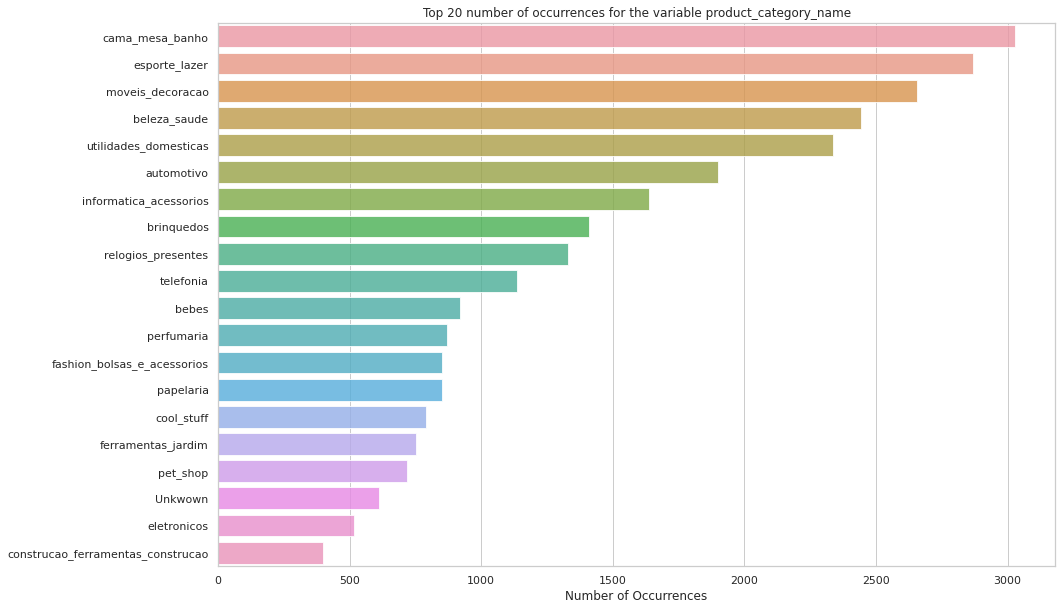

In [ ]:
# %%flake8
graphe_objet(products2)

In [ ]:
"""# %%flake8
products['product_category_name'] = products[
        'product_category_name'].astype('category')"""

"# %%flake8\nproducts['product_category_name'] = products[\n        'product_category_name'].astype('category')"

#### <font color='purple'> Sellers </font>

In [ ]:
# %%flake8
sellers['seller_id'].nunique()

3095

There are 3095 different sellers.

In [ ]:
# %%flake8
sellers['seller_zip_code_prefix'].nunique()

2246

Consumers come from 2 246 different zip codes.

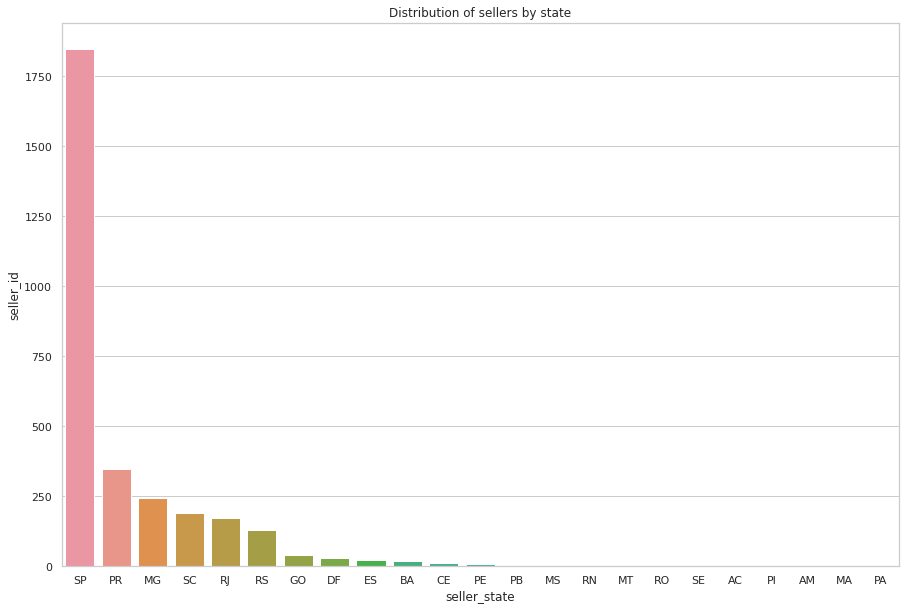

In [ ]:
# %%flake8
sellers_by_state = sellers[['seller_id', 'seller_state']]\
                    .groupby('seller_state').count().reset_index()
sellers_by_state = sellers_by_state.sort_values(by=['seller_id'],
                                                ascending=False)
plt.figure(figsize=(15, 10))
sns.barplot(x='seller_state',
            y='seller_id',
            data=sellers_by_state)
plt.title("Distribution of sellers by state")
plt.show()

With this graph, we can see that most customers are located in SP, PR, MG. We will have to see how these initials match. SP is Sao Paulo,  PR for curitiba, MG for belo horizonte.

In [ ]:
# %%flake8
geolocalisation.loc[geolocalisation['geolocation_state'] == 'PR']

geolocation_zip_code_prefix  ...  geolocation_lng_means
842126                       80010  ...             -49.269173
842127                       80035  ...             -49.252645
842129                       80060  ...             -49.261317
842132                       80030  ...             -49.260760
842138                       80020  ...             -49.271257
...                            ...  ...                    ...
899609                       87915  ...             -53.104589
899618                       87955  ...             -53.209040
899658                       87990  ...             -52.864490
899727                       87957  ...             -53.275037
899822                       87913  ...             -53.277412

[1046 rows x 7 columns]

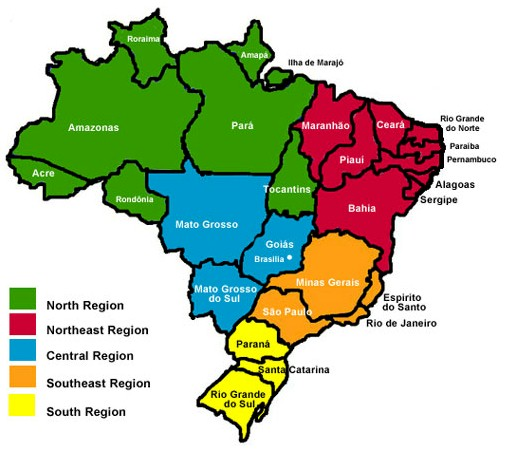

In [ ]:
# %%flake8
def region_feature():
    regions_dict = {
        "North" : set(['AC', 'AM', 'RR', 'RO', 'PA', 'AP', 'TO']),
        "Northeast" : set(
            ['MA', 'PI', 'BA', 'CE', 'RN', 'PB', 'PE', 'AL', 'SE']
        ),
        "Central" : set(['MT', 'GO', 'MS', 'DF']),
        "Southeast" : set(['MG', 'SP', 'ES', 'RJ']),
        "South" : set(['PR', 'SC', 'RS']),
    }

    def get_region(state):
        for region, set_states in regions_dict.items():
            if state in set_states:
                return region

    sellers['seller_region'] =\
        sellers['seller_state'].map(get_region)
    sellers['seller_region'] = \
        sellers['seller_region'].astype('category')
    sellers['seller_region'].value_counts()


region_feature()

In [ ]:
sellers[sellers['seller_region'].isna()]

Empty DataFrame
Columns: [seller_id, seller_zip_code_prefix, seller_city, seller_state, seller_region]
Index: []

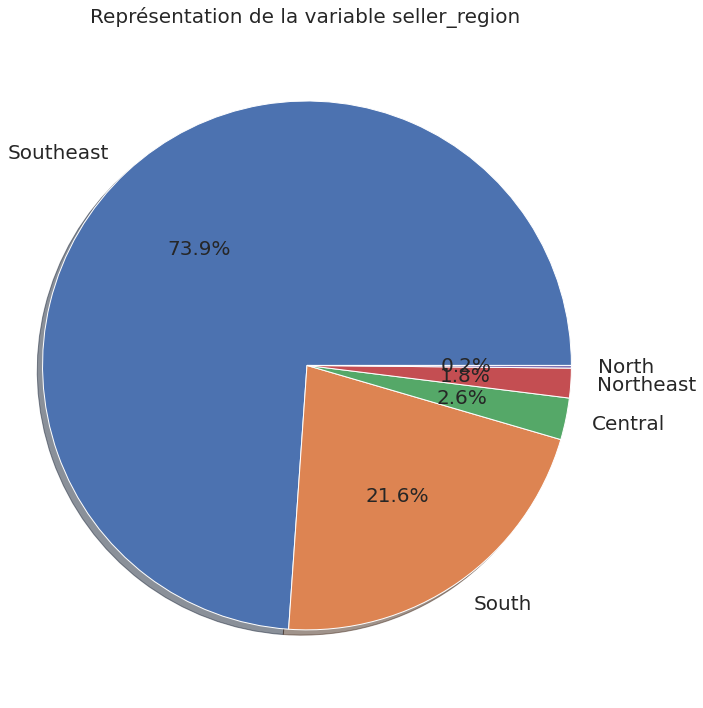

In [ ]:
pie_col_category(sellers, 'seller_region', (10,10))

#### <font color='purple'> Product Category </font>

Creation of a dataframe to assign to each product its category in English form.

In [ ]:
# %%flake8
produc_cat = pd.merge(products, product_category).drop(
        ['product_category_name'], axis=1)

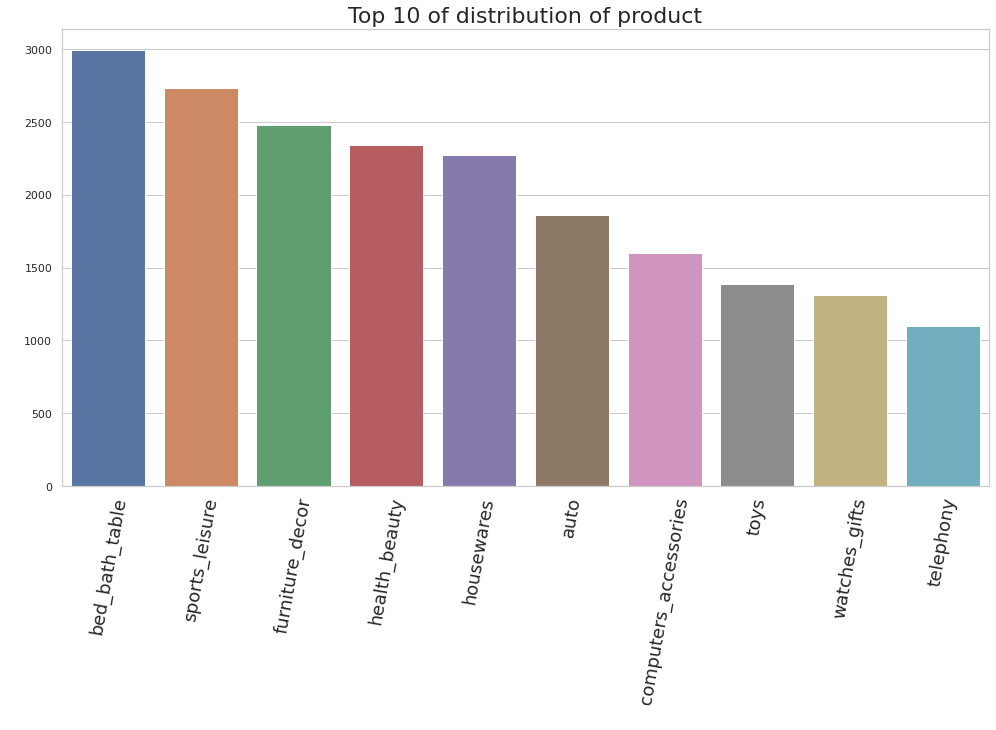

In [ ]:
# %%flake8
product_by_category = produc_cat[['product_id',
                                  'product_category_name_english']].groupby(
                                  'product_category_name_english').count(
                                  ).reset_index()
product_by_category = product_by_category.sort_values(by=['product_id'],
                                                      ascending=False).head(10)
plt.figure(figsize=(14, 10))
sns.barplot(x='product_category_name_english',
            y='product_id',
            data=product_by_category)
plt.xticks(rotation=80, fontsize=18)
plt.tight_layout()
plt.title("Top 10 of distribution of product", fontsize=22)
plt.xlabel(" ")
plt.ylabel(" ")
plt.show()

Distribution of the products present on the site according to their main categories.

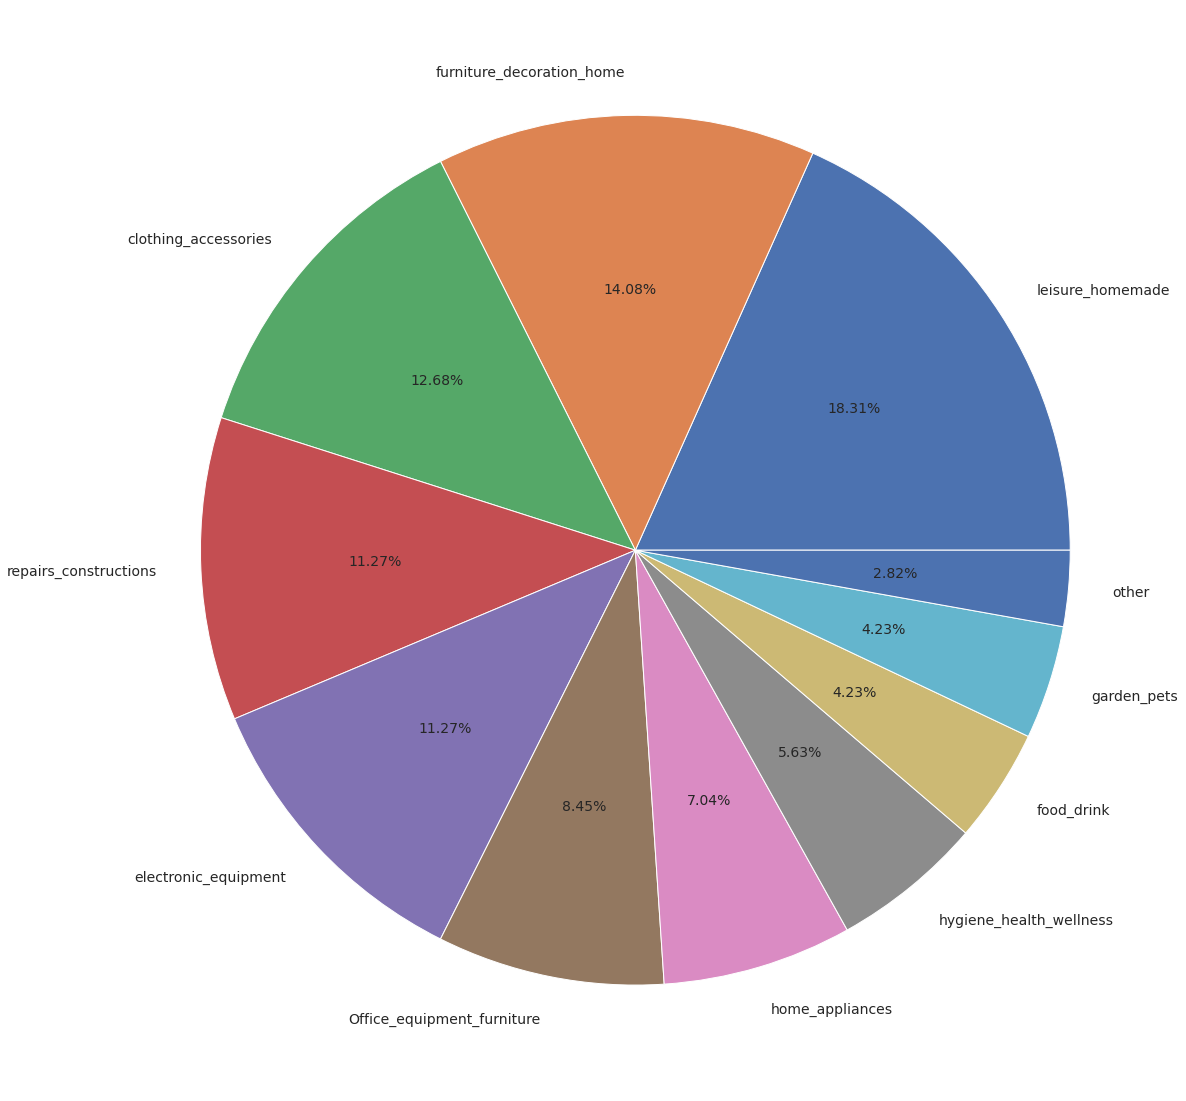

In [ ]:
product_category['product_category_general'].value_counts().plot.pie(figsize=(20, 20),
                                                                     autopct='%.2f%%',
                                                                     textprops={'fontsize': 14})
ax1 = plt.axes()
y_axis = ax1.axes.get_yaxis()
y_axis.set_visible(False)
plt.show()
plt.close()

## <font color='green'>Creating a single data file: Concatenation of files</font>

Now that we know more about the nine CSVs that make up the database, we can say that they are all linked together by the following relationship scheme:

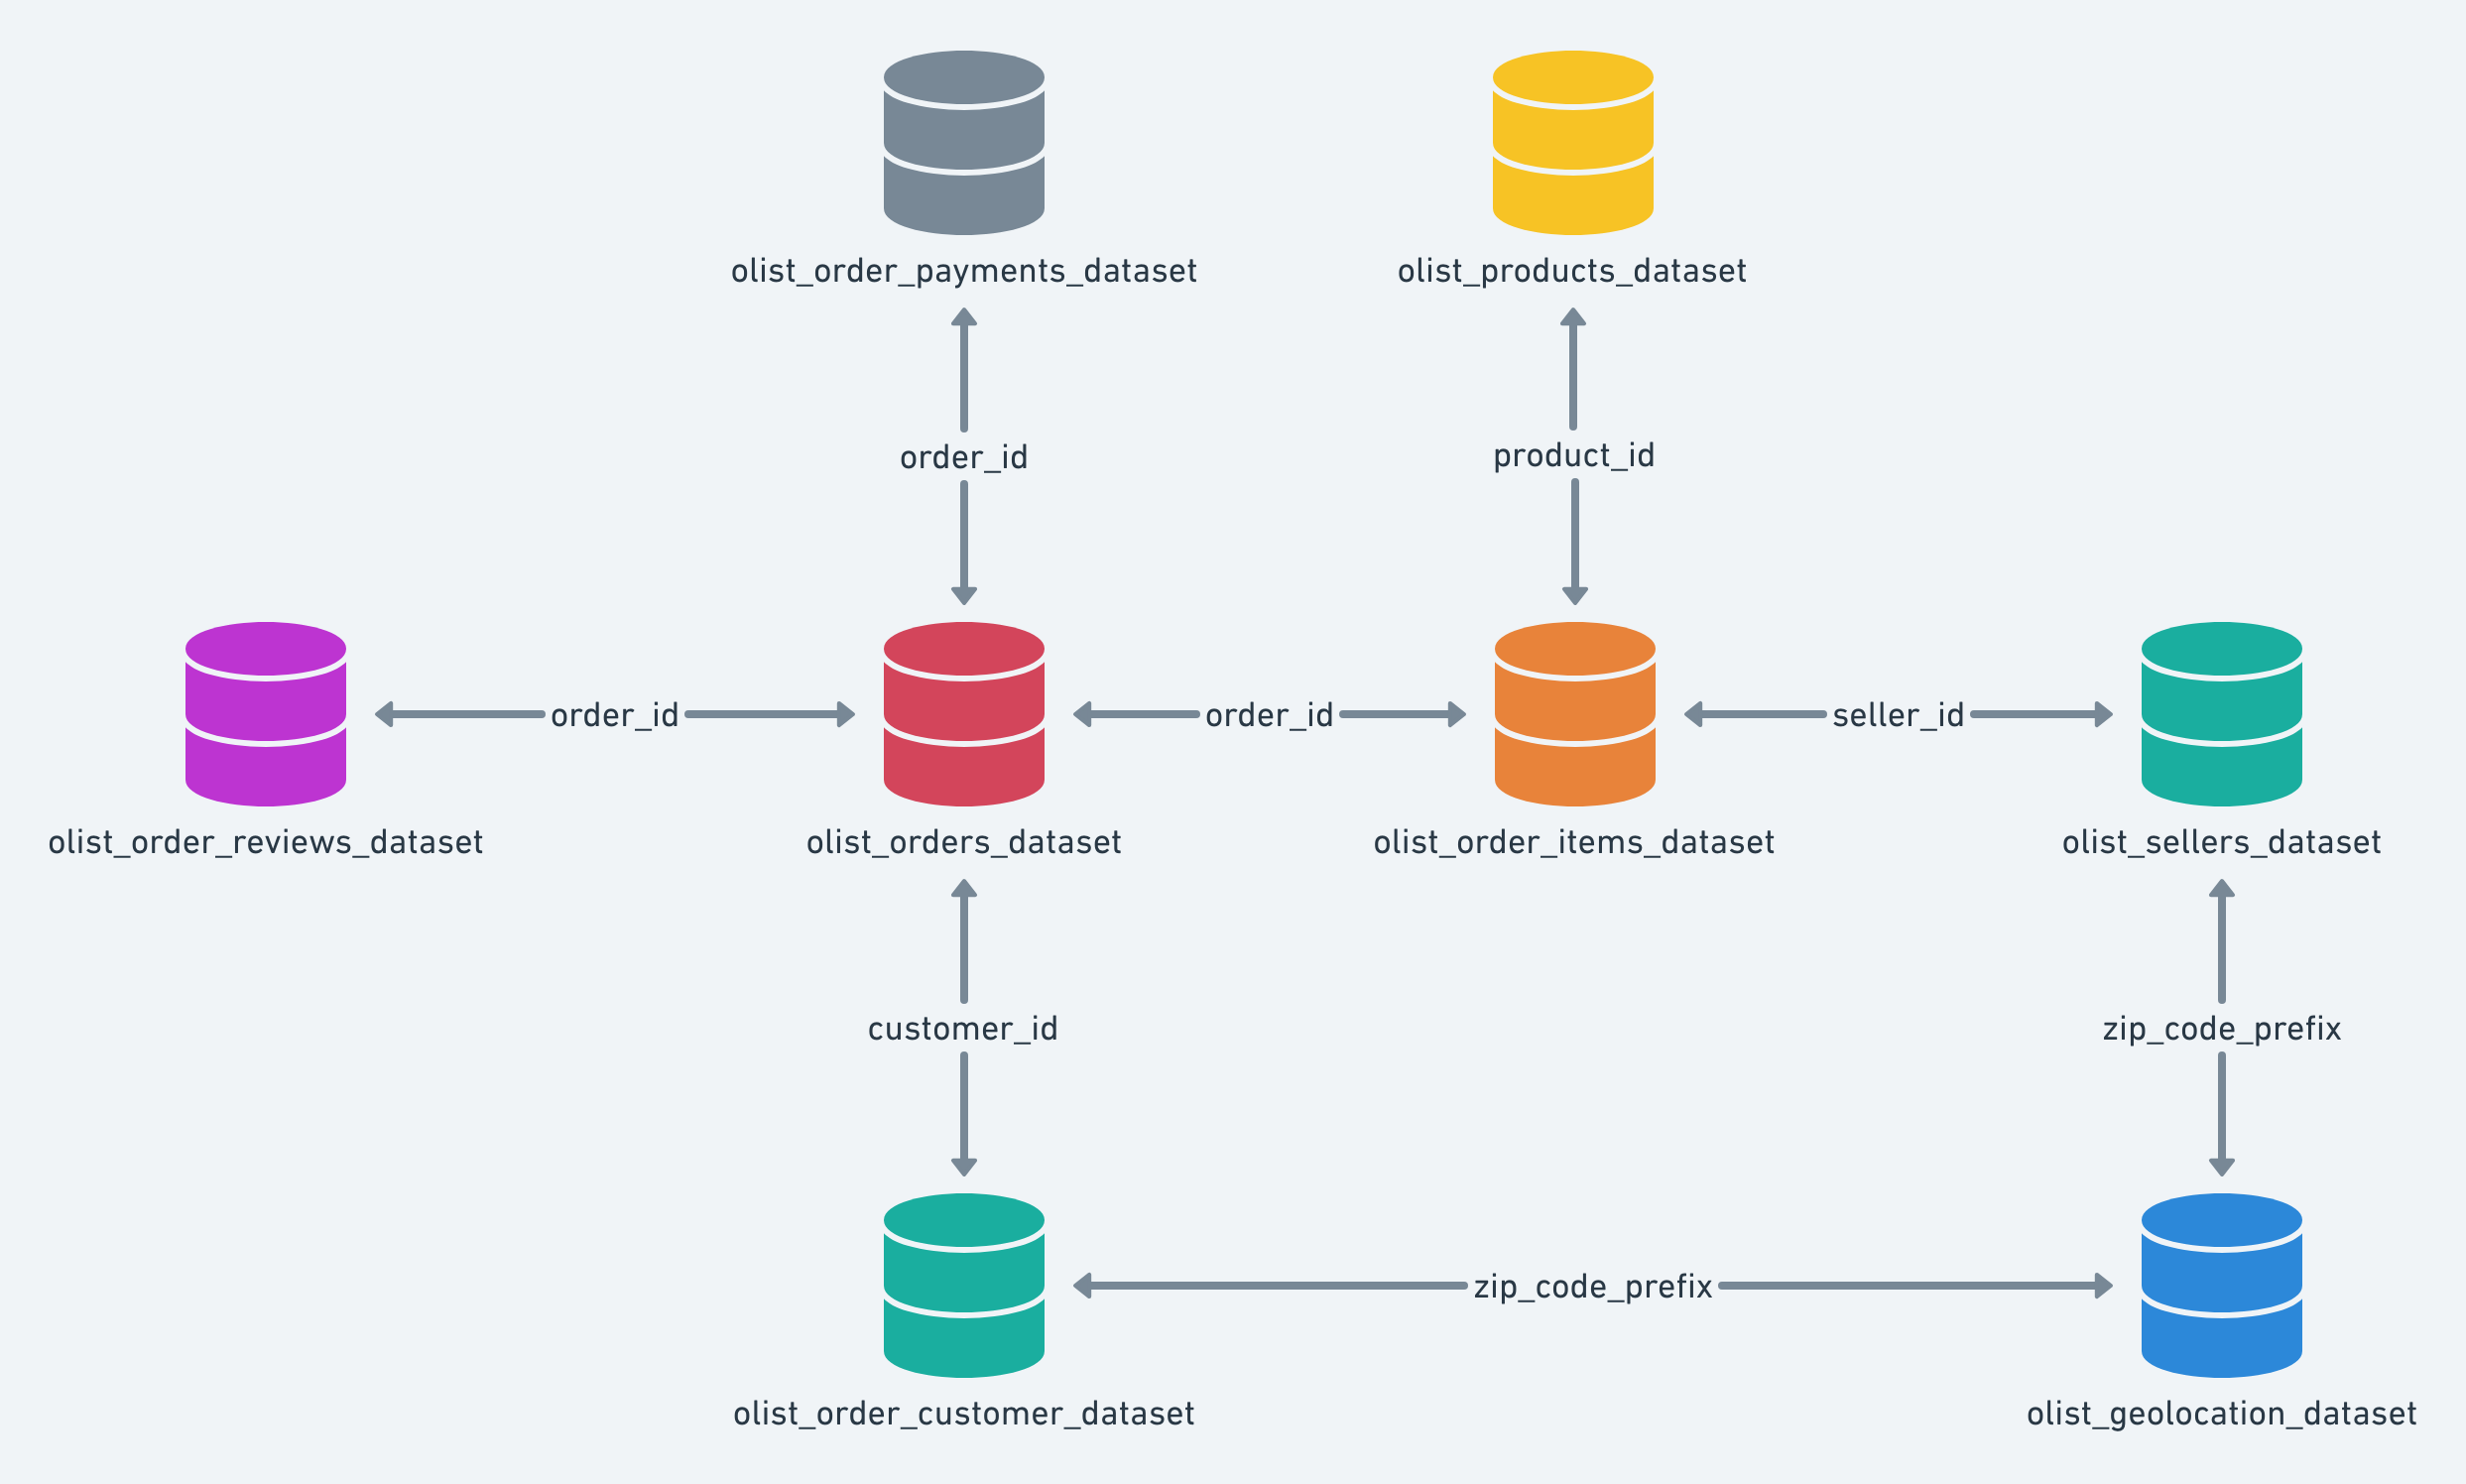

### <font color='blue'>Merge of products and product_category</font>

In [ ]:
# %%flake8
left_df = products
right_df = product_category
products = pd.merge(left_df, right_df, on='product_category_name', how='left')
#products = products.drop(
 #       ['product_category_name'], axis=1)
products

product_id  ...   product_category_general
0      1e9e8ef04dbcff4541ed26657ea517e5  ...    hygiene_health_wellness
1      3aa071139cb16b67ca9e5dea641aaa2f  ...           leisure_homemade
2      96bd76ec8810374ed1b65e291975717f  ...           leisure_homemade
3      cef67bcfe19066a932b7673e239eb23d  ...    hygiene_health_wellness
4      9dc1a7de274444849c219cff195d0b71  ...            home_appliances
...                                 ...  ...                        ...
32946  a0b7d5a992ccda646f2d34e418fff5a0  ...  furniture_decoration_home
32947  bf4538d88321d0fd4412a93c974510e6  ...      repairs_constructions
32948  9a7c6041fa9592d9d9ef6cfe62a71f8c  ...  furniture_decoration_home
32949  83808703fc0706a22e264b9d75f04a2e  ...       electronic_equipment
32950  106392145fca363410d287a815be6de4  ...  furniture_decoration_home

[32951 rows x 12 columns]

### <font color='blue'>Merge of sellers and geolocalisation</font>

In [ ]:
# %%flake8
left_df = sellers
right_df = geolocalisation
sellers = pd.merge(left_df, right_df, left_on='seller_zip_code_prefix',
                   right_on='geolocation_zip_code_prefix', how='left')
sellers

seller_id  ... geolocation_lng_means
0     3442f8959a84dea7ee197c632cb2df15  ...            -47.061337
1     d1b65fc7debc3361ea86b5f14c68d2e2  ...            -46.947927
2     ce3ad9de960102d0677a81f5d0bb7b2d  ...            -43.177703
3     c0f3eea2e14555b6faeea3dd58c1b1c3  ...            -46.612831
4     51a04a8a6bdcb23deccc82b0b80742cf  ...            -46.534419
...                                ...  ...                   ...
3090  98dddbc4601dd4443ca174359b237166  ...            -51.869960
3091  f8201cab383e484733266d1906e2fdfa  ...            -48.665840
3092  74871d19219c7d518d0090283e03c137  ...            -46.676925
3093  e603cf3fec55f8697c9059638d6c8eb5  ...            -52.323202
3094  9e25199f6ef7e7c347120ff175652c3b  ...            -45.585652

[3095 rows x 12 columns]

In [ ]:
# %%flake8
# Rename columns of geolocalisation to be more explicit
sellers = sellers.rename(columns={
    "geolocation_lat_means": "seller_lat",
    "geolocation_lng_means": "seller_lng",
})

# Drop duplicates informations
sellers = sellers.drop(columns=[
    'geolocation_city',
    'geolocation_state',
    'geolocation_zip_code_prefix'
])

In [ ]:
sellers

seller_id  ... seller_lng
0     3442f8959a84dea7ee197c632cb2df15  ... -47.061337
1     d1b65fc7debc3361ea86b5f14c68d2e2  ... -46.947927
2     ce3ad9de960102d0677a81f5d0bb7b2d  ... -43.177703
3     c0f3eea2e14555b6faeea3dd58c1b1c3  ... -46.612831
4     51a04a8a6bdcb23deccc82b0b80742cf  ... -46.534419
...                                ...  ...        ...
3090  98dddbc4601dd4443ca174359b237166  ... -51.869960
3091  f8201cab383e484733266d1906e2fdfa  ... -48.665840
3092  74871d19219c7d518d0090283e03c137  ... -46.676925
3093  e603cf3fec55f8697c9059638d6c8eb5  ... -52.323202
3094  9e25199f6ef7e7c347120ff175652c3b  ... -45.585652

[3095 rows x 9 columns]

### <font color='blue'>Merge of customers and geolocalisation</font>

In [ ]:
# %%flake8
left_df = customers
right_df = geolocalisation
customers = pd.merge(left_df, right_df, left_on='customer_zip_code_prefix',
                     right_on='geolocation_zip_code_prefix', how='left')
customers

customer_id  ... geolocation_lng_means
0      06b8999e2fba1a1fbc88172c00ba8bc7  ...            -47.396929
1      18955e83d337fd6b2def6b18a428ac77  ...            -46.542848
2      4e7b3e00288586ebd08712fdd0374a03  ...            -46.656289
3      b2b6027bc5c5109e529d4dc6358b12c3  ...            -46.185233
4      4f2d8ab171c80ec8364f7c12e35b23ad  ...            -47.142925
...                                 ...  ...                   ...
99436  17ddf5dd5d51696bb3d7c6291687be6f  ...            -46.499638
99437  e7b71a9017aa05c9a7fd292d714858e8  ...            -46.768533
99438  5e28dfe12db7fb50a4b2f691faecea5e  ...            -38.510534
99439  56b18e2166679b8a959d72dd06da27f9  ...            -51.168494
99440  274fa6071e5e17fe303b9748641082c8  ...            -46.911994

[99441 rows x 13 columns]

In [ ]:
# %%flake8
# Rename columns of geolocalisation to be more explicit
customers = customers.rename(columns={
    'geolocation_lat_means': 'customer_lat',
    'geolocation_lng_means': 'customer_lng'
})
# Drop duplicates informations
customers = customers.drop(columns=[
    'geolocation_city',
    'geolocation_state',
    'geolocation_zip_code_prefix'
])

### <font color='blue'>Merge of order_items and products</font>

In [ ]:
# %%flake8
left_df = order_items
right_df = products
order_items = pd.merge(left_df, right_df, on='product_id', how='left')
order_items

order_id  ...   product_category_general
0       00010242fe8c5a6d1ba2dd792cb16214  ...                      other
1       00018f77f2f0320c557190d7a144bdd3  ...                garden_pets
2       000229ec398224ef6ca0657da4fc703e  ...  furniture_decoration_home
3       00024acbcdf0a6daa1e931b038114c75  ...    hygiene_health_wellness
4       00042b26cf59d7ce69dfabb4e55b4fd9  ...                garden_pets
...                                  ...  ...                        ...
112645  fffc94f6ce00a00581880bf54a75a037  ...            home_appliances
112646  fffcd46ef2263f404302a634eb57f7eb  ...       electronic_equipment
112647  fffce4705a9662cd70adb13d4a31832d  ...           leisure_homemade
112648  fffe18544ffabc95dfada21779c9644f  ...       electronic_equipment
112649  fffe41c64501cc87c801fd61db3f6244  ...  furniture_decoration_home

[112650 rows x 18 columns]

### <font color='blue'>Merge of order_item and sellers</font>

In [ ]:
# %%flake8
left_df = order_items
right_df = sellers
order_items = pd.merge(left_df, right_df, on='seller_id', how='left')
order_items

order_id order_item_id  ... seller_lat seller_lng
0       00010242fe8c5a6d1ba2dd792cb16214             1  ... -22.496953 -44.127492
1       00018f77f2f0320c557190d7a144bdd3             1  ... -23.565096 -46.518565
2       000229ec398224ef6ca0657da4fc703e             1  ... -22.262584 -46.171124
3       00024acbcdf0a6daa1e931b038114c75             1  ... -20.553624 -47.387359
4       00042b26cf59d7ce69dfabb4e55b4fd9             1  ... -22.929384 -53.135873
...                                  ...           ...  ...        ...        ...
112645  fffc94f6ce00a00581880bf54a75a037             1  ... -26.912574 -48.673980
112646  fffcd46ef2263f404302a634eb57f7eb             1  ... -23.535864 -46.642819
112647  fffce4705a9662cd70adb13d4a31832d             1  ... -25.469955 -49.289821
112648  fffe18544ffabc95dfada21779c9644f             1  ... -23.635530 -46.694031
112649  fffe41c64501cc87c801fd61db3f6244             1  ... -21.757321 -48.829744

[112650 rows x 26 columns]

### <font color='blue'>Merge of orders and order_payments</font>

In [ ]:
# %%flake8
left_df = orders
right_df = order_payments
orders = pd.merge(left_df, right_df, on='order_id', how='left')
orders

order_id  ... payment_value
0       e481f51cbdc54678b7cc49136f2d6af7  ...         18.12
1       e481f51cbdc54678b7cc49136f2d6af7  ...          2.00
2       e481f51cbdc54678b7cc49136f2d6af7  ...         18.59
3       53cdb2fc8bc7dce0b6741e2150273451  ...        141.46
4       47770eb9100c2d0c44946d9cf07ec65d  ...        179.12
...                                  ...  ...           ...
103882  9c5dedf39a927c1b2549525ed64a053c  ...         85.08
103883  63943bddc261676b46f01ca7ac2f7bd8  ...        195.00
103884  83c1379a015df1e13d02aae0204711ab  ...        271.01
103885  11c177c8e97725db2631073c19f07b62  ...        441.16
103886  66dea50a8b16d9b4dee7af250b4be1a5  ...         86.86

[103887 rows x 12 columns]

### <font color='blue'>Merge of orders and order_review</font>

In [ ]:
# %%flake8
left_df = orders
right_df = order_reviews
orders = pd.merge(left_df, right_df, on='order_id', how='left')
orders

order_id  ... review_answer_timestamp
0       e481f51cbdc54678b7cc49136f2d6af7  ...     2017-10-12 03:43:48
1       e481f51cbdc54678b7cc49136f2d6af7  ...     2017-10-12 03:43:48
2       e481f51cbdc54678b7cc49136f2d6af7  ...     2017-10-12 03:43:48
3       53cdb2fc8bc7dce0b6741e2150273451  ...     2018-08-08 18:37:50
4       47770eb9100c2d0c44946d9cf07ec65d  ...     2018-08-22 19:07:58
...                                  ...  ...                     ...
104481  9c5dedf39a927c1b2549525ed64a053c  ...     2017-03-23 11:02:08
104482  63943bddc261676b46f01ca7ac2f7bd8  ...     2018-03-02 17:50:01
104483  83c1379a015df1e13d02aae0204711ab  ...     2017-09-22 23:10:57
104484  11c177c8e97725db2631073c19f07b62  ...     2018-01-27 09:16:56
104485  66dea50a8b16d9b4dee7af250b4be1a5  ...     2018-03-17 16:33:31

[104486 rows x 18 columns]

### <font color='blue'>Merge of order and order_item</font>

In [ ]:
# %%flake8
left_df = orders
right_df = order_items
orders = pd.merge(left_df, right_df, on='order_id', how='left')
orders

order_id  ... seller_lng
0       e481f51cbdc54678b7cc49136f2d6af7  ... -46.444238
1       e481f51cbdc54678b7cc49136f2d6af7  ... -46.444238
2       e481f51cbdc54678b7cc49136f2d6af7  ... -46.444238
3       53cdb2fc8bc7dce0b6741e2150273451  ... -43.980427
4       47770eb9100c2d0c44946d9cf07ec65d  ... -48.229601
...                                  ...  ...        ...
119146  63943bddc261676b46f01ca7ac2f7bd8  ... -50.498348
119147  83c1379a015df1e13d02aae0204711ab  ... -46.452661
119148  11c177c8e97725db2631073c19f07b62  ... -45.827237
119149  11c177c8e97725db2631073c19f07b62  ... -45.827237
119150  66dea50a8b16d9b4dee7af250b4be1a5  ... -47.418434

[119151 rows x 43 columns]

In [ ]:
orders[orders['seller_region'].isna()]

order_id  ... seller_lng
319     8e24261a7e58791d10cb1bf9da94df5c  ...        NaN
702     c272bcd21c287498b4883c7512019702  ...        NaN
828     37553832a3a89c9b2db59701c357ca67  ...        NaN
887     d57e15fb07fd180f06ab3926b39edcd2  ...        NaN
1362    00b1cb0320190ca0daa2c88b35206009  ...        NaN
...                                  ...  ...        ...
118922  aaab15da689073f8f9aa978a390a69d1  ...        NaN
118954  3a3cddda5a7c27851bd96c3313412840  ...        NaN
119047  a89abace0dcc01eeb267a9660b5ac126  ...        NaN
119048  a69ba794cc7deb415c3e15a0a3877e69  ...        NaN
119120  5fabc81b6322c8443648e1b21a6fef21  ...        NaN

[833 rows x 43 columns]

### <font color='blue'>Merge of customer and order</font>

In [ ]:
# %%flake8
left_df = customers
right_df = orders
bd_olist = pd.merge(left_df, right_df, on='customer_id', how='left')
bd_olist

customer_id  ... seller_lng
0       06b8999e2fba1a1fbc88172c00ba8bc7  ... -46.366721
1       18955e83d337fd6b2def6b18a428ac77  ... -48.673980
2       4e7b3e00288586ebd08712fdd0374a03  ... -46.366721
3       b2b6027bc5c5109e529d4dc6358b12c3  ... -46.366721
4       4f2d8ab171c80ec8364f7c12e35b23ad  ... -48.829744
...                                  ...  ...        ...
119146  17ddf5dd5d51696bb3d7c6291687be6f  ... -49.658625
119147  e7b71a9017aa05c9a7fd292d714858e8  ... -48.180222
119148  5e28dfe12db7fb50a4b2f691faecea5e  ... -46.578130
119149  56b18e2166679b8a959d72dd06da27f9  ... -48.229601
119150  274fa6071e5e17fe303b9748641082c8  ... -46.483299

[119151 rows x 52 columns]

In [ ]:
bd_olist[bd_olist['seller_region'].isna()]

customer_id  ... seller_lng
52      f34a6e874087ec1f0e3dab9fdf659c5d  ...        NaN
341     5bfe800011656c0afb81db64519982db  ...        NaN
438     b08064e24083fee8fbe8797902b07ecd  ...        NaN
448     536f46cc0f2f2b1e40d056f7998f0254  ...        NaN
661     8118922685d2e2c0205f060be4f2579c  ...        NaN
...                                  ...  ...        ...
117740  7353b0fb8e8d9675e3a704c60ca44ebe  ...        NaN
117800  5effe9491d0f5a1c12ee4a384ec09bdf  ...        NaN
118090  75c6e03e7206bd1dd59f427c9f75142a  ...        NaN
118196  1761db2f0d235bbfa1c281093198af0c  ...        NaN
118744  882b44646ab3f186597b1622a9443ff9  ...        NaN

[833 rows x 52 columns]

### <font color='blue'>Final Dataframe</font>

In [ ]:
del bd_olist['geolocation_lat_x']
del bd_olist['geolocation_lng_x']
del bd_olist['geolocation_lat_y']
del bd_olist['geolocation_lng_y']

In [ ]:
bd_olist

customer_id  ... seller_lng
0       06b8999e2fba1a1fbc88172c00ba8bc7  ... -46.366721
1       18955e83d337fd6b2def6b18a428ac77  ... -48.673980
2       4e7b3e00288586ebd08712fdd0374a03  ... -46.366721
3       b2b6027bc5c5109e529d4dc6358b12c3  ... -46.366721
4       4f2d8ab171c80ec8364f7c12e35b23ad  ... -48.829744
...                                  ...  ...        ...
119146  17ddf5dd5d51696bb3d7c6291687be6f  ... -49.658625
119147  e7b71a9017aa05c9a7fd292d714858e8  ... -48.180222
119148  5e28dfe12db7fb50a4b2f691faecea5e  ... -46.578130
119149  56b18e2166679b8a959d72dd06da27f9  ... -48.229601
119150  274fa6071e5e17fe303b9748641082c8  ... -46.483299

[119151 rows x 48 columns]

## <font color='green'>Creation of new columns</font>

column creation to perform RFM segmentation.
It analyzes customers' behavior on three parameters:
Recency: How recent is the last purchase of the customer.
Frequency: How often the customer makes a purchase.
Monetary: How much money does the customer spends.

#### <font color='purple'> Number of orders per customer </font>

In [ ]:
number_order = pd.DataFrame()

In [ ]:
# %%flake8
number_order['number_order'] = customers[
    'customer_unique_id'].value_counts()

In [ ]:
number_order = number_order.reset_index()
number_order

index  number_order
0      8d50f5eadf50201ccdcedfb9e2ac8455            17
1      3e43e6105506432c953e165fb2acf44c             9
2      ca77025e7201e3b30c44b472ff346268             7
3      6469f99c1f9dfae7733b25662e7f1782             7
4      1b6c7548a2a1f9037c1fd3ddfed95f33             7
...                                 ...           ...
96091  7755ab0ce3d764fb730609e400db20cd             1
96092  c4f8556194235d5ea6ceab33c31468a9             1
96093  c658781f2931c08e5adef93d62b67007             1
96094  daa6b39737ac4779b7d23b1b73154e88             1
96095  f9af3bfab584769f34c314b222d34263             1

[96096 rows x 2 columns]

In [ ]:
number_order = number_order.rename(columns={"index": "customer_unique_id"})
number_order

customer_unique_id  number_order
0      8d50f5eadf50201ccdcedfb9e2ac8455            17
1      3e43e6105506432c953e165fb2acf44c             9
2      ca77025e7201e3b30c44b472ff346268             7
3      6469f99c1f9dfae7733b25662e7f1782             7
4      1b6c7548a2a1f9037c1fd3ddfed95f33             7
...                                 ...           ...
96091  7755ab0ce3d764fb730609e400db20cd             1
96092  c4f8556194235d5ea6ceab33c31468a9             1
96093  c658781f2931c08e5adef93d62b67007             1
96094  daa6b39737ac4779b7d23b1b73154e88             1
96095  f9af3bfab584769f34c314b222d34263             1

[96096 rows x 2 columns]

In [ ]:
# %%flake8
left_df = bd_olist
right_df = number_order
bd_olist = pd.merge(left_df, right_df, on='customer_unique_id', how='left')
bd_olist

customer_id  ... number_order
0       06b8999e2fba1a1fbc88172c00ba8bc7  ...            1
1       18955e83d337fd6b2def6b18a428ac77  ...            1
2       4e7b3e00288586ebd08712fdd0374a03  ...            1
3       b2b6027bc5c5109e529d4dc6358b12c3  ...            1
4       4f2d8ab171c80ec8364f7c12e35b23ad  ...            1
...                                  ...  ...          ...
119146  17ddf5dd5d51696bb3d7c6291687be6f  ...            1
119147  e7b71a9017aa05c9a7fd292d714858e8  ...            1
119148  5e28dfe12db7fb50a4b2f691faecea5e  ...            1
119149  56b18e2166679b8a959d72dd06da27f9  ...            1
119150  274fa6071e5e17fe303b9748641082c8  ...            1

[119151 rows x 49 columns]

#### <font color='purple'> Distance between customer and seller </font>

In [ ]:
# %%flake8
distance_sc = bd_olist[['customer_unique_id', 'order_id']].copy()

In [ ]:
# %%flake8
distance_sc['distance_between_seller_customer']=((bd_olist ['customer_lat']-bd_olist[
    'seller_lat'])**2 + (bd_olist['customer_lng']- bd_olist[
    'seller_lng'])**2)**(1/2)
distance_sc

customer_unique_id  ... distance_between_seller_customer
0       861eff4711a542e4b93843c6dd7febb0  ...                         3.160256
1       290c77bc529b7ac935b93aa66c333dc3  ...                         3.831877
2       060e732b5b29e8181a18229c7b0b2b5e  ...                         0.293126
3       259dac757896d24d7702b9acbbff3f3c  ...                         0.181996
4       345ecd01c38d18a9036ed96c73b8d066  ...                         2.080467
...                                  ...  ...                              ...
119146  1a29b476fee25c95fbafc67c5ac95cf8  ...                         3.445074
119147  d52a67c98be1cf6a5c84435bd38d095d  ...                         2.322013
119148  e9f50caf99f032f0bf3c55141f019d99  ...                        21.390305
119149  73c2643a0a458b49f58cea58833b192e  ...                         9.075367
119150  84732c5050c01db9b23e19ba39899398  ...                         0.439663

[119151 rows x 3 columns]

In [ ]:
distance_sc['distance_between_seller_customer'].fillna(0,inplace=True)

In [ ]:
dist_custom_seller = distance_sc.groupby(['customer_unique_id','order_id'])[
    'distance_between_seller_customer'].mean().groupby(
      ['customer_unique_id']).mean()

In [ ]:
distance_seller_customer = dist_custom_seller.to_frame()

In [ ]:
distance_seller_customer = distance_seller_customer.reset_index()
distance_seller_customer

customer_unique_id  distance_between_seller_customer
0      0000366f3b9a7992bf8c76cfdf3221e2                          1.046578
1      0000b849f77a49e4a4ce2b2a4ca5be3f                          0.215391
2      0000f46a3911fa3c0805444483337064                          4.717804
3      0000f6ccb0745a6a4b88665a16c9f078                         22.320099
4      0004aac84e0df4da2b147fca70cf8255                          1.511542
...                                 ...                               ...
96091  fffcf5a5ff07b0908bd4e2dbc735a684                         18.180999
96092  fffea47cd6d3cc0a88bd621562a9d061                         14.005715
96093  ffff371b4d645b6ecea244b27531430a                         14.092964
96094  ffff5962728ec6157033ef9805bacc48                          6.151068
96095  ffffd2657e2aad2907e67c3e9daecbeb                          3.422390

[96096 rows x 2 columns]

In [ ]:
# %%flake8
left_df = bd_olist
right_df = distance_seller_customer
bd_olist = pd.merge(left_df, right_df, on='customer_unique_id', how='left')
bd_olist

customer_id  ... distance_between_seller_customer
0       06b8999e2fba1a1fbc88172c00ba8bc7  ...                         3.160256
1       18955e83d337fd6b2def6b18a428ac77  ...                         3.831877
2       4e7b3e00288586ebd08712fdd0374a03  ...                         0.293126
3       b2b6027bc5c5109e529d4dc6358b12c3  ...                         0.181996
4       4f2d8ab171c80ec8364f7c12e35b23ad  ...                         2.080467
...                                  ...  ...                              ...
119146  17ddf5dd5d51696bb3d7c6291687be6f  ...                         3.445074
119147  e7b71a9017aa05c9a7fd292d714858e8  ...                         2.322013
119148  5e28dfe12db7fb50a4b2f691faecea5e  ...                        21.390305
119149  56b18e2166679b8a959d72dd06da27f9  ...                         9.075367
119150  274fa6071e5e17fe303b9748641082c8  ...                         0.439663

[119151 rows x 50 columns]

#### <font color='purple'> Date of a customer's first purchase </font>

In [ ]:
bd_olist['order_purchase_timestamp'].unique()

array(['2017-05-16T15:05:35.000000000', '2018-01-12T20:48:24.000000000',
       '2018-05-19T16:07:45.000000000', ...,
       '2018-04-08T20:11:50.000000000', '2017-11-03T21:08:33.000000000',
       '2017-12-19T14:27:23.000000000'], dtype='datetime64[ns]')

In [ ]:
# %%flake8
first_order = pd.DataFrame()
first_order = bd_olist[['customer_unique_id','order_id', 'order_purchase_timestamp']].copy()

In [ ]:
first_order['date_first_order'] = first_order['order_purchase_timestamp'].apply(lambda x: x.date())
first_order

customer_unique_id  ... date_first_order
0       861eff4711a542e4b93843c6dd7febb0  ...       2017-05-16
1       290c77bc529b7ac935b93aa66c333dc3  ...       2018-01-12
2       060e732b5b29e8181a18229c7b0b2b5e  ...       2018-05-19
3       259dac757896d24d7702b9acbbff3f3c  ...       2018-03-13
4       345ecd01c38d18a9036ed96c73b8d066  ...       2018-07-29
...                                  ...  ...              ...
119146  1a29b476fee25c95fbafc67c5ac95cf8  ...       2018-04-07
119147  d52a67c98be1cf6a5c84435bd38d095d  ...       2018-04-04
119148  e9f50caf99f032f0bf3c55141f019d99  ...       2018-04-08
119149  73c2643a0a458b49f58cea58833b192e  ...       2017-11-03
119150  84732c5050c01db9b23e19ba39899398  ...       2017-12-19

[119151 rows x 4 columns]

In [ ]:
first_order_date = first_order[['customer_unique_id','order_id', 'date_first_order']].groupby(
      ['customer_unique_id','order_id'])['date_first_order'].min().groupby('customer_unique_id').min()

In [ ]:
first_order_date

customer_unique_id
0000366f3b9a7992bf8c76cfdf3221e2    2018-05-10
0000b849f77a49e4a4ce2b2a4ca5be3f    2018-05-07
0000f46a3911fa3c0805444483337064    2017-03-10
0000f6ccb0745a6a4b88665a16c9f078    2017-10-12
0004aac84e0df4da2b147fca70cf8255    2017-11-14
                                       ...    
fffcf5a5ff07b0908bd4e2dbc735a684    2017-06-08
fffea47cd6d3cc0a88bd621562a9d061    2017-12-10
ffff371b4d645b6ecea244b27531430a    2017-02-07
ffff5962728ec6157033ef9805bacc48    2018-05-02
ffffd2657e2aad2907e67c3e9daecbeb    2017-05-02
Name: date_first_order, Length: 96096, dtype: object

In [ ]:
first_order_date = first_order_date.to_frame()
first_order_date

date_first_order
customer_unique_id                               
0000366f3b9a7992bf8c76cfdf3221e2       2018-05-10
0000b849f77a49e4a4ce2b2a4ca5be3f       2018-05-07
0000f46a3911fa3c0805444483337064       2017-03-10
0000f6ccb0745a6a4b88665a16c9f078       2017-10-12
0004aac84e0df4da2b147fca70cf8255       2017-11-14
...                                           ...
fffcf5a5ff07b0908bd4e2dbc735a684       2017-06-08
fffea47cd6d3cc0a88bd621562a9d061       2017-12-10
ffff371b4d645b6ecea244b27531430a       2017-02-07
ffff5962728ec6157033ef9805bacc48       2018-05-02
ffffd2657e2aad2907e67c3e9daecbeb       2017-05-02

[96096 rows x 1 columns]

In [ ]:
first_order_date = first_order_date.reset_index()
first_order_date

customer_unique_id date_first_order
0      0000366f3b9a7992bf8c76cfdf3221e2       2018-05-10
1      0000b849f77a49e4a4ce2b2a4ca5be3f       2018-05-07
2      0000f46a3911fa3c0805444483337064       2017-03-10
3      0000f6ccb0745a6a4b88665a16c9f078       2017-10-12
4      0004aac84e0df4da2b147fca70cf8255       2017-11-14
...                                 ...              ...
96091  fffcf5a5ff07b0908bd4e2dbc735a684       2017-06-08
96092  fffea47cd6d3cc0a88bd621562a9d061       2017-12-10
96093  ffff371b4d645b6ecea244b27531430a       2017-02-07
96094  ffff5962728ec6157033ef9805bacc48       2018-05-02
96095  ffffd2657e2aad2907e67c3e9daecbeb       2017-05-02

[96096 rows x 2 columns]

In [ ]:
# %%flake8
left_df = bd_olist
right_df = first_order_date
bd_olist = pd.merge(left_df, right_df, on='customer_unique_id', how='left')
bd_olist

customer_id  ... date_first_order
0       06b8999e2fba1a1fbc88172c00ba8bc7  ...       2017-05-16
1       18955e83d337fd6b2def6b18a428ac77  ...       2018-01-12
2       4e7b3e00288586ebd08712fdd0374a03  ...       2018-05-19
3       b2b6027bc5c5109e529d4dc6358b12c3  ...       2018-03-13
4       4f2d8ab171c80ec8364f7c12e35b23ad  ...       2018-07-29
...                                  ...  ...              ...
119146  17ddf5dd5d51696bb3d7c6291687be6f  ...       2018-04-07
119147  e7b71a9017aa05c9a7fd292d714858e8  ...       2018-04-04
119148  5e28dfe12db7fb50a4b2f691faecea5e  ...       2018-04-08
119149  56b18e2166679b8a959d72dd06da27f9  ...       2017-11-03
119150  274fa6071e5e17fe303b9748641082c8  ...       2017-12-19

[119151 rows x 51 columns]

#### <font color='purple'> Date of a customer's last purchase </font>

In [ ]:
# %%flake8
last_order = pd.DataFrame()
last_order = bd_olist[['customer_unique_id',
                       'order_id', 'order_purchase_timestamp']].copy()

In [ ]:
# %%flake8
last_order['date_last_order'] = last_order[
    'order_purchase_timestamp'].apply(lambda x: x.date())
last_order

customer_unique_id  ... date_last_order
0       861eff4711a542e4b93843c6dd7febb0  ...      2017-05-16
1       290c77bc529b7ac935b93aa66c333dc3  ...      2018-01-12
2       060e732b5b29e8181a18229c7b0b2b5e  ...      2018-05-19
3       259dac757896d24d7702b9acbbff3f3c  ...      2018-03-13
4       345ecd01c38d18a9036ed96c73b8d066  ...      2018-07-29
...                                  ...  ...             ...
119146  1a29b476fee25c95fbafc67c5ac95cf8  ...      2018-04-07
119147  d52a67c98be1cf6a5c84435bd38d095d  ...      2018-04-04
119148  e9f50caf99f032f0bf3c55141f019d99  ...      2018-04-08
119149  73c2643a0a458b49f58cea58833b192e  ...      2017-11-03
119150  84732c5050c01db9b23e19ba39899398  ...      2017-12-19

[119151 rows x 4 columns]

In [ ]:
# %%flake8
last_order_date = last_order[['customer_unique_id',
                              'order_id', 'date_last_order']].groupby(
    ['customer_unique_id', 'order_id'])['date_last_order'].max().groupby(
    'customer_unique_id').max()
last_order_date

customer_unique_id
0000366f3b9a7992bf8c76cfdf3221e2    2018-05-10
0000b849f77a49e4a4ce2b2a4ca5be3f    2018-05-07
0000f46a3911fa3c0805444483337064    2017-03-10
0000f6ccb0745a6a4b88665a16c9f078    2017-10-12
0004aac84e0df4da2b147fca70cf8255    2017-11-14
                                       ...    
fffcf5a5ff07b0908bd4e2dbc735a684    2017-06-08
fffea47cd6d3cc0a88bd621562a9d061    2017-12-10
ffff371b4d645b6ecea244b27531430a    2017-02-07
ffff5962728ec6157033ef9805bacc48    2018-05-02
ffffd2657e2aad2907e67c3e9daecbeb    2017-05-02
Name: date_last_order, Length: 96096, dtype: object

In [ ]:
# %%flake8
last_order_date = last_order_date.to_frame()
last_order_date

date_last_order
customer_unique_id                              
0000366f3b9a7992bf8c76cfdf3221e2      2018-05-10
0000b849f77a49e4a4ce2b2a4ca5be3f      2018-05-07
0000f46a3911fa3c0805444483337064      2017-03-10
0000f6ccb0745a6a4b88665a16c9f078      2017-10-12
0004aac84e0df4da2b147fca70cf8255      2017-11-14
...                                          ...
fffcf5a5ff07b0908bd4e2dbc735a684      2017-06-08
fffea47cd6d3cc0a88bd621562a9d061      2017-12-10
ffff371b4d645b6ecea244b27531430a      2017-02-07
ffff5962728ec6157033ef9805bacc48      2018-05-02
ffffd2657e2aad2907e67c3e9daecbeb      2017-05-02

[96096 rows x 1 columns]

In [ ]:
# %%flake8
last_order_date = last_order_date.reset_index()
last_order_date

customer_unique_id date_last_order
0      0000366f3b9a7992bf8c76cfdf3221e2      2018-05-10
1      0000b849f77a49e4a4ce2b2a4ca5be3f      2018-05-07
2      0000f46a3911fa3c0805444483337064      2017-03-10
3      0000f6ccb0745a6a4b88665a16c9f078      2017-10-12
4      0004aac84e0df4da2b147fca70cf8255      2017-11-14
...                                 ...             ...
96091  fffcf5a5ff07b0908bd4e2dbc735a684      2017-06-08
96092  fffea47cd6d3cc0a88bd621562a9d061      2017-12-10
96093  ffff371b4d645b6ecea244b27531430a      2017-02-07
96094  ffff5962728ec6157033ef9805bacc48      2018-05-02
96095  ffffd2657e2aad2907e67c3e9daecbeb      2017-05-02

[96096 rows x 2 columns]

In [ ]:
# %%flake8
left_df = bd_olist
right_df = last_order_date
bd_olist = pd.merge(left_df, right_df, on='customer_unique_id', how='left')
bd_olist

customer_id  ... date_last_order
0       06b8999e2fba1a1fbc88172c00ba8bc7  ...      2017-05-16
1       18955e83d337fd6b2def6b18a428ac77  ...      2018-01-12
2       4e7b3e00288586ebd08712fdd0374a03  ...      2018-05-19
3       b2b6027bc5c5109e529d4dc6358b12c3  ...      2018-03-13
4       4f2d8ab171c80ec8364f7c12e35b23ad  ...      2018-07-29
...                                  ...  ...             ...
119146  17ddf5dd5d51696bb3d7c6291687be6f  ...      2018-04-07
119147  e7b71a9017aa05c9a7fd292d714858e8  ...      2018-04-04
119148  5e28dfe12db7fb50a4b2f691faecea5e  ...      2018-04-08
119149  56b18e2166679b8a959d72dd06da27f9  ...      2017-11-03
119150  274fa6071e5e17fe303b9748641082c8  ...      2017-12-19

[119151 rows x 52 columns]

#### <font color='purple'> Average time between two orders (in days) </font>

In [ ]:
# %%flake8
between_orders = pd.DataFrame()
between_orders = bd_olist[['customer_unique_id',
                       'order_id', 'order_purchase_timestamp', 'date_last_order']].copy()

In [ ]:
between_orders['order_purchase_timestamp'] = between_orders['order_purchase_timestamp'].apply(lambda x: x.date())

In [ ]:
# %%flake8
between_orders['mean_days_between_orders'] = (between_orders['date_last_order'] - between_orders[
        'order_purchase_timestamp']).apply(lambda x: x.days)

between_orders

customer_unique_id  ... mean_days_between_orders
0       861eff4711a542e4b93843c6dd7febb0  ...                        0
1       290c77bc529b7ac935b93aa66c333dc3  ...                        0
2       060e732b5b29e8181a18229c7b0b2b5e  ...                        0
3       259dac757896d24d7702b9acbbff3f3c  ...                        0
4       345ecd01c38d18a9036ed96c73b8d066  ...                        0
...                                  ...  ...                      ...
119146  1a29b476fee25c95fbafc67c5ac95cf8  ...                        0
119147  d52a67c98be1cf6a5c84435bd38d095d  ...                        0
119148  e9f50caf99f032f0bf3c55141f019d99  ...                        0
119149  73c2643a0a458b49f58cea58833b192e  ...                        0
119150  84732c5050c01db9b23e19ba39899398  ...                        0

[119151 rows x 5 columns]

In [ ]:
# %%flake8
between_orders = between_orders[['customer_unique_id',
                                 'order_id', 'mean_days_between_orders']].groupby(
    ['customer_unique_id', 'order_id'])['mean_days_between_orders'].mean().groupby(
    'customer_unique_id').mean()
between_orders

customer_unique_id
0000366f3b9a7992bf8c76cfdf3221e2    0.0
0000b849f77a49e4a4ce2b2a4ca5be3f    0.0
0000f46a3911fa3c0805444483337064    0.0
0000f6ccb0745a6a4b88665a16c9f078    0.0
0004aac84e0df4da2b147fca70cf8255    0.0
                                   ... 
fffcf5a5ff07b0908bd4e2dbc735a684    0.0
fffea47cd6d3cc0a88bd621562a9d061    0.0
ffff371b4d645b6ecea244b27531430a    0.0
ffff5962728ec6157033ef9805bacc48    0.0
ffffd2657e2aad2907e67c3e9daecbeb    0.0
Name: mean_days_between_orders, Length: 96096, dtype: float64

In [ ]:
# %%flake8
between_orders = between_orders.to_frame()
between_orders

mean_days_between_orders
customer_unique_id                                        
0000366f3b9a7992bf8c76cfdf3221e2                       0.0
0000b849f77a49e4a4ce2b2a4ca5be3f                       0.0
0000f46a3911fa3c0805444483337064                       0.0
0000f6ccb0745a6a4b88665a16c9f078                       0.0
0004aac84e0df4da2b147fca70cf8255                       0.0
...                                                    ...
fffcf5a5ff07b0908bd4e2dbc735a684                       0.0
fffea47cd6d3cc0a88bd621562a9d061                       0.0
ffff371b4d645b6ecea244b27531430a                       0.0
ffff5962728ec6157033ef9805bacc48                       0.0
ffffd2657e2aad2907e67c3e9daecbeb                       0.0

[96096 rows x 1 columns]

In [ ]:
# %%flake8
between_orders = between_orders.reset_index()
between_orders

customer_unique_id  mean_days_between_orders
0      0000366f3b9a7992bf8c76cfdf3221e2                       0.0
1      0000b849f77a49e4a4ce2b2a4ca5be3f                       0.0
2      0000f46a3911fa3c0805444483337064                       0.0
3      0000f6ccb0745a6a4b88665a16c9f078                       0.0
4      0004aac84e0df4da2b147fca70cf8255                       0.0
...                                 ...                       ...
96091  fffcf5a5ff07b0908bd4e2dbc735a684                       0.0
96092  fffea47cd6d3cc0a88bd621562a9d061                       0.0
96093  ffff371b4d645b6ecea244b27531430a                       0.0
96094  ffff5962728ec6157033ef9805bacc48                       0.0
96095  ffffd2657e2aad2907e67c3e9daecbeb                       0.0

[96096 rows x 2 columns]

In [ ]:
# %%flake8
left_df = bd_olist
right_df = between_orders
bd_olist = pd.merge(left_df, right_df, on='customer_unique_id', how='left')
bd_olist

customer_id  ... mean_days_between_orders
0       06b8999e2fba1a1fbc88172c00ba8bc7  ...                      0.0
1       18955e83d337fd6b2def6b18a428ac77  ...                      0.0
2       4e7b3e00288586ebd08712fdd0374a03  ...                      0.0
3       b2b6027bc5c5109e529d4dc6358b12c3  ...                      0.0
4       4f2d8ab171c80ec8364f7c12e35b23ad  ...                      0.0
...                                  ...  ...                      ...
119146  17ddf5dd5d51696bb3d7c6291687be6f  ...                      0.0
119147  e7b71a9017aa05c9a7fd292d714858e8  ...                      0.0
119148  5e28dfe12db7fb50a4b2f691faecea5e  ...                      0.0
119149  56b18e2166679b8a959d72dd06da27f9  ...                      0.0
119150  274fa6071e5e17fe303b9748641082c8  ...                      0.0

[119151 rows x 53 columns]

#### <font color='purple'> Days since last purchase </font>

In [ ]:
bd_olist['order_purchase_timestamp'].max()

Timestamp('2018-10-17 17:30:18')

In [ ]:
# %%flake8
days_since_last_purchase = pd.DataFrame()
days_since_last_purchase = bd_olist[['customer_unique_id',
                       'order_id', 'order_purchase_timestamp', 'date_last_order']].copy()

In [ ]:
days_since_last_purchase['order_purchase_timestamp'] = days_since_last_purchase['order_purchase_timestamp'].apply(lambda x: x.date())

In [ ]:
days_since_last_purchase['last_purchase'] = days_since_last_purchase['order_purchase_timestamp'].max()

In [ ]:
days_since_last_purchase

customer_unique_id  ... last_purchase
0       861eff4711a542e4b93843c6dd7febb0  ...    2018-10-17
1       290c77bc529b7ac935b93aa66c333dc3  ...    2018-10-17
2       060e732b5b29e8181a18229c7b0b2b5e  ...    2018-10-17
3       259dac757896d24d7702b9acbbff3f3c  ...    2018-10-17
4       345ecd01c38d18a9036ed96c73b8d066  ...    2018-10-17
...                                  ...  ...           ...
119146  1a29b476fee25c95fbafc67c5ac95cf8  ...    2018-10-17
119147  d52a67c98be1cf6a5c84435bd38d095d  ...    2018-10-17
119148  e9f50caf99f032f0bf3c55141f019d99  ...    2018-10-17
119149  73c2643a0a458b49f58cea58833b192e  ...    2018-10-17
119150  84732c5050c01db9b23e19ba39899398  ...    2018-10-17

[119151 rows x 5 columns]

In [ ]:
# %%flake8
days_since_last_purchase['days_last_purchase'] = (days_since_last_purchase['last_purchase'] - days_since_last_purchase[
        'date_last_order']).apply(lambda x: x.days)

days_since_last_purchase

customer_unique_id  ... days_last_purchase
0       861eff4711a542e4b93843c6dd7febb0  ...                519
1       290c77bc529b7ac935b93aa66c333dc3  ...                278
2       060e732b5b29e8181a18229c7b0b2b5e  ...                151
3       259dac757896d24d7702b9acbbff3f3c  ...                218
4       345ecd01c38d18a9036ed96c73b8d066  ...                 80
...                                  ...  ...                ...
119146  1a29b476fee25c95fbafc67c5ac95cf8  ...                193
119147  d52a67c98be1cf6a5c84435bd38d095d  ...                196
119148  e9f50caf99f032f0bf3c55141f019d99  ...                192
119149  73c2643a0a458b49f58cea58833b192e  ...                348
119150  84732c5050c01db9b23e19ba39899398  ...                302

[119151 rows x 6 columns]

In [ ]:
# %%flake8
days_since_last_purchase = days_since_last_purchase[['customer_unique_id',
                                 'order_id', 'days_last_purchase']].groupby(
    ['customer_unique_id', 'order_id'])['days_last_purchase'].mean().groupby(
    'customer_unique_id').mean()
days_since_last_purchase

customer_unique_id
0000366f3b9a7992bf8c76cfdf3221e2    160
0000b849f77a49e4a4ce2b2a4ca5be3f    163
0000f46a3911fa3c0805444483337064    586
0000f6ccb0745a6a4b88665a16c9f078    370
0004aac84e0df4da2b147fca70cf8255    337
                                   ... 
fffcf5a5ff07b0908bd4e2dbc735a684    496
fffea47cd6d3cc0a88bd621562a9d061    311
ffff371b4d645b6ecea244b27531430a    617
ffff5962728ec6157033ef9805bacc48    168
ffffd2657e2aad2907e67c3e9daecbeb    533
Name: days_last_purchase, Length: 96096, dtype: int64

In [ ]:
# %%flake8
days_since_last_purchase = days_since_last_purchase.to_frame()

In [ ]:
# %%flake8
days_since_last_purchase = days_since_last_purchase.reset_index()

In [ ]:
# %%flake8
left_df = bd_olist
right_df = days_since_last_purchase
bd_olist = pd.merge(left_df, right_df, on='customer_unique_id', how='left')
bd_olist

customer_id  ... days_last_purchase
0       06b8999e2fba1a1fbc88172c00ba8bc7  ...                519
1       18955e83d337fd6b2def6b18a428ac77  ...                278
2       4e7b3e00288586ebd08712fdd0374a03  ...                151
3       b2b6027bc5c5109e529d4dc6358b12c3  ...                218
4       4f2d8ab171c80ec8364f7c12e35b23ad  ...                 80
...                                  ...  ...                ...
119146  17ddf5dd5d51696bb3d7c6291687be6f  ...                193
119147  e7b71a9017aa05c9a7fd292d714858e8  ...                196
119148  5e28dfe12db7fb50a4b2f691faecea5e  ...                192
119149  56b18e2166679b8a959d72dd06da27f9  ...                348
119150  274fa6071e5e17fe303b9748641082c8  ...                302

[119151 rows x 54 columns]

#### <font color='purple'> Average number of products per order per customer </font>

In [ ]:
# %%flake8
product_per_orders = pd.DataFrame()
product_per_orders = bd_olist[['customer_unique_id',
                               'order_id', 'order_item_id']].copy()

In [ ]:
# %%flake8
nb_pdt_com_moy = product_per_orders.groupby(['customer_unique_id',
                                             'order_id'])[
                                             'order_item_id'].max()\
                                             .groupby(['customer_unique_id'])\
                                             .mean()

In [ ]:
# %%flake8
nb_pdt_com_moy = nb_pdt_com_moy.to_frame()
nb_pdt_com_moy

order_item_id
customer_unique_id                             
0000366f3b9a7992bf8c76cfdf3221e2            1.0
0000b849f77a49e4a4ce2b2a4ca5be3f            1.0
0000f46a3911fa3c0805444483337064            1.0
0000f6ccb0745a6a4b88665a16c9f078            1.0
0004aac84e0df4da2b147fca70cf8255            1.0
...                                         ...
fffcf5a5ff07b0908bd4e2dbc735a684            2.0
fffea47cd6d3cc0a88bd621562a9d061            1.0
ffff371b4d645b6ecea244b27531430a            1.0
ffff5962728ec6157033ef9805bacc48            1.0
ffffd2657e2aad2907e67c3e9daecbeb            1.0

[96096 rows x 1 columns]

In [ ]:
# %%flake8
nb_pdt_com_moy = nb_pdt_com_moy.reset_index()
nb_pdt_com_moy

customer_unique_id  order_item_id
0      0000366f3b9a7992bf8c76cfdf3221e2            1.0
1      0000b849f77a49e4a4ce2b2a4ca5be3f            1.0
2      0000f46a3911fa3c0805444483337064            1.0
3      0000f6ccb0745a6a4b88665a16c9f078            1.0
4      0004aac84e0df4da2b147fca70cf8255            1.0
...                                 ...            ...
96091  fffcf5a5ff07b0908bd4e2dbc735a684            2.0
96092  fffea47cd6d3cc0a88bd621562a9d061            1.0
96093  ffff371b4d645b6ecea244b27531430a            1.0
96094  ffff5962728ec6157033ef9805bacc48            1.0
96095  ffffd2657e2aad2907e67c3e9daecbeb            1.0

[96096 rows x 2 columns]

In [ ]:
nb_pdt_com_moy.rename(columns={'order_item_id': 'mean_item_per_order'}, inplace=True)

In [ ]:
nb_pdt_com_moy['mean_item_per_order'].fillna(0,inplace=True)

In [ ]:
# %%flake8
left_df = bd_olist
right_df = nb_pdt_com_moy
bd_olist = pd.merge(left_df, right_df, on='customer_unique_id', how='left')
bd_olist

customer_id  ... mean_item_per_order
0       06b8999e2fba1a1fbc88172c00ba8bc7  ...                 1.0
1       18955e83d337fd6b2def6b18a428ac77  ...                 1.0
2       4e7b3e00288586ebd08712fdd0374a03  ...                 1.0
3       b2b6027bc5c5109e529d4dc6358b12c3  ...                 1.0
4       4f2d8ab171c80ec8364f7c12e35b23ad  ...                 1.0
...                                  ...  ...                 ...
119146  17ddf5dd5d51696bb3d7c6291687be6f  ...                 1.0
119147  e7b71a9017aa05c9a7fd292d714858e8  ...                 1.0
119148  5e28dfe12db7fb50a4b2f691faecea5e  ...                 1.0
119149  56b18e2166679b8a959d72dd06da27f9  ...                 1.0
119150  274fa6071e5e17fe303b9748641082c8  ...                 1.0

[119151 rows x 55 columns]

#### <font color='purple'> Number of products per customer </font>

In [ ]:
# %%flake8
product_tot = pd.DataFrame()
product_tot = bd_olist[['customer_unique_id',
                               'order_id', 'order_item_id']].copy()
product_tot

customer_unique_id  ... order_item_id
0       861eff4711a542e4b93843c6dd7febb0  ...             1
1       290c77bc529b7ac935b93aa66c333dc3  ...             1
2       060e732b5b29e8181a18229c7b0b2b5e  ...             1
3       259dac757896d24d7702b9acbbff3f3c  ...             1
4       345ecd01c38d18a9036ed96c73b8d066  ...             1
...                                  ...  ...           ...
119146  1a29b476fee25c95fbafc67c5ac95cf8  ...             1
119147  d52a67c98be1cf6a5c84435bd38d095d  ...             1
119148  e9f50caf99f032f0bf3c55141f019d99  ...             1
119149  73c2643a0a458b49f58cea58833b192e  ...             1
119150  84732c5050c01db9b23e19ba39899398  ...             1

[119151 rows x 3 columns]

In [ ]:
# %%flake8
nb_product_tot = product_tot.groupby(['customer_unique_id'])[
                                             'order_item_id'].sum()\
                                             .groupby(['customer_unique_id'])\
                                             .sum()
nb_product_tot

customer_unique_id
0000366f3b9a7992bf8c76cfdf3221e2    1
0000b849f77a49e4a4ce2b2a4ca5be3f    1
0000f46a3911fa3c0805444483337064    1
0000f6ccb0745a6a4b88665a16c9f078    1
0004aac84e0df4da2b147fca70cf8255    1
                                   ..
fffcf5a5ff07b0908bd4e2dbc735a684    3
fffea47cd6d3cc0a88bd621562a9d061    1
ffff371b4d645b6ecea244b27531430a    1
ffff5962728ec6157033ef9805bacc48    1
ffffd2657e2aad2907e67c3e9daecbeb    1
Name: order_item_id, Length: 96096, dtype: int64

In [ ]:
# %%flake8
nb_product_tot = nb_product_tot.to_frame()
nb_product_tot

order_item_id
customer_unique_id                             
0000366f3b9a7992bf8c76cfdf3221e2              1
0000b849f77a49e4a4ce2b2a4ca5be3f              1
0000f46a3911fa3c0805444483337064              1
0000f6ccb0745a6a4b88665a16c9f078              1
0004aac84e0df4da2b147fca70cf8255              1
...                                         ...
fffcf5a5ff07b0908bd4e2dbc735a684              3
fffea47cd6d3cc0a88bd621562a9d061              1
ffff371b4d645b6ecea244b27531430a              1
ffff5962728ec6157033ef9805bacc48              1
ffffd2657e2aad2907e67c3e9daecbeb              1

[96096 rows x 1 columns]

In [ ]:
# %%flake8
nb_product_tot = nb_product_tot.reset_index()
nb_product_tot

customer_unique_id  order_item_id
0      0000366f3b9a7992bf8c76cfdf3221e2              1
1      0000b849f77a49e4a4ce2b2a4ca5be3f              1
2      0000f46a3911fa3c0805444483337064              1
3      0000f6ccb0745a6a4b88665a16c9f078              1
4      0004aac84e0df4da2b147fca70cf8255              1
...                                 ...            ...
96091  fffcf5a5ff07b0908bd4e2dbc735a684              3
96092  fffea47cd6d3cc0a88bd621562a9d061              1
96093  ffff371b4d645b6ecea244b27531430a              1
96094  ffff5962728ec6157033ef9805bacc48              1
96095  ffffd2657e2aad2907e67c3e9daecbeb              1

[96096 rows x 2 columns]

In [ ]:
nb_product_tot.rename(columns={'order_item_id': 'total_nb_item_ordered'}, inplace=True)

In [ ]:
# %%flake8
left_df = bd_olist
right_df = nb_product_tot
bd_olist = pd.merge(left_df, right_df, on='customer_unique_id', how='left')
bd_olist

customer_id  ... total_nb_item_ordered
0       06b8999e2fba1a1fbc88172c00ba8bc7  ...                     1
1       18955e83d337fd6b2def6b18a428ac77  ...                     1
2       4e7b3e00288586ebd08712fdd0374a03  ...                     1
3       b2b6027bc5c5109e529d4dc6358b12c3  ...                     1
4       4f2d8ab171c80ec8364f7c12e35b23ad  ...                     1
...                                  ...  ...                   ...
119146  17ddf5dd5d51696bb3d7c6291687be6f  ...                     1
119147  e7b71a9017aa05c9a7fd292d714858e8  ...                     1
119148  5e28dfe12db7fb50a4b2f691faecea5e  ...                     1
119149  56b18e2166679b8a959d72dd06da27f9  ...                     1
119150  274fa6071e5e17fe303b9748641082c8  ...                     1

[119151 rows x 56 columns]

#### <font color='purple'> Mean volume of products per customer </font>

In [ ]:
# %%flake8
product_vol = pd.DataFrame()
product_vol = bd_olist[['customer_unique_id',
                               'order_id', 'volume_product']].copy()
product_vol

customer_unique_id  ... volume_product
0       861eff4711a542e4b93843c6dd7febb0  ...       107136.0
1       290c77bc529b7ac935b93aa66c333dc3  ...        53400.0
2       060e732b5b29e8181a18229c7b0b2b5e  ...        45968.0
3       259dac757896d24d7702b9acbbff3f3c  ...        79968.0
4       345ecd01c38d18a9036ed96c73b8d066  ...        23625.0
...                                  ...  ...            ...
119146  1a29b476fee25c95fbafc67c5ac95cf8  ...        11132.0
119147  d52a67c98be1cf6a5c84435bd38d095d  ...        13200.0
119148  e9f50caf99f032f0bf3c55141f019d99  ...         9000.0
119149  73c2643a0a458b49f58cea58833b192e  ...         3458.0
119150  84732c5050c01db9b23e19ba39899398  ...          880.0

[119151 rows x 3 columns]

In [ ]:
# %%flake8
vol_product = product_vol.groupby(['customer_unique_id'])[
                                             'volume_product'].mean()\
                                             .groupby(['customer_unique_id'])\
                                             .mean()
vol_product

customer_unique_id
0000366f3b9a7992bf8c76cfdf3221e2      7616.0
0000b849f77a49e4a4ce2b2a4ca5be3f      5148.0
0000f46a3911fa3c0805444483337064     43750.0
0000f6ccb0745a6a4b88665a16c9f078      1045.0
0004aac84e0df4da2b147fca70cf8255       528.0
                                      ...   
fffcf5a5ff07b0908bd4e2dbc735a684    251625.0
fffea47cd6d3cc0a88bd621562a9d061     32076.0
ffff371b4d645b6ecea244b27531430a      3315.0
ffff5962728ec6157033ef9805bacc48      4480.0
ffffd2657e2aad2907e67c3e9daecbeb      2178.0
Name: volume_product, Length: 96096, dtype: float64

In [ ]:
# %%flake8
vol_product = vol_product.to_frame()
vol_product

volume_product
customer_unique_id                              
0000366f3b9a7992bf8c76cfdf3221e2          7616.0
0000b849f77a49e4a4ce2b2a4ca5be3f          5148.0
0000f46a3911fa3c0805444483337064         43750.0
0000f6ccb0745a6a4b88665a16c9f078          1045.0
0004aac84e0df4da2b147fca70cf8255           528.0
...                                          ...
fffcf5a5ff07b0908bd4e2dbc735a684        251625.0
fffea47cd6d3cc0a88bd621562a9d061         32076.0
ffff371b4d645b6ecea244b27531430a          3315.0
ffff5962728ec6157033ef9805bacc48          4480.0
ffffd2657e2aad2907e67c3e9daecbeb          2178.0

[96096 rows x 1 columns]

In [ ]:
# %%flake8
vol_product = vol_product.reset_index()
vol_product

customer_unique_id  volume_product
0      0000366f3b9a7992bf8c76cfdf3221e2          7616.0
1      0000b849f77a49e4a4ce2b2a4ca5be3f          5148.0
2      0000f46a3911fa3c0805444483337064         43750.0
3      0000f6ccb0745a6a4b88665a16c9f078          1045.0
4      0004aac84e0df4da2b147fca70cf8255           528.0
...                                 ...             ...
96091  fffcf5a5ff07b0908bd4e2dbc735a684        251625.0
96092  fffea47cd6d3cc0a88bd621562a9d061         32076.0
96093  ffff371b4d645b6ecea244b27531430a          3315.0
96094  ffff5962728ec6157033ef9805bacc48          4480.0
96095  ffffd2657e2aad2907e67c3e9daecbeb          2178.0

[96096 rows x 2 columns]

In [ ]:
vol_product['volume_product'].fillna(0,inplace=True)

In [ ]:
vol_product.rename(columns={'volume_product': 'mean_volume_item_ordered'}, inplace=True)

In [ ]:
# %%flake8
left_df = bd_olist
right_df = vol_product
bd_olist = pd.merge(left_df, right_df, on='customer_unique_id', how='left')
bd_olist

customer_id  ... mean_volume_item_ordered
0       06b8999e2fba1a1fbc88172c00ba8bc7  ...                 107136.0
1       18955e83d337fd6b2def6b18a428ac77  ...                  53400.0
2       4e7b3e00288586ebd08712fdd0374a03  ...                  45968.0
3       b2b6027bc5c5109e529d4dc6358b12c3  ...                  79968.0
4       4f2d8ab171c80ec8364f7c12e35b23ad  ...                  23625.0
...                                  ...  ...                      ...
119146  17ddf5dd5d51696bb3d7c6291687be6f  ...                  11132.0
119147  e7b71a9017aa05c9a7fd292d714858e8  ...                  13200.0
119148  5e28dfe12db7fb50a4b2f691faecea5e  ...                   9000.0
119149  56b18e2166679b8a959d72dd06da27f9  ...                   3458.0
119150  274fa6071e5e17fe303b9748641082c8  ...                    880.0

[119151 rows x 57 columns]

#### <font color='purple'> Average price of products purchased per customer </font>

In [ ]:
# %%flake8
mean_price_product = pd.DataFrame()
mean_price_product = bd_olist[['customer_unique_id',
                               'order_id', 'price']].copy()

In [ ]:
# %%flake8
price_product_mean = mean_price_product.groupby(['customer_unique_id',
                                                 'order_id'])['price']\
                                                 .mean()\
                                                 .groupby(['customer_unique_id'])\
                                                 .mean()

In [ ]:
price_product_mean

customer_unique_id
0000366f3b9a7992bf8c76cfdf3221e2    129.90
0000b849f77a49e4a4ce2b2a4ca5be3f     18.90
0000f46a3911fa3c0805444483337064     69.00
0000f6ccb0745a6a4b88665a16c9f078     25.99
0004aac84e0df4da2b147fca70cf8255    180.00
                                     ...  
fffcf5a5ff07b0908bd4e2dbc735a684    785.00
fffea47cd6d3cc0a88bd621562a9d061     64.89
ffff371b4d645b6ecea244b27531430a     89.90
ffff5962728ec6157033ef9805bacc48    115.00
ffffd2657e2aad2907e67c3e9daecbeb     56.99
Name: price, Length: 96096, dtype: float64

In [ ]:
# %%flake8
price_product_mean = price_product_mean.to_frame()
price_product_mean

price
customer_unique_id                      
0000366f3b9a7992bf8c76cfdf3221e2  129.90
0000b849f77a49e4a4ce2b2a4ca5be3f   18.90
0000f46a3911fa3c0805444483337064   69.00
0000f6ccb0745a6a4b88665a16c9f078   25.99
0004aac84e0df4da2b147fca70cf8255  180.00
...                                  ...
fffcf5a5ff07b0908bd4e2dbc735a684  785.00
fffea47cd6d3cc0a88bd621562a9d061   64.89
ffff371b4d645b6ecea244b27531430a   89.90
ffff5962728ec6157033ef9805bacc48  115.00
ffffd2657e2aad2907e67c3e9daecbeb   56.99

[96096 rows x 1 columns]

In [ ]:
# %%flake8
price_product_mean = price_product_mean.reset_index()
price_product_mean

customer_unique_id   price
0      0000366f3b9a7992bf8c76cfdf3221e2  129.90
1      0000b849f77a49e4a4ce2b2a4ca5be3f   18.90
2      0000f46a3911fa3c0805444483337064   69.00
3      0000f6ccb0745a6a4b88665a16c9f078   25.99
4      0004aac84e0df4da2b147fca70cf8255  180.00
...                                 ...     ...
96091  fffcf5a5ff07b0908bd4e2dbc735a684  785.00
96092  fffea47cd6d3cc0a88bd621562a9d061   64.89
96093  ffff371b4d645b6ecea244b27531430a   89.90
96094  ffff5962728ec6157033ef9805bacc48  115.00
96095  ffffd2657e2aad2907e67c3e9daecbeb   56.99

[96096 rows x 2 columns]

In [ ]:
# %%flake8
price_product_mean.rename(columns={
    'price': 'mean_product_price'}, inplace=True)

In [ ]:
# %%flake8
price_product_mean['mean_product_price'].fillna(0,inplace=True)

In [ ]:
# %%flake8
left_df = bd_olist
right_df = price_product_mean
bd_olist = pd.merge(left_df, right_df, on='customer_unique_id', how='left')
bd_olist

customer_id  ... mean_product_price
0       06b8999e2fba1a1fbc88172c00ba8bc7  ...             124.99
1       18955e83d337fd6b2def6b18a428ac77  ...             289.00
2       4e7b3e00288586ebd08712fdd0374a03  ...             139.94
3       b2b6027bc5c5109e529d4dc6358b12c3  ...             149.94
4       4f2d8ab171c80ec8364f7c12e35b23ad  ...             230.00
...                                  ...  ...                ...
119146  17ddf5dd5d51696bb3d7c6291687be6f  ...              74.90
119147  e7b71a9017aa05c9a7fd292d714858e8  ...             114.90
119148  5e28dfe12db7fb50a4b2f691faecea5e  ...              37.00
119149  56b18e2166679b8a959d72dd06da27f9  ...             689.00
119150  274fa6071e5e17fe303b9748641082c8  ...              13.99

[119151 rows x 58 columns]

#### <font color='purple'> Average price of freight per order per customer </font>

In [ ]:
# %%flake8
mean_freight_product = pd.DataFrame()
mean_freight_product = bd_olist[['customer_unique_id',
                               'order_id', 'freight_value']].copy()

In [ ]:
# %%flake8
freight_product_mean = mean_freight_product.groupby(['customer_unique_id',
                                                 'order_id'])['freight_value']\
                                                 .mean()\
                                                 .groupby(['customer_unique_id'])\
                                                 .mean()
freight_product_mean

customer_unique_id
0000366f3b9a7992bf8c76cfdf3221e2     12.00
0000b849f77a49e4a4ce2b2a4ca5be3f      8.29
0000f46a3911fa3c0805444483337064     17.22
0000f6ccb0745a6a4b88665a16c9f078     17.63
0004aac84e0df4da2b147fca70cf8255     16.89
                                     ...  
fffcf5a5ff07b0908bd4e2dbc735a684    248.71
fffea47cd6d3cc0a88bd621562a9d061     19.69
ffff371b4d645b6ecea244b27531430a     22.56
ffff5962728ec6157033ef9805bacc48     18.69
ffffd2657e2aad2907e67c3e9daecbeb     14.57
Name: freight_value, Length: 96096, dtype: float64

In [ ]:
# %%flake8
freight_product_mean = freight_product_mean.to_frame()
freight_product_mean

freight_value
customer_unique_id                             
0000366f3b9a7992bf8c76cfdf3221e2          12.00
0000b849f77a49e4a4ce2b2a4ca5be3f           8.29
0000f46a3911fa3c0805444483337064          17.22
0000f6ccb0745a6a4b88665a16c9f078          17.63
0004aac84e0df4da2b147fca70cf8255          16.89
...                                         ...
fffcf5a5ff07b0908bd4e2dbc735a684         248.71
fffea47cd6d3cc0a88bd621562a9d061          19.69
ffff371b4d645b6ecea244b27531430a          22.56
ffff5962728ec6157033ef9805bacc48          18.69
ffffd2657e2aad2907e67c3e9daecbeb          14.57

[96096 rows x 1 columns]

In [ ]:
# %%flake8
freight_product_mean = freight_product_mean.reset_index()
freight_product_mean

customer_unique_id  freight_value
0      0000366f3b9a7992bf8c76cfdf3221e2          12.00
1      0000b849f77a49e4a4ce2b2a4ca5be3f           8.29
2      0000f46a3911fa3c0805444483337064          17.22
3      0000f6ccb0745a6a4b88665a16c9f078          17.63
4      0004aac84e0df4da2b147fca70cf8255          16.89
...                                 ...            ...
96091  fffcf5a5ff07b0908bd4e2dbc735a684         248.71
96092  fffea47cd6d3cc0a88bd621562a9d061          19.69
96093  ffff371b4d645b6ecea244b27531430a          22.56
96094  ffff5962728ec6157033ef9805bacc48          18.69
96095  ffffd2657e2aad2907e67c3e9daecbeb          14.57

[96096 rows x 2 columns]

In [ ]:
# %%flake8
freight_product_mean.rename(columns={
    'freight_value': 'mean_freight_value'}, inplace=True)

In [ ]:
# %%flake8
freight_product_mean['mean_freight_value'].fillna(0,inplace=True)

In [ ]:
# %%flake8
left_df = bd_olist
right_df = freight_product_mean
bd_olist = pd.merge(left_df, right_df, on='customer_unique_id', how='left')
bd_olist

customer_id  ... mean_freight_value
0       06b8999e2fba1a1fbc88172c00ba8bc7  ...              21.88
1       18955e83d337fd6b2def6b18a428ac77  ...              46.48
2       4e7b3e00288586ebd08712fdd0374a03  ...              17.79
3       b2b6027bc5c5109e529d4dc6358b12c3  ...              23.36
4       4f2d8ab171c80ec8364f7c12e35b23ad  ...              22.25
...                                  ...  ...                ...
119146  17ddf5dd5d51696bb3d7c6291687be6f  ...              13.88
119147  e7b71a9017aa05c9a7fd292d714858e8  ...              14.16
119148  5e28dfe12db7fb50a4b2f691faecea5e  ...              19.04
119149  56b18e2166679b8a959d72dd06da27f9  ...              22.07
119150  274fa6071e5e17fe303b9748641082c8  ...               7.78

[119151 rows x 59 columns]

#### <font color='purple'> Average price of total of a purchase </font>

In [ ]:
# %%flake8
mean_total_value = pd.DataFrame()
mean_total_value = bd_olist[['customer_unique_id',
                               'order_id', 'payment_value']].copy()
mean_total_value

customer_unique_id  ... payment_value
0       861eff4711a542e4b93843c6dd7febb0  ...        146.87
1       290c77bc529b7ac935b93aa66c333dc3  ...        335.48
2       060e732b5b29e8181a18229c7b0b2b5e  ...        157.73
3       259dac757896d24d7702b9acbbff3f3c  ...        173.30
4       345ecd01c38d18a9036ed96c73b8d066  ...        252.25
...                                  ...  ...           ...
119146  1a29b476fee25c95fbafc67c5ac95cf8  ...         88.78
119147  d52a67c98be1cf6a5c84435bd38d095d  ...        129.06
119148  e9f50caf99f032f0bf3c55141f019d99  ...         56.04
119149  73c2643a0a458b49f58cea58833b192e  ...        711.07
119150  84732c5050c01db9b23e19ba39899398  ...         21.77

[119151 rows x 3 columns]

In [ ]:
# %%flake8
total_value_mean = mean_total_value.groupby(['customer_unique_id',
                                                 'order_id'])['payment_value']\
                                                 .mean()\
                                                 .groupby(['customer_unique_id'])\
                                                 .mean()
total_value_mean

customer_unique_id
0000366f3b9a7992bf8c76cfdf3221e2     141.90
0000b849f77a49e4a4ce2b2a4ca5be3f      27.19
0000f46a3911fa3c0805444483337064      86.22
0000f6ccb0745a6a4b88665a16c9f078      43.62
0004aac84e0df4da2b147fca70cf8255     196.89
                                     ...   
fffcf5a5ff07b0908bd4e2dbc735a684    2067.42
fffea47cd6d3cc0a88bd621562a9d061      84.58
ffff371b4d645b6ecea244b27531430a     112.46
ffff5962728ec6157033ef9805bacc48     133.69
ffffd2657e2aad2907e67c3e9daecbeb      71.56
Name: payment_value, Length: 96096, dtype: float64

In [ ]:
# %%flake8
total_value_mean = total_value_mean.to_frame()
total_value_mean

payment_value
customer_unique_id                             
0000366f3b9a7992bf8c76cfdf3221e2         141.90
0000b849f77a49e4a4ce2b2a4ca5be3f          27.19
0000f46a3911fa3c0805444483337064          86.22
0000f6ccb0745a6a4b88665a16c9f078          43.62
0004aac84e0df4da2b147fca70cf8255         196.89
...                                         ...
fffcf5a5ff07b0908bd4e2dbc735a684        2067.42
fffea47cd6d3cc0a88bd621562a9d061          84.58
ffff371b4d645b6ecea244b27531430a         112.46
ffff5962728ec6157033ef9805bacc48         133.69
ffffd2657e2aad2907e67c3e9daecbeb          71.56

[96096 rows x 1 columns]

In [ ]:
# %%flake8
total_value_mean = total_value_mean.reset_index()
total_value_mean

customer_unique_id  payment_value
0      0000366f3b9a7992bf8c76cfdf3221e2         141.90
1      0000b849f77a49e4a4ce2b2a4ca5be3f          27.19
2      0000f46a3911fa3c0805444483337064          86.22
3      0000f6ccb0745a6a4b88665a16c9f078          43.62
4      0004aac84e0df4da2b147fca70cf8255         196.89
...                                 ...            ...
96091  fffcf5a5ff07b0908bd4e2dbc735a684        2067.42
96092  fffea47cd6d3cc0a88bd621562a9d061          84.58
96093  ffff371b4d645b6ecea244b27531430a         112.46
96094  ffff5962728ec6157033ef9805bacc48         133.69
96095  ffffd2657e2aad2907e67c3e9daecbeb          71.56

[96096 rows x 2 columns]

In [ ]:
# %%flake8
total_value_mean.rename(columns={
    'payment_value': 'mean_order_value'}, inplace=True)
total_value_mean

customer_unique_id  mean_order_value
0      0000366f3b9a7992bf8c76cfdf3221e2            141.90
1      0000b849f77a49e4a4ce2b2a4ca5be3f             27.19
2      0000f46a3911fa3c0805444483337064             86.22
3      0000f6ccb0745a6a4b88665a16c9f078             43.62
4      0004aac84e0df4da2b147fca70cf8255            196.89
...                                 ...               ...
96091  fffcf5a5ff07b0908bd4e2dbc735a684           2067.42
96092  fffea47cd6d3cc0a88bd621562a9d061             84.58
96093  ffff371b4d645b6ecea244b27531430a            112.46
96094  ffff5962728ec6157033ef9805bacc48            133.69
96095  ffffd2657e2aad2907e67c3e9daecbeb             71.56

[96096 rows x 2 columns]

In [ ]:
# %%flake8
total_value_mean['mean_order_value'].fillna(0,inplace=True)

In [ ]:
# %%flake8
left_df = bd_olist
right_df = total_value_mean
bd_olist = pd.merge(left_df, right_df, on='customer_unique_id', how='left')
bd_olist

customer_id  ... mean_order_value
0       06b8999e2fba1a1fbc88172c00ba8bc7  ...           146.87
1       18955e83d337fd6b2def6b18a428ac77  ...           335.48
2       4e7b3e00288586ebd08712fdd0374a03  ...           157.73
3       b2b6027bc5c5109e529d4dc6358b12c3  ...           173.30
4       4f2d8ab171c80ec8364f7c12e35b23ad  ...           252.25
...                                  ...  ...              ...
119146  17ddf5dd5d51696bb3d7c6291687be6f  ...            88.78
119147  e7b71a9017aa05c9a7fd292d714858e8  ...           129.06
119148  5e28dfe12db7fb50a4b2f691faecea5e  ...            56.04
119149  56b18e2166679b8a959d72dd06da27f9  ...           711.07
119150  274fa6071e5e17fe303b9748641082c8  ...            21.77

[119151 rows x 60 columns]

#### <font color='purple'> Max price for a purchase </font>

In [ ]:
# %%flake8
max_total_value = pd.DataFrame()
max_total_value = bd_olist[['customer_unique_id',
                               'order_id', 'payment_value']].copy()
max_total_value

customer_unique_id  ... payment_value
0       861eff4711a542e4b93843c6dd7febb0  ...        146.87
1       290c77bc529b7ac935b93aa66c333dc3  ...        335.48
2       060e732b5b29e8181a18229c7b0b2b5e  ...        157.73
3       259dac757896d24d7702b9acbbff3f3c  ...        173.30
4       345ecd01c38d18a9036ed96c73b8d066  ...        252.25
...                                  ...  ...           ...
119146  1a29b476fee25c95fbafc67c5ac95cf8  ...         88.78
119147  d52a67c98be1cf6a5c84435bd38d095d  ...        129.06
119148  e9f50caf99f032f0bf3c55141f019d99  ...         56.04
119149  73c2643a0a458b49f58cea58833b192e  ...        711.07
119150  84732c5050c01db9b23e19ba39899398  ...         21.77

[119151 rows x 3 columns]

In [ ]:
# %%flake8
total_value_max = max_total_value.groupby(['customer_unique_id',
                                                 'order_id'])['payment_value']\
                                                 .max()\
                                                 .groupby(['customer_unique_id'])\
                                                 .max()
total_value_max

customer_unique_id
0000366f3b9a7992bf8c76cfdf3221e2     141.90
0000b849f77a49e4a4ce2b2a4ca5be3f      27.19
0000f46a3911fa3c0805444483337064      86.22
0000f6ccb0745a6a4b88665a16c9f078      43.62
0004aac84e0df4da2b147fca70cf8255     196.89
                                     ...   
fffcf5a5ff07b0908bd4e2dbc735a684    2067.42
fffea47cd6d3cc0a88bd621562a9d061      84.58
ffff371b4d645b6ecea244b27531430a     112.46
ffff5962728ec6157033ef9805bacc48     133.69
ffffd2657e2aad2907e67c3e9daecbeb      71.56
Name: payment_value, Length: 96096, dtype: float64

In [ ]:
# %%flake8
total_value_max = total_value_max.to_frame()
total_value_max

payment_value
customer_unique_id                             
0000366f3b9a7992bf8c76cfdf3221e2         141.90
0000b849f77a49e4a4ce2b2a4ca5be3f          27.19
0000f46a3911fa3c0805444483337064          86.22
0000f6ccb0745a6a4b88665a16c9f078          43.62
0004aac84e0df4da2b147fca70cf8255         196.89
...                                         ...
fffcf5a5ff07b0908bd4e2dbc735a684        2067.42
fffea47cd6d3cc0a88bd621562a9d061          84.58
ffff371b4d645b6ecea244b27531430a         112.46
ffff5962728ec6157033ef9805bacc48         133.69
ffffd2657e2aad2907e67c3e9daecbeb          71.56

[96096 rows x 1 columns]

In [ ]:
# %%flake8
total_value_max = total_value_max.reset_index()
total_value_max

customer_unique_id  payment_value
0      0000366f3b9a7992bf8c76cfdf3221e2         141.90
1      0000b849f77a49e4a4ce2b2a4ca5be3f          27.19
2      0000f46a3911fa3c0805444483337064          86.22
3      0000f6ccb0745a6a4b88665a16c9f078          43.62
4      0004aac84e0df4da2b147fca70cf8255         196.89
...                                 ...            ...
96091  fffcf5a5ff07b0908bd4e2dbc735a684        2067.42
96092  fffea47cd6d3cc0a88bd621562a9d061          84.58
96093  ffff371b4d645b6ecea244b27531430a         112.46
96094  ffff5962728ec6157033ef9805bacc48         133.69
96095  ffffd2657e2aad2907e67c3e9daecbeb          71.56

[96096 rows x 2 columns]

In [ ]:
# %%flake8
total_value_max.rename(columns={
    'payment_value': 'max_order_value'}, inplace=True)
total_value_max

customer_unique_id  max_order_value
0      0000366f3b9a7992bf8c76cfdf3221e2           141.90
1      0000b849f77a49e4a4ce2b2a4ca5be3f            27.19
2      0000f46a3911fa3c0805444483337064            86.22
3      0000f6ccb0745a6a4b88665a16c9f078            43.62
4      0004aac84e0df4da2b147fca70cf8255           196.89
...                                 ...              ...
96091  fffcf5a5ff07b0908bd4e2dbc735a684          2067.42
96092  fffea47cd6d3cc0a88bd621562a9d061            84.58
96093  ffff371b4d645b6ecea244b27531430a           112.46
96094  ffff5962728ec6157033ef9805bacc48           133.69
96095  ffffd2657e2aad2907e67c3e9daecbeb            71.56

[96096 rows x 2 columns]

In [ ]:
# %%flake8
total_value_max['max_order_value'].fillna(0,inplace=True)

In [ ]:
# %%flake8
left_df = bd_olist
right_df = total_value_max
bd_olist = pd.merge(left_df, right_df, on='customer_unique_id', how='left')
bd_olist

customer_id  ... max_order_value
0       06b8999e2fba1a1fbc88172c00ba8bc7  ...          146.87
1       18955e83d337fd6b2def6b18a428ac77  ...          335.48
2       4e7b3e00288586ebd08712fdd0374a03  ...          157.73
3       b2b6027bc5c5109e529d4dc6358b12c3  ...          173.30
4       4f2d8ab171c80ec8364f7c12e35b23ad  ...          252.25
...                                  ...  ...             ...
119146  17ddf5dd5d51696bb3d7c6291687be6f  ...           88.78
119147  e7b71a9017aa05c9a7fd292d714858e8  ...          129.06
119148  5e28dfe12db7fb50a4b2f691faecea5e  ...           56.04
119149  56b18e2166679b8a959d72dd06da27f9  ...          711.07
119150  274fa6071e5e17fe303b9748641082c8  ...           21.77

[119151 rows x 61 columns]

#### <font color='purple'> Min price for a purchase </font>

In [ ]:
# %%flake8
min_total_value = pd.DataFrame()
min_total_value = bd_olist[['customer_unique_id',
                               'order_id', 'payment_value']].copy()
min_total_value

customer_unique_id  ... payment_value
0       861eff4711a542e4b93843c6dd7febb0  ...        146.87
1       290c77bc529b7ac935b93aa66c333dc3  ...        335.48
2       060e732b5b29e8181a18229c7b0b2b5e  ...        157.73
3       259dac757896d24d7702b9acbbff3f3c  ...        173.30
4       345ecd01c38d18a9036ed96c73b8d066  ...        252.25
...                                  ...  ...           ...
119146  1a29b476fee25c95fbafc67c5ac95cf8  ...         88.78
119147  d52a67c98be1cf6a5c84435bd38d095d  ...        129.06
119148  e9f50caf99f032f0bf3c55141f019d99  ...         56.04
119149  73c2643a0a458b49f58cea58833b192e  ...        711.07
119150  84732c5050c01db9b23e19ba39899398  ...         21.77

[119151 rows x 3 columns]

In [ ]:
# %%flake8
total_value_min = min_total_value.groupby(['customer_unique_id',
                                                 'order_id'])['payment_value']\
                                                 .min()\
                                                 .groupby(['customer_unique_id'])\
                                                 .min()
total_value_min

customer_unique_id
0000366f3b9a7992bf8c76cfdf3221e2     141.90
0000b849f77a49e4a4ce2b2a4ca5be3f      27.19
0000f46a3911fa3c0805444483337064      86.22
0000f6ccb0745a6a4b88665a16c9f078      43.62
0004aac84e0df4da2b147fca70cf8255     196.89
                                     ...   
fffcf5a5ff07b0908bd4e2dbc735a684    2067.42
fffea47cd6d3cc0a88bd621562a9d061      84.58
ffff371b4d645b6ecea244b27531430a     112.46
ffff5962728ec6157033ef9805bacc48     133.69
ffffd2657e2aad2907e67c3e9daecbeb      71.56
Name: payment_value, Length: 96096, dtype: float64

In [ ]:
# %%flake8
total_value_min = total_value_min.to_frame()
total_value_min

payment_value
customer_unique_id                             
0000366f3b9a7992bf8c76cfdf3221e2         141.90
0000b849f77a49e4a4ce2b2a4ca5be3f          27.19
0000f46a3911fa3c0805444483337064          86.22
0000f6ccb0745a6a4b88665a16c9f078          43.62
0004aac84e0df4da2b147fca70cf8255         196.89
...                                         ...
fffcf5a5ff07b0908bd4e2dbc735a684        2067.42
fffea47cd6d3cc0a88bd621562a9d061          84.58
ffff371b4d645b6ecea244b27531430a         112.46
ffff5962728ec6157033ef9805bacc48         133.69
ffffd2657e2aad2907e67c3e9daecbeb          71.56

[96096 rows x 1 columns]

In [ ]:
# %%flake8
total_value_min = total_value_min.reset_index()
total_value_min

customer_unique_id  payment_value
0      0000366f3b9a7992bf8c76cfdf3221e2         141.90
1      0000b849f77a49e4a4ce2b2a4ca5be3f          27.19
2      0000f46a3911fa3c0805444483337064          86.22
3      0000f6ccb0745a6a4b88665a16c9f078          43.62
4      0004aac84e0df4da2b147fca70cf8255         196.89
...                                 ...            ...
96091  fffcf5a5ff07b0908bd4e2dbc735a684        2067.42
96092  fffea47cd6d3cc0a88bd621562a9d061          84.58
96093  ffff371b4d645b6ecea244b27531430a         112.46
96094  ffff5962728ec6157033ef9805bacc48         133.69
96095  ffffd2657e2aad2907e67c3e9daecbeb          71.56

[96096 rows x 2 columns]

In [ ]:
# %%flake8
total_value_min.rename(columns={
    'payment_value': 'min_order_value'}, inplace=True)
total_value_min

customer_unique_id  min_order_value
0      0000366f3b9a7992bf8c76cfdf3221e2           141.90
1      0000b849f77a49e4a4ce2b2a4ca5be3f            27.19
2      0000f46a3911fa3c0805444483337064            86.22
3      0000f6ccb0745a6a4b88665a16c9f078            43.62
4      0004aac84e0df4da2b147fca70cf8255           196.89
...                                 ...              ...
96091  fffcf5a5ff07b0908bd4e2dbc735a684          2067.42
96092  fffea47cd6d3cc0a88bd621562a9d061            84.58
96093  ffff371b4d645b6ecea244b27531430a           112.46
96094  ffff5962728ec6157033ef9805bacc48           133.69
96095  ffffd2657e2aad2907e67c3e9daecbeb            71.56

[96096 rows x 2 columns]

In [ ]:
# %%flake8
total_value_min['min_order_value'].fillna(0,inplace=True)

In [ ]:
# %%flake8
left_df = bd_olist
right_df = total_value_min
bd_olist = pd.merge(left_df, right_df, on='customer_unique_id', how='left')
bd_olist

customer_id  ... min_order_value
0       06b8999e2fba1a1fbc88172c00ba8bc7  ...          146.87
1       18955e83d337fd6b2def6b18a428ac77  ...          335.48
2       4e7b3e00288586ebd08712fdd0374a03  ...          157.73
3       b2b6027bc5c5109e529d4dc6358b12c3  ...          173.30
4       4f2d8ab171c80ec8364f7c12e35b23ad  ...          252.25
...                                  ...  ...             ...
119146  17ddf5dd5d51696bb3d7c6291687be6f  ...           88.78
119147  e7b71a9017aa05c9a7fd292d714858e8  ...          129.06
119148  5e28dfe12db7fb50a4b2f691faecea5e  ...           56.04
119149  56b18e2166679b8a959d72dd06da27f9  ...          711.07
119150  274fa6071e5e17fe303b9748641082c8  ...           21.77

[119151 rows x 62 columns]

#### <font color='purple'> Average score for review  </font>

In [ ]:
bd_olist['review_score'] = bd_olist[
    'review_score'].astype('int')

In [ ]:
# %%flake8
mean_score_review = pd.DataFrame()
mean_score_review = bd_olist[['customer_unique_id',
                               'order_id', 'review_score']].copy()
mean_score_review

customer_unique_id  ... review_score
0       861eff4711a542e4b93843c6dd7febb0  ...            4
1       290c77bc529b7ac935b93aa66c333dc3  ...            5
2       060e732b5b29e8181a18229c7b0b2b5e  ...            5
3       259dac757896d24d7702b9acbbff3f3c  ...            5
4       345ecd01c38d18a9036ed96c73b8d066  ...            5
...                                  ...  ...          ...
119146  1a29b476fee25c95fbafc67c5ac95cf8  ...            4
119147  d52a67c98be1cf6a5c84435bd38d095d  ...            5
119148  e9f50caf99f032f0bf3c55141f019d99  ...            1
119149  73c2643a0a458b49f58cea58833b192e  ...            5
119150  84732c5050c01db9b23e19ba39899398  ...            5

[119151 rows x 3 columns]

In [ ]:
# %%flake8
score_review_mean = mean_score_review.groupby(['customer_unique_id',
                                              'order_id'])\
                                             ['review_score'].mean()\
                                             .groupby('customer_unique_id')\
                                             .mean()

score_review_mean

customer_unique_id
0000366f3b9a7992bf8c76cfdf3221e2    5.0
0000b849f77a49e4a4ce2b2a4ca5be3f    4.0
0000f46a3911fa3c0805444483337064    3.0
0000f6ccb0745a6a4b88665a16c9f078    4.0
0004aac84e0df4da2b147fca70cf8255    5.0
                                   ... 
fffcf5a5ff07b0908bd4e2dbc735a684    5.0
fffea47cd6d3cc0a88bd621562a9d061    4.0
ffff371b4d645b6ecea244b27531430a    5.0
ffff5962728ec6157033ef9805bacc48    5.0
ffffd2657e2aad2907e67c3e9daecbeb    5.0
Name: review_score, Length: 96096, dtype: float64

In [ ]:
# %%flake8
score_review_mean = score_review_mean.to_frame()
score_review_mean

review_score
customer_unique_id                            
0000366f3b9a7992bf8c76cfdf3221e2           5.0
0000b849f77a49e4a4ce2b2a4ca5be3f           4.0
0000f46a3911fa3c0805444483337064           3.0
0000f6ccb0745a6a4b88665a16c9f078           4.0
0004aac84e0df4da2b147fca70cf8255           5.0
...                                        ...
fffcf5a5ff07b0908bd4e2dbc735a684           5.0
fffea47cd6d3cc0a88bd621562a9d061           4.0
ffff371b4d645b6ecea244b27531430a           5.0
ffff5962728ec6157033ef9805bacc48           5.0
ffffd2657e2aad2907e67c3e9daecbeb           5.0

[96096 rows x 1 columns]

In [ ]:
# %%flake8
score_review_mean = score_review_mean.reset_index()
score_review_mean

customer_unique_id  review_score
0      0000366f3b9a7992bf8c76cfdf3221e2           5.0
1      0000b849f77a49e4a4ce2b2a4ca5be3f           4.0
2      0000f46a3911fa3c0805444483337064           3.0
3      0000f6ccb0745a6a4b88665a16c9f078           4.0
4      0004aac84e0df4da2b147fca70cf8255           5.0
...                                 ...           ...
96091  fffcf5a5ff07b0908bd4e2dbc735a684           5.0
96092  fffea47cd6d3cc0a88bd621562a9d061           4.0
96093  ffff371b4d645b6ecea244b27531430a           5.0
96094  ffff5962728ec6157033ef9805bacc48           5.0
96095  ffffd2657e2aad2907e67c3e9daecbeb           5.0

[96096 rows x 2 columns]

In [ ]:
# %%flake8
score_review_mean.rename(columns={
    'review_score': 'mean_review_score'}, inplace=True)
score_review_mean

customer_unique_id  mean_review_score
0      0000366f3b9a7992bf8c76cfdf3221e2                5.0
1      0000b849f77a49e4a4ce2b2a4ca5be3f                4.0
2      0000f46a3911fa3c0805444483337064                3.0
3      0000f6ccb0745a6a4b88665a16c9f078                4.0
4      0004aac84e0df4da2b147fca70cf8255                5.0
...                                 ...                ...
96091  fffcf5a5ff07b0908bd4e2dbc735a684                5.0
96092  fffea47cd6d3cc0a88bd621562a9d061                4.0
96093  ffff371b4d645b6ecea244b27531430a                5.0
96094  ffff5962728ec6157033ef9805bacc48                5.0
96095  ffffd2657e2aad2907e67c3e9daecbeb                5.0

[96096 rows x 2 columns]

In [ ]:
# %%flake8
score_review_mean['mean_review_score'].fillna(0,inplace=True)

In [ ]:
# %%flake8
left_df = bd_olist
right_df = score_review_mean
bd_olist = pd.merge(left_df, right_df, on='customer_unique_id', how='left')
bd_olist

customer_id  ... mean_review_score
0       06b8999e2fba1a1fbc88172c00ba8bc7  ...               4.0
1       18955e83d337fd6b2def6b18a428ac77  ...               5.0
2       4e7b3e00288586ebd08712fdd0374a03  ...               5.0
3       b2b6027bc5c5109e529d4dc6358b12c3  ...               5.0
4       4f2d8ab171c80ec8364f7c12e35b23ad  ...               5.0
...                                  ...  ...               ...
119146  17ddf5dd5d51696bb3d7c6291687be6f  ...               4.0
119147  e7b71a9017aa05c9a7fd292d714858e8  ...               5.0
119148  5e28dfe12db7fb50a4b2f691faecea5e  ...               1.0
119149  56b18e2166679b8a959d72dd06da27f9  ...               5.0
119150  274fa6071e5e17fe303b9748641082c8  ...               5.0

[119151 rows x 63 columns]

#### <font color='purple'> Average number of different payments used for an order </font>

In [ ]:
bd_olist['payment_sequential'].unique()

array([ 1.,  2.,  3.,  5.,  4., 11., 10., 12.,  8., 13.,  6.,  9.,  7.,
       17., 16., 15., 14., 18., 19., 21., 20., nan, 22., 27., 25., 29.,
       28., 26., 23., 24.])

In [ ]:
bd_olist['payment_sequential'].fillna(0,inplace=True)

In [ ]:
# %%flake8
mean_payment_sequential = pd.DataFrame()
mean_payment_sequential = bd_olist[['customer_unique_id',
                               'order_id', 'payment_sequential']].copy()
mean_payment_sequential

customer_unique_id  ... payment_sequential
0       861eff4711a542e4b93843c6dd7febb0  ...                1.0
1       290c77bc529b7ac935b93aa66c333dc3  ...                1.0
2       060e732b5b29e8181a18229c7b0b2b5e  ...                1.0
3       259dac757896d24d7702b9acbbff3f3c  ...                1.0
4       345ecd01c38d18a9036ed96c73b8d066  ...                1.0
...                                  ...  ...                ...
119146  1a29b476fee25c95fbafc67c5ac95cf8  ...                1.0
119147  d52a67c98be1cf6a5c84435bd38d095d  ...                1.0
119148  e9f50caf99f032f0bf3c55141f019d99  ...                1.0
119149  73c2643a0a458b49f58cea58833b192e  ...                1.0
119150  84732c5050c01db9b23e19ba39899398  ...                1.0

[119151 rows x 3 columns]

In [ ]:
# %%flake8
payment_sequential_mean = mean_payment_sequential.groupby(['customer_unique_id',
                                                 'order_id'])['payment_sequential']\
                                                 .mean().round(0)\
                                                 .groupby(['customer_unique_id'])\
                                                 .mean().round(0)
payment_sequential_mean

customer_unique_id
0000366f3b9a7992bf8c76cfdf3221e2    1.0
0000b849f77a49e4a4ce2b2a4ca5be3f    1.0
0000f46a3911fa3c0805444483337064    1.0
0000f6ccb0745a6a4b88665a16c9f078    1.0
0004aac84e0df4da2b147fca70cf8255    1.0
                                   ... 
fffcf5a5ff07b0908bd4e2dbc735a684    1.0
fffea47cd6d3cc0a88bd621562a9d061    1.0
ffff371b4d645b6ecea244b27531430a    1.0
ffff5962728ec6157033ef9805bacc48    1.0
ffffd2657e2aad2907e67c3e9daecbeb    1.0
Name: payment_sequential, Length: 96096, dtype: float64

In [ ]:
# %%flake8
payment_sequential_mean = payment_sequential_mean.to_frame()
payment_sequential_mean

payment_sequential
customer_unique_id                                  
0000366f3b9a7992bf8c76cfdf3221e2                 1.0
0000b849f77a49e4a4ce2b2a4ca5be3f                 1.0
0000f46a3911fa3c0805444483337064                 1.0
0000f6ccb0745a6a4b88665a16c9f078                 1.0
0004aac84e0df4da2b147fca70cf8255                 1.0
...                                              ...
fffcf5a5ff07b0908bd4e2dbc735a684                 1.0
fffea47cd6d3cc0a88bd621562a9d061                 1.0
ffff371b4d645b6ecea244b27531430a                 1.0
ffff5962728ec6157033ef9805bacc48                 1.0
ffffd2657e2aad2907e67c3e9daecbeb                 1.0

[96096 rows x 1 columns]

In [ ]:
# %%flake8
payment_sequential_mean = payment_sequential_mean.reset_index()
payment_sequential_mean

customer_unique_id  payment_sequential
0      0000366f3b9a7992bf8c76cfdf3221e2                 1.0
1      0000b849f77a49e4a4ce2b2a4ca5be3f                 1.0
2      0000f46a3911fa3c0805444483337064                 1.0
3      0000f6ccb0745a6a4b88665a16c9f078                 1.0
4      0004aac84e0df4da2b147fca70cf8255                 1.0
...                                 ...                 ...
96091  fffcf5a5ff07b0908bd4e2dbc735a684                 1.0
96092  fffea47cd6d3cc0a88bd621562a9d061                 1.0
96093  ffff371b4d645b6ecea244b27531430a                 1.0
96094  ffff5962728ec6157033ef9805bacc48                 1.0
96095  ffffd2657e2aad2907e67c3e9daecbeb                 1.0

[96096 rows x 2 columns]

In [ ]:
# %%flake8
payment_sequential_mean.rename(columns={
    'payment_sequential': 'mean_payment_sequential'}, inplace=True)
payment_sequential_mean

customer_unique_id  mean_payment_sequential
0      0000366f3b9a7992bf8c76cfdf3221e2                      1.0
1      0000b849f77a49e4a4ce2b2a4ca5be3f                      1.0
2      0000f46a3911fa3c0805444483337064                      1.0
3      0000f6ccb0745a6a4b88665a16c9f078                      1.0
4      0004aac84e0df4da2b147fca70cf8255                      1.0
...                                 ...                      ...
96091  fffcf5a5ff07b0908bd4e2dbc735a684                      1.0
96092  fffea47cd6d3cc0a88bd621562a9d061                      1.0
96093  ffff371b4d645b6ecea244b27531430a                      1.0
96094  ffff5962728ec6157033ef9805bacc48                      1.0
96095  ffffd2657e2aad2907e67c3e9daecbeb                      1.0

[96096 rows x 2 columns]

In [ ]:
# %%flake8
left_df = bd_olist
right_df = payment_sequential_mean
bd_olist = pd.merge(left_df, right_df, on='customer_unique_id', how='left')
bd_olist

customer_id  ... mean_payment_sequential
0       06b8999e2fba1a1fbc88172c00ba8bc7  ...                     1.0
1       18955e83d337fd6b2def6b18a428ac77  ...                     1.0
2       4e7b3e00288586ebd08712fdd0374a03  ...                     1.0
3       b2b6027bc5c5109e529d4dc6358b12c3  ...                     1.0
4       4f2d8ab171c80ec8364f7c12e35b23ad  ...                     1.0
...                                  ...  ...                     ...
119146  17ddf5dd5d51696bb3d7c6291687be6f  ...                     1.0
119147  e7b71a9017aa05c9a7fd292d714858e8  ...                     1.0
119148  5e28dfe12db7fb50a4b2f691faecea5e  ...                     1.0
119149  56b18e2166679b8a959d72dd06da27f9  ...                     1.0
119150  274fa6071e5e17fe303b9748641082c8  ...                     1.0

[119151 rows x 64 columns]

#### <font color='purple'> Average number of installment used for an order </font>

In [ ]:
bd_olist['payment_installments'].unique()

array([ 2.,  8.,  7.,  1.,  3., 10.,  5.,  6.,  4., 12.,  9., 18., 16.,
       15., 13., 24., 22., 21., 20., 14.,  0., 17., 11., 23., nan])

In [ ]:
# %%flake8
bd_olist['payment_installments'].fillna(0,inplace=True)

In [ ]:
# %%flake8
mean_payment_installment = pd.DataFrame()
mean_payment_installment = bd_olist[['customer_unique_id',
                               'order_id', 'payment_installments']].copy()
mean_payment_installment

customer_unique_id  ... payment_installments
0       861eff4711a542e4b93843c6dd7febb0  ...                  2.0
1       290c77bc529b7ac935b93aa66c333dc3  ...                  8.0
2       060e732b5b29e8181a18229c7b0b2b5e  ...                  7.0
3       259dac757896d24d7702b9acbbff3f3c  ...                  1.0
4       345ecd01c38d18a9036ed96c73b8d066  ...                  8.0
...                                  ...  ...                  ...
119146  1a29b476fee25c95fbafc67c5ac95cf8  ...                  6.0
119147  d52a67c98be1cf6a5c84435bd38d095d  ...                  3.0
119148  e9f50caf99f032f0bf3c55141f019d99  ...                  5.0
119149  73c2643a0a458b49f58cea58833b192e  ...                  2.0
119150  84732c5050c01db9b23e19ba39899398  ...                  1.0

[119151 rows x 3 columns]

In [ ]:
# %%flake8
payment_installment_mean = mean_payment_installment.groupby(['customer_unique_id',
                                                 'order_id'])['payment_installments']\
                                                 .mean().round(0)\
                                                 .groupby(['customer_unique_id'])\
                                                 .mean().round(0)
payment_installment_mean

customer_unique_id
0000366f3b9a7992bf8c76cfdf3221e2     8.0
0000b849f77a49e4a4ce2b2a4ca5be3f     1.0
0000f46a3911fa3c0805444483337064     8.0
0000f6ccb0745a6a4b88665a16c9f078     4.0
0004aac84e0df4da2b147fca70cf8255     6.0
                                    ... 
fffcf5a5ff07b0908bd4e2dbc735a684    10.0
fffea47cd6d3cc0a88bd621562a9d061     1.0
ffff371b4d645b6ecea244b27531430a     1.0
ffff5962728ec6157033ef9805bacc48     5.0
ffffd2657e2aad2907e67c3e9daecbeb     4.0
Name: payment_installments, Length: 96096, dtype: float64

In [ ]:
# %%flake8
payment_installment_mean = payment_installment_mean.to_frame()
payment_installment_mean

payment_installments
customer_unique_id                                    
0000366f3b9a7992bf8c76cfdf3221e2                   8.0
0000b849f77a49e4a4ce2b2a4ca5be3f                   1.0
0000f46a3911fa3c0805444483337064                   8.0
0000f6ccb0745a6a4b88665a16c9f078                   4.0
0004aac84e0df4da2b147fca70cf8255                   6.0
...                                                ...
fffcf5a5ff07b0908bd4e2dbc735a684                  10.0
fffea47cd6d3cc0a88bd621562a9d061                   1.0
ffff371b4d645b6ecea244b27531430a                   1.0
ffff5962728ec6157033ef9805bacc48                   5.0
ffffd2657e2aad2907e67c3e9daecbeb                   4.0

[96096 rows x 1 columns]

In [ ]:
# %%flake8
payment_installment_mean = payment_installment_mean.reset_index()
payment_installment_mean

customer_unique_id  payment_installments
0      0000366f3b9a7992bf8c76cfdf3221e2                   8.0
1      0000b849f77a49e4a4ce2b2a4ca5be3f                   1.0
2      0000f46a3911fa3c0805444483337064                   8.0
3      0000f6ccb0745a6a4b88665a16c9f078                   4.0
4      0004aac84e0df4da2b147fca70cf8255                   6.0
...                                 ...                   ...
96091  fffcf5a5ff07b0908bd4e2dbc735a684                  10.0
96092  fffea47cd6d3cc0a88bd621562a9d061                   1.0
96093  ffff371b4d645b6ecea244b27531430a                   1.0
96094  ffff5962728ec6157033ef9805bacc48                   5.0
96095  ffffd2657e2aad2907e67c3e9daecbeb                   4.0

[96096 rows x 2 columns]

In [ ]:
# %%flake8
payment_installment_mean.rename(columns={
    'payment_installments': 'mean_payment_installment'}, inplace=True)
payment_installment_mean

customer_unique_id  mean_payment_installment
0      0000366f3b9a7992bf8c76cfdf3221e2                       8.0
1      0000b849f77a49e4a4ce2b2a4ca5be3f                       1.0
2      0000f46a3911fa3c0805444483337064                       8.0
3      0000f6ccb0745a6a4b88665a16c9f078                       4.0
4      0004aac84e0df4da2b147fca70cf8255                       6.0
...                                 ...                       ...
96091  fffcf5a5ff07b0908bd4e2dbc735a684                      10.0
96092  fffea47cd6d3cc0a88bd621562a9d061                       1.0
96093  ffff371b4d645b6ecea244b27531430a                       1.0
96094  ffff5962728ec6157033ef9805bacc48                       5.0
96095  ffffd2657e2aad2907e67c3e9daecbeb                       4.0

[96096 rows x 2 columns]

In [ ]:
# %%flake8
left_df = bd_olist
right_df = payment_installment_mean
bd_olist = pd.merge(left_df, right_df, on='customer_unique_id', how='left')
bd_olist

customer_id  ... mean_payment_installment
0       06b8999e2fba1a1fbc88172c00ba8bc7  ...                      2.0
1       18955e83d337fd6b2def6b18a428ac77  ...                      8.0
2       4e7b3e00288586ebd08712fdd0374a03  ...                      7.0
3       b2b6027bc5c5109e529d4dc6358b12c3  ...                      1.0
4       4f2d8ab171c80ec8364f7c12e35b23ad  ...                      8.0
...                                  ...  ...                      ...
119146  17ddf5dd5d51696bb3d7c6291687be6f  ...                      6.0
119147  e7b71a9017aa05c9a7fd292d714858e8  ...                      3.0
119148  5e28dfe12db7fb50a4b2f691faecea5e  ...                      5.0
119149  56b18e2166679b8a959d72dd06da27f9  ...                      2.0
119150  274fa6071e5e17fe303b9748641082c8  ...                      1.0

[119151 rows x 65 columns]

#### <font color='purple'> Most used payment per customer  </font>

In [ ]:
# %%flake8
bd_olist['payment_type'].fillna('Unknown',inplace=True)

In [ ]:
# %%flake8
most_payment = pd.DataFrame()
most_payment = bd_olist[['customer_unique_id',
                         'payment_type']].copy()
most_payment

customer_unique_id payment_type
0       861eff4711a542e4b93843c6dd7febb0  credit_card
1       290c77bc529b7ac935b93aa66c333dc3  credit_card
2       060e732b5b29e8181a18229c7b0b2b5e  credit_card
3       259dac757896d24d7702b9acbbff3f3c  credit_card
4       345ecd01c38d18a9036ed96c73b8d066  credit_card
...                                  ...          ...
119146  1a29b476fee25c95fbafc67c5ac95cf8  credit_card
119147  d52a67c98be1cf6a5c84435bd38d095d  credit_card
119148  e9f50caf99f032f0bf3c55141f019d99  credit_card
119149  73c2643a0a458b49f58cea58833b192e  credit_card
119150  84732c5050c01db9b23e19ba39899398  credit_card

[119151 rows x 2 columns]

In [ ]:
most_payment['payment_type'].unique()

array(['credit_card', 'debit_card', 'voucher', 'boleto', 'not_defined',
       'Unknown'], dtype=object)

In [ ]:
def mode_perso(serie_values):
    #En entrée une serie en sortie une valeur de l'agregation de cette série
    count = serie_values.value_counts()
    return count.idxmax()

most_payment_mode = most_payment.groupby(by="customer_unique_id").agg(mode_perso)
most_payment_mode

payment_type
customer_unique_id                           
0000366f3b9a7992bf8c76cfdf3221e2  credit_card
0000b849f77a49e4a4ce2b2a4ca5be3f  credit_card
0000f46a3911fa3c0805444483337064  credit_card
0000f6ccb0745a6a4b88665a16c9f078  credit_card
0004aac84e0df4da2b147fca70cf8255  credit_card
...                                       ...
fffcf5a5ff07b0908bd4e2dbc735a684  credit_card
fffea47cd6d3cc0a88bd621562a9d061  credit_card
ffff371b4d645b6ecea244b27531430a  credit_card
ffff5962728ec6157033ef9805bacc48  credit_card
ffffd2657e2aad2907e67c3e9daecbeb  credit_card

[96096 rows x 1 columns]

In [ ]:
# %%flake8
most_payment_mode = most_payment_mode.reset_index()
most_payment_mode

customer_unique_id payment_type
0      0000366f3b9a7992bf8c76cfdf3221e2  credit_card
1      0000b849f77a49e4a4ce2b2a4ca5be3f  credit_card
2      0000f46a3911fa3c0805444483337064  credit_card
3      0000f6ccb0745a6a4b88665a16c9f078  credit_card
4      0004aac84e0df4da2b147fca70cf8255  credit_card
...                                 ...          ...
96091  fffcf5a5ff07b0908bd4e2dbc735a684  credit_card
96092  fffea47cd6d3cc0a88bd621562a9d061  credit_card
96093  ffff371b4d645b6ecea244b27531430a  credit_card
96094  ffff5962728ec6157033ef9805bacc48  credit_card
96095  ffffd2657e2aad2907e67c3e9daecbeb  credit_card

[96096 rows x 2 columns]

In [ ]:
# %%flake8
most_payment_mode.rename(columns={
    'payment_type': 'most_payment_used'}, inplace=True)
most_payment_mode

customer_unique_id most_payment_used
0      0000366f3b9a7992bf8c76cfdf3221e2       credit_card
1      0000b849f77a49e4a4ce2b2a4ca5be3f       credit_card
2      0000f46a3911fa3c0805444483337064       credit_card
3      0000f6ccb0745a6a4b88665a16c9f078       credit_card
4      0004aac84e0df4da2b147fca70cf8255       credit_card
...                                 ...               ...
96091  fffcf5a5ff07b0908bd4e2dbc735a684       credit_card
96092  fffea47cd6d3cc0a88bd621562a9d061       credit_card
96093  ffff371b4d645b6ecea244b27531430a       credit_card
96094  ffff5962728ec6157033ef9805bacc48       credit_card
96095  ffffd2657e2aad2907e67c3e9daecbeb       credit_card

[96096 rows x 2 columns]

In [ ]:
# %%flake8
left_df = bd_olist
right_df = most_payment_mode
bd_olist = pd.merge(left_df, right_df, on='customer_unique_id', how='left')
bd_olist

customer_id  ... most_payment_used
0       06b8999e2fba1a1fbc88172c00ba8bc7  ...       credit_card
1       18955e83d337fd6b2def6b18a428ac77  ...       credit_card
2       4e7b3e00288586ebd08712fdd0374a03  ...       credit_card
3       b2b6027bc5c5109e529d4dc6358b12c3  ...       credit_card
4       4f2d8ab171c80ec8364f7c12e35b23ad  ...       credit_card
...                                  ...  ...               ...
119146  17ddf5dd5d51696bb3d7c6291687be6f  ...       credit_card
119147  e7b71a9017aa05c9a7fd292d714858e8  ...       credit_card
119148  5e28dfe12db7fb50a4b2f691faecea5e  ...       credit_card
119149  56b18e2166679b8a959d72dd06da27f9  ...       credit_card
119150  274fa6071e5e17fe303b9748641082c8  ...       credit_card

[119151 rows x 66 columns]

#### <font color='purple'> Most purchased category per customer  </font>

In [ ]:
# %%flake8
bd_olist['product_category_general'].fillna('other',inplace=True)

In [ ]:
# %%flake8
cat_most_purchased = pd.DataFrame()
cat_most_purchased = bd_olist[['customer_unique_id',
                         'product_category_general']].copy()
cat_most_purchased

customer_unique_id    product_category_general
0       861eff4711a542e4b93843c6dd7febb0  Office_equipment_furniture
1       290c77bc529b7ac935b93aa66c333dc3             home_appliances
2       060e732b5b29e8181a18229c7b0b2b5e  Office_equipment_furniture
3       259dac757896d24d7702b9acbbff3f3c  Office_equipment_furniture
4       345ecd01c38d18a9036ed96c73b8d066   furniture_decoration_home
...                                  ...                         ...
119146  1a29b476fee25c95fbafc67c5ac95cf8            leisure_homemade
119147  d52a67c98be1cf6a5c84435bd38d095d            leisure_homemade
119148  e9f50caf99f032f0bf3c55141f019d99     hygiene_health_wellness
119149  73c2643a0a458b49f58cea58833b192e        clothing_accessories
119150  84732c5050c01db9b23e19ba39899398     hygiene_health_wellness

[119151 rows x 2 columns]

In [ ]:
cat_most_purchased['product_category_general'].unique()

array(['Office_equipment_furniture', 'home_appliances',
       'furniture_decoration_home', 'leisure_homemade',
       'electronic_equipment', 'other', 'repairs_constructions',
       'hygiene_health_wellness', 'garden_pets', 'clothing_accessories',
       'food_drink'], dtype=object)

In [ ]:
"""# %%flake8
# Avoids errors if two customers have two preferred payments
cat_most_purchased = cat_most_purchased.groupby(['customer_unique_id',
                                                 'product_category_general'])\
                                                .agg(lambda x: x.value_counts(
                                                ).index[0])
cat_most_purchased

# most_purchased_cat = most_purchased_cat.drop(cat_most_purchased.columns[2], axis=1)
"""

"# %%flake8\n# Avoids errors if two customers have two preferred payments\ncat_most_purchased = cat_most_purchased.groupby(['customer_unique_id',\n                                                 'product_category_general'])                                                .agg(lambda x: x.value_counts(\n                                                ).index[0])\ncat_most_purchased\n\n# most_purchased_cat = most_purchased_cat.drop(cat_most_purchased.columns[2], axis=1)\n"

In [ ]:
def mode_perso(serie_values):
    #En entrée une serie en sortie une valeur de l'agregation de cette série
    count = serie_values.value_counts()
    return count.idxmax()

most_purchased_cat = cat_most_purchased.groupby(by="customer_unique_id").agg(mode_perso)
most_purchased_cat

product_category_general
customer_unique_id                                          
0000366f3b9a7992bf8c76cfdf3221e2   furniture_decoration_home
0000b849f77a49e4a4ce2b2a4ca5be3f     hygiene_health_wellness
0000f46a3911fa3c0805444483337064  Office_equipment_furniture
0000f6ccb0745a6a4b88665a16c9f078        electronic_equipment
0004aac84e0df4da2b147fca70cf8255        electronic_equipment
...                                                      ...
fffcf5a5ff07b0908bd4e2dbc735a684     hygiene_health_wellness
fffea47cd6d3cc0a88bd621562a9d061     hygiene_health_wellness
ffff371b4d645b6ecea244b27531430a       repairs_constructions
ffff5962728ec6157033ef9805bacc48        clothing_accessories
ffffd2657e2aad2907e67c3e9daecbeb     hygiene_health_wellness

[96096 rows x 1 columns]

In [ ]:
# %%flake8
most_purchased_cat = most_purchased_cat.reset_index()
most_purchased_cat

customer_unique_id    product_category_general
0      0000366f3b9a7992bf8c76cfdf3221e2   furniture_decoration_home
1      0000b849f77a49e4a4ce2b2a4ca5be3f     hygiene_health_wellness
2      0000f46a3911fa3c0805444483337064  Office_equipment_furniture
3      0000f6ccb0745a6a4b88665a16c9f078        electronic_equipment
4      0004aac84e0df4da2b147fca70cf8255        electronic_equipment
...                                 ...                         ...
96091  fffcf5a5ff07b0908bd4e2dbc735a684     hygiene_health_wellness
96092  fffea47cd6d3cc0a88bd621562a9d061     hygiene_health_wellness
96093  ffff371b4d645b6ecea244b27531430a       repairs_constructions
96094  ffff5962728ec6157033ef9805bacc48        clothing_accessories
96095  ffffd2657e2aad2907e67c3e9daecbeb     hygiene_health_wellness

[96096 rows x 2 columns]

In [ ]:
# %%flake8
most_purchased_cat.rename(columns={
    'product_category_general': 'category_most_purchased'}, inplace=True)
most_purchased_cat

customer_unique_id     category_most_purchased
0      0000366f3b9a7992bf8c76cfdf3221e2   furniture_decoration_home
1      0000b849f77a49e4a4ce2b2a4ca5be3f     hygiene_health_wellness
2      0000f46a3911fa3c0805444483337064  Office_equipment_furniture
3      0000f6ccb0745a6a4b88665a16c9f078        electronic_equipment
4      0004aac84e0df4da2b147fca70cf8255        electronic_equipment
...                                 ...                         ...
96091  fffcf5a5ff07b0908bd4e2dbc735a684     hygiene_health_wellness
96092  fffea47cd6d3cc0a88bd621562a9d061     hygiene_health_wellness
96093  ffff371b4d645b6ecea244b27531430a       repairs_constructions
96094  ffff5962728ec6157033ef9805bacc48        clothing_accessories
96095  ffffd2657e2aad2907e67c3e9daecbeb     hygiene_health_wellness

[96096 rows x 2 columns]

In [ ]:
# %%flake8
left_df = bd_olist
right_df = most_purchased_cat
bd_olist = pd.merge(left_df, right_df, on='customer_unique_id', how='left')
bd_olist

customer_id  ...     category_most_purchased
0       06b8999e2fba1a1fbc88172c00ba8bc7  ...  Office_equipment_furniture
1       18955e83d337fd6b2def6b18a428ac77  ...             home_appliances
2       4e7b3e00288586ebd08712fdd0374a03  ...  Office_equipment_furniture
3       b2b6027bc5c5109e529d4dc6358b12c3  ...  Office_equipment_furniture
4       4f2d8ab171c80ec8364f7c12e35b23ad  ...   furniture_decoration_home
...                                  ...  ...                         ...
119146  17ddf5dd5d51696bb3d7c6291687be6f  ...            leisure_homemade
119147  e7b71a9017aa05c9a7fd292d714858e8  ...            leisure_homemade
119148  5e28dfe12db7fb50a4b2f691faecea5e  ...     hygiene_health_wellness
119149  56b18e2166679b8a959d72dd06da27f9  ...        clothing_accessories
119150  274fa6071e5e17fe303b9748641082c8  ...     hygiene_health_wellness

[119151 rows x 67 columns]

#### <font color='purple'> Price for each category of product </font>

In [ ]:
table_cat = bd_olist[['customer_unique_id', 'price', 'product_category_general']].copy()
table_cat

customer_unique_id   price    product_category_general
0       861eff4711a542e4b93843c6dd7febb0  124.99  Office_equipment_furniture
1       290c77bc529b7ac935b93aa66c333dc3  289.00             home_appliances
2       060e732b5b29e8181a18229c7b0b2b5e  139.94  Office_equipment_furniture
3       259dac757896d24d7702b9acbbff3f3c  149.94  Office_equipment_furniture
4       345ecd01c38d18a9036ed96c73b8d066  230.00   furniture_decoration_home
...                                  ...     ...                         ...
119146  1a29b476fee25c95fbafc67c5ac95cf8   74.90            leisure_homemade
119147  d52a67c98be1cf6a5c84435bd38d095d  114.90            leisure_homemade
119148  e9f50caf99f032f0bf3c55141f019d99   37.00     hygiene_health_wellness
119149  73c2643a0a458b49f58cea58833b192e  689.00        clothing_accessories
119150  84732c5050c01db9b23e19ba39899398   13.99     hygiene_health_wellness

[119151 rows x 3 columns]

In [ ]:
table_cat = pd.pivot_table(table_cat,
                  index='customer_unique_id',
                  columns = 'product_category_general',
                  values=['price'],
                  aggfunc=np.sum,
                  fill_value=0).reset_index().swaplevel(0,1,axis=1)

In [ ]:
table_cat.columns =[str(s2) + '_for_' + s1 for (s1,s2) in table_cat.columns.tolist()]
table_cat = table_cat.rename(columns={"customer_unique_id_for_": "customer_unique_id"})

In [ ]:
# %%flake8
left_df = bd_olist
right_df = table_cat
bd_olist = pd.merge(left_df, right_df, left_on = 'customer_unique_id', 
                               right_on = 'customer_unique_id')
bd_olist

customer_id  ... price_for_repairs_constructions
0       06b8999e2fba1a1fbc88172c00ba8bc7  ...                             0.0
1       18955e83d337fd6b2def6b18a428ac77  ...                             0.0
2       4e7b3e00288586ebd08712fdd0374a03  ...                             0.0
3       b2b6027bc5c5109e529d4dc6358b12c3  ...                             0.0
4       4f2d8ab171c80ec8364f7c12e35b23ad  ...                             0.0
...                                  ...  ...                             ...
119146  17ddf5dd5d51696bb3d7c6291687be6f  ...                             0.0
119147  e7b71a9017aa05c9a7fd292d714858e8  ...                             0.0
119148  5e28dfe12db7fb50a4b2f691faecea5e  ...                             0.0
119149  56b18e2166679b8a959d72dd06da27f9  ...                             0.0
119150  274fa6071e5e17fe303b9748641082c8  ...                             0.0

[119151 rows x 78 columns]

#### <font color='purple'> Date type  </font>

Number of days from 01/01/01.

In [ ]:
bd_olist['date_first_order'] = bd_olist['date_first_order']\
                                       .apply(lambda x:x.toordinal())

In [ ]:
bd_olist['date_last_order'] = bd_olist['date_last_order']\
                                     .apply(lambda x:x.toordinal())

## <font color='green'> Cleaning and Analysis </font>

#### <font color='purple'> Removal of columns not relevant to the project. </font>

In [ ]:
bd_olist.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'customer_region', 'customer_lat',
       'customer_lng', 'order_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'volume_product', 'product_category_name_english',
       'product_category_general', 'selle

In [ ]:
"""columns to remove :
'customer_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state', 'customer_lat',
'customer_lng','order_id','order_status','order_purchase_timestamp','order_approved_at',
'order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date',
'payment_sequential','payment_type','payment_installments','payment_value','review_id','review_score',
'review_comment_title','review_comment_message','review_creation_date','review_answer_timestamp',
'order_item_id', 'product_id','seller_id','shipping_limit_date','price','freight_value','product_category_name',
'product_name_lenght','product_description_lenght','product_photos_qty','product_weight_g','product_length_cm',
'product_height_cm','product_width_cm', 'volume_product','product_category_name_english','product_category_general',
'seller_zip_code_prefix','seller_city','seller_state','seller_lat','seller_lng', 'seller_region', month_first_order, year_first_order, 
year_last_order, month_last_order, 'max_order_value', 'min_order_value',  'total_nb_item_ordered',  """

"columns to remove :\n'customer_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state', 'customer_lat',\n'customer_lng','order_id','order_status','order_purchase_timestamp','order_approved_at',\n'order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date',\n'payment_sequential','payment_type','payment_installments','payment_value','review_id','review_score',\n'review_comment_title','review_comment_message','review_creation_date','review_answer_timestamp',\n'order_item_id', 'product_id','seller_id','shipping_limit_date','price','freight_value','product_category_name',\n'product_name_lenght','product_description_lenght','product_photos_qty','product_weight_g','product_length_cm',\n'product_height_cm','product_width_cm', 'volume_product','product_category_name_english','product_category_general',\n'seller_zip_code_prefix','seller_city','seller_state','seller_lat','seller_lng', 'seller_region', month_first_order, year_first_order, \nyear_last_o

In [ ]:
# %%flake8
def remove_columns(dataframe) :
    new = pd.DataFrame()
    #colonnes = dataframe.columns.tolist()
    columns_to_keep = [ 
       'customer_unique_id', 'customer_region',
       'number_order', 'distance_between_seller_customer',
       'date_last_order', 'mean_days_between_orders', 'mean_item_per_order',
        'mean_volume_item_ordered', 'date_first_order',
       'mean_product_price', 'mean_freight_value', 'mean_order_value',
       'mean_review_score',
       'mean_payment_sequential', 'mean_payment_installment',
       'most_payment_used', 'category_most_purchased',
       'price_for_Office_equipment_furniture',
       'price_for_clothing_accessories', 'price_for_electronic_equipment',
       'price_for_food_drink', 'price_for_furniture_decoration_home',
       'price_for_garden_pets', 'price_for_home_appliances',
       'price_for_hygiene_health_wellness', 'price_for_leisure_homemade',
       'price_for_other', 'price_for_repairs_constructions']
       
    for column in columns_to_keep:
        try:
            new[column]=dataframe[column]
        except:
            print('...colonne non présente : ', column)
            print('\n')
    print("All selected columns have been kept from the dataset")
    return new

In [ ]:
# %%flake8
data = remove_columns(bd_olist)

All selected columns have been kept from the dataset


In [ ]:
# %%flake8
data.shape

(119151, 28)

I decided to keep 31 of the 68 columns for further analysis.

In [ ]:
list(data.columns)

['customer_unique_id',
 'customer_region',
 'number_order',
 'distance_between_seller_customer',
 'date_last_order',
 'mean_days_between_orders',
 'mean_item_per_order',
 'mean_volume_item_ordered',
 'date_first_order',
 'mean_product_price',
 'mean_freight_value',
 'mean_order_value',
 'mean_review_score',
 'mean_payment_sequential',
 'mean_payment_installment',
 'most_payment_used',
 'category_most_purchased',
 'price_for_Office_equipment_furniture',
 'price_for_clothing_accessories',
 'price_for_electronic_equipment',
 'price_for_food_drink',
 'price_for_furniture_decoration_home',
 'price_for_garden_pets',
 'price_for_home_appliances',
 'price_for_hygiene_health_wellness',
 'price_for_leisure_homemade',
 'price_for_other',
 'price_for_repairs_constructions']

customer_unique_id : unique identifier of a customer

customer_region : customer region in Brazil

seller_region : customer region in Brazil

distance_between_seller_customer : Distance between the residence of the customer and the seller

number_order : number of orders

date_first_order : date of first order

date_last_order : date of last order

days_since_lastorder : number of days between the last order and today

mean_days_between_orders : average time (in days) between two orders

mean_item_per_order : average number of products per order

total_nb_item_ordered : total number of products ordered by a customer
 
mean_volume_item_ordered : average volume of products ordered by a customer

mean_product_price: average price of products ordered
 
mean_freight_value : average cost of shipping

mean_order_value : average price of the total order
 
max_order_value : max price of the total order
 
min_order_value : min price of the total order

mean_review_score : average score given to ordered products

mean_payment_sequential : number of payment methods used to pay for orders

mean_payment_installment : average number of installments per order

most_payment_used : Most used means of payment

category_most_purchased : Most purchased product category

In [ ]:
data.dtypes

customer_unique_id                        object
customer_region                         category
number_order                               int64
distance_between_seller_customer         float64
date_last_order                            int64
mean_days_between_orders                 float64
mean_item_per_order                      float64
mean_volume_item_ordered                 float64
date_first_order                           int64
mean_product_price                       float64
mean_freight_value                       float64
mean_order_value                         float64
mean_review_score                        float64
mean_payment_sequential                  float64
mean_payment_installment                 float64
most_payment_used                         object
category_most_purchased                   object
price_for_Office_equipment_furniture     float64
price_for_clothing_accessories           float64
price_for_electronic_equipment           float64
price_for_food_drink

#### <font color='purple'> Duplicate </font>

In [ ]:
data_fin = duplicate(data, 'customer_unique_id')

There are 23055 duplicates that have been removed from the dataset


In [ ]:
# %%flake8
data_fin.shape

(96096, 28)

I removed 21363 duplicates lines.

In [ ]:
data_fin.head()

customer_unique_id  ... price_for_repairs_constructions
0  861eff4711a542e4b93843c6dd7febb0  ...                             0.0
1  290c77bc529b7ac935b93aa66c333dc3  ...                             0.0
2  060e732b5b29e8181a18229c7b0b2b5e  ...                             0.0
3  259dac757896d24d7702b9acbbff3f3c  ...                             0.0
4  345ecd01c38d18a9036ed96c73b8d066  ...                             0.0

[5 rows x 28 columns]

#### <font color='purple'> Removing columns that have a missing data rate above a limit </font>

In [ ]:
# %%flake8
data_final = filtration_columns(data_fin, 0.50)

All the columns have a filling rate higher than 50.00%


The selected column fill rate is 50% in order to have as much real data as possible as well as useful variables for the exploration.

#### <font color='purple'> General Information </font>

In [ ]:
# %%flake8
datasets = [data_final]

list_names = ['bd_finale_olist']

resume = []
for name in list_names:
    pos = list_names.index(name)
    dataset = datasets[pos]
    print("General presentation of the dataset {}." .format(name))
    informations(dataset)
    resume.append(
        {
            'Dataset': name,
            'Lines': dataset.shape[0],
            'Columns': dataset.shape[1]
        }
    )

pd.DataFrame(resume)

General presentation of the dataset bd_finale_olist.

 Overview of the dataset : 

                 customer_unique_id  ... price_for_repairs_constructions
0  861eff4711a542e4b93843c6dd7febb0  ...                             0.0
1  290c77bc529b7ac935b93aa66c333dc3  ...                             0.0
2  060e732b5b29e8181a18229c7b0b2b5e  ...                             0.0
3  259dac757896d24d7702b9acbbff3f3c  ...                             0.0
4  345ecd01c38d18a9036ed96c73b8d066  ...                             0.0

[5 rows x 28 columns]
The dataset has 96096 rows and 28 columns. 
 

Column's name : 

Index(['customer_unique_id', 'customer_region', 'number_order',
       'distance_between_seller_customer', 'date_last_order',
       'mean_days_between_orders', 'mean_item_per_order',
       'mean_volume_item_ordered', 'date_first_order', 'mean_product_price',
       'mean_freight_value', 'mean_order_value', 'mean_review_score',
       'mean_payment_sequential', 'mean_payment_installment'

Dataset  Lines  Columns
0  bd_finale_olist  96096       28

This final CSV, regrouping all the tables seen previously, is composed of 96096 lines for 20 columns.

In [ ]:
data_final.head()

customer_unique_id  ... price_for_repairs_constructions
0  861eff4711a542e4b93843c6dd7febb0  ...                             0.0
1  290c77bc529b7ac935b93aa66c333dc3  ...                             0.0
2  060e732b5b29e8181a18229c7b0b2b5e  ...                             0.0
3  259dac757896d24d7702b9acbbff3f3c  ...                             0.0
4  345ecd01c38d18a9036ed96c73b8d066  ...                             0.0

[5 rows x 28 columns]

#### <font color='purple'> Missing data </font>

In [ ]:
data_final.shape

(96096, 28)

In [ ]:
# %%flake8
data_final.isna().sum()

customer_unique_id                      0
customer_region                         0
number_order                            0
distance_between_seller_customer        0
date_last_order                         0
mean_days_between_orders                0
mean_item_per_order                     0
mean_volume_item_ordered                0
date_first_order                        0
mean_product_price                      0
mean_freight_value                      0
mean_order_value                        0
mean_review_score                       0
mean_payment_sequential                 0
mean_payment_installment                0
most_payment_used                       0
category_most_purchased                 0
price_for_Office_equipment_furniture    0
price_for_clothing_accessories          0
price_for_electronic_equipment          0
price_for_food_drink                    0
price_for_furniture_decoration_home     0
price_for_garden_pets                   0
price_for_home_appliances         

The data set is filled in at 100.00%
and it has 0.00% of missing data

 
 


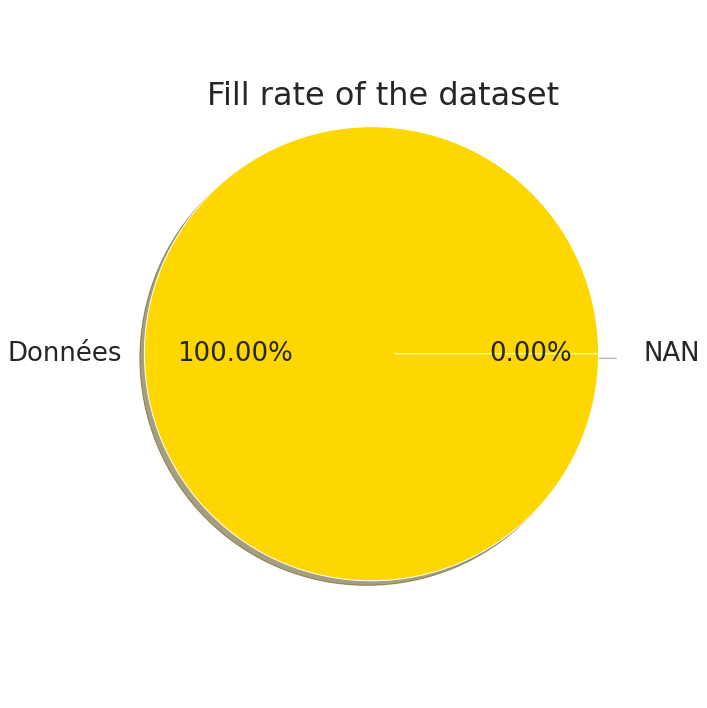

In [ ]:
# %%flake8
pie_NaN(data_final, (10, 10))

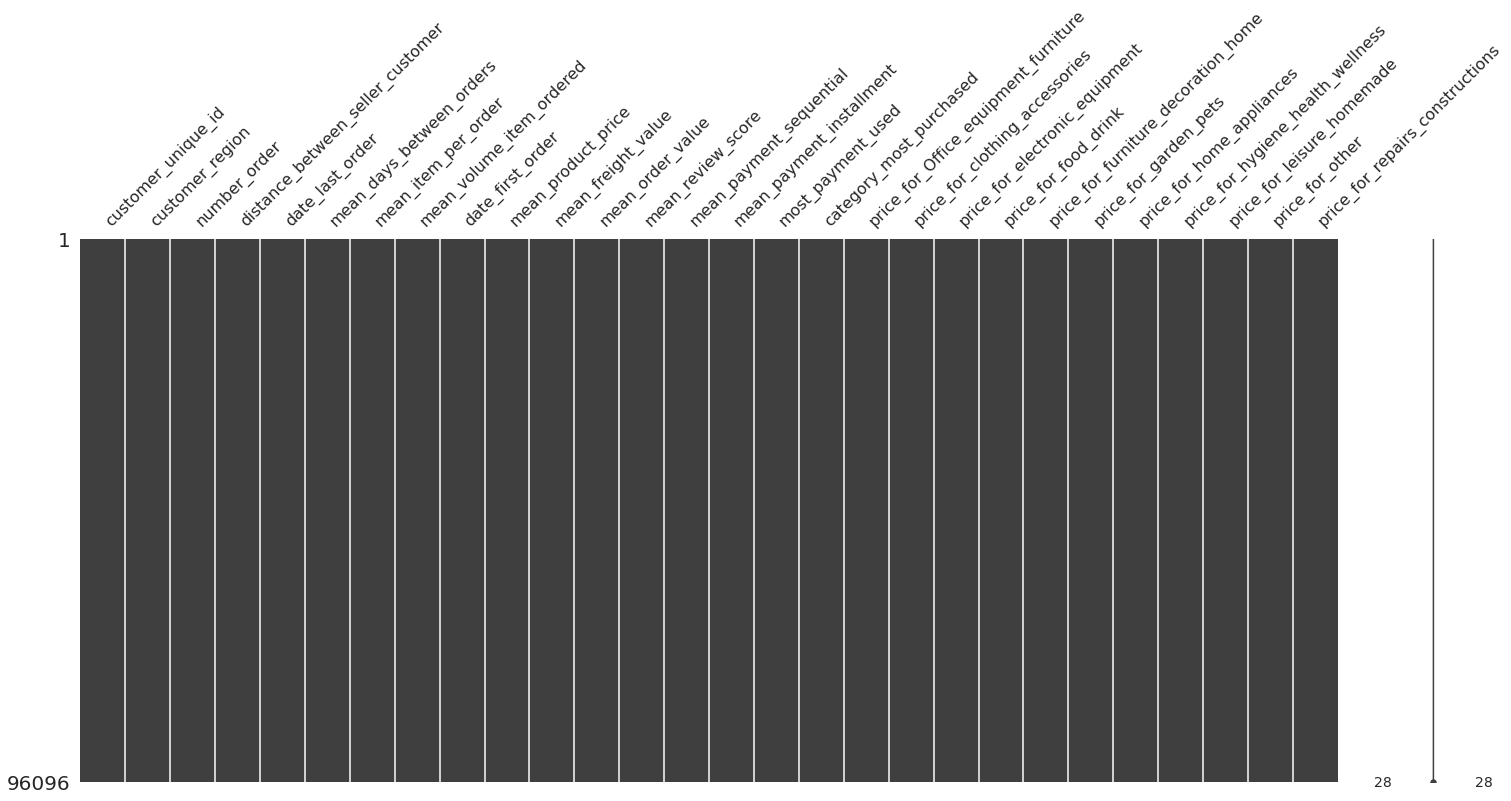

In [ ]:
# %%flake8
msno.matrix(data_final)

There is no missing data.

#### <font color='purple'> Outlier </font>

In [ ]:
data_final.dtypes

customer_unique_id                        object
customer_region                         category
number_order                               int64
distance_between_seller_customer         float64
date_last_order                            int64
mean_days_between_orders                 float64
mean_item_per_order                      float64
mean_volume_item_ordered                 float64
date_first_order                           int64
mean_product_price                       float64
mean_freight_value                       float64
mean_order_value                         float64
mean_review_score                        float64
mean_payment_sequential                  float64
mean_payment_installment                 float64
most_payment_used                         object
category_most_purchased                   object
price_for_Office_equipment_furniture     float64
price_for_clothing_accessories           float64
price_for_electronic_equipment           float64
price_for_food_drink

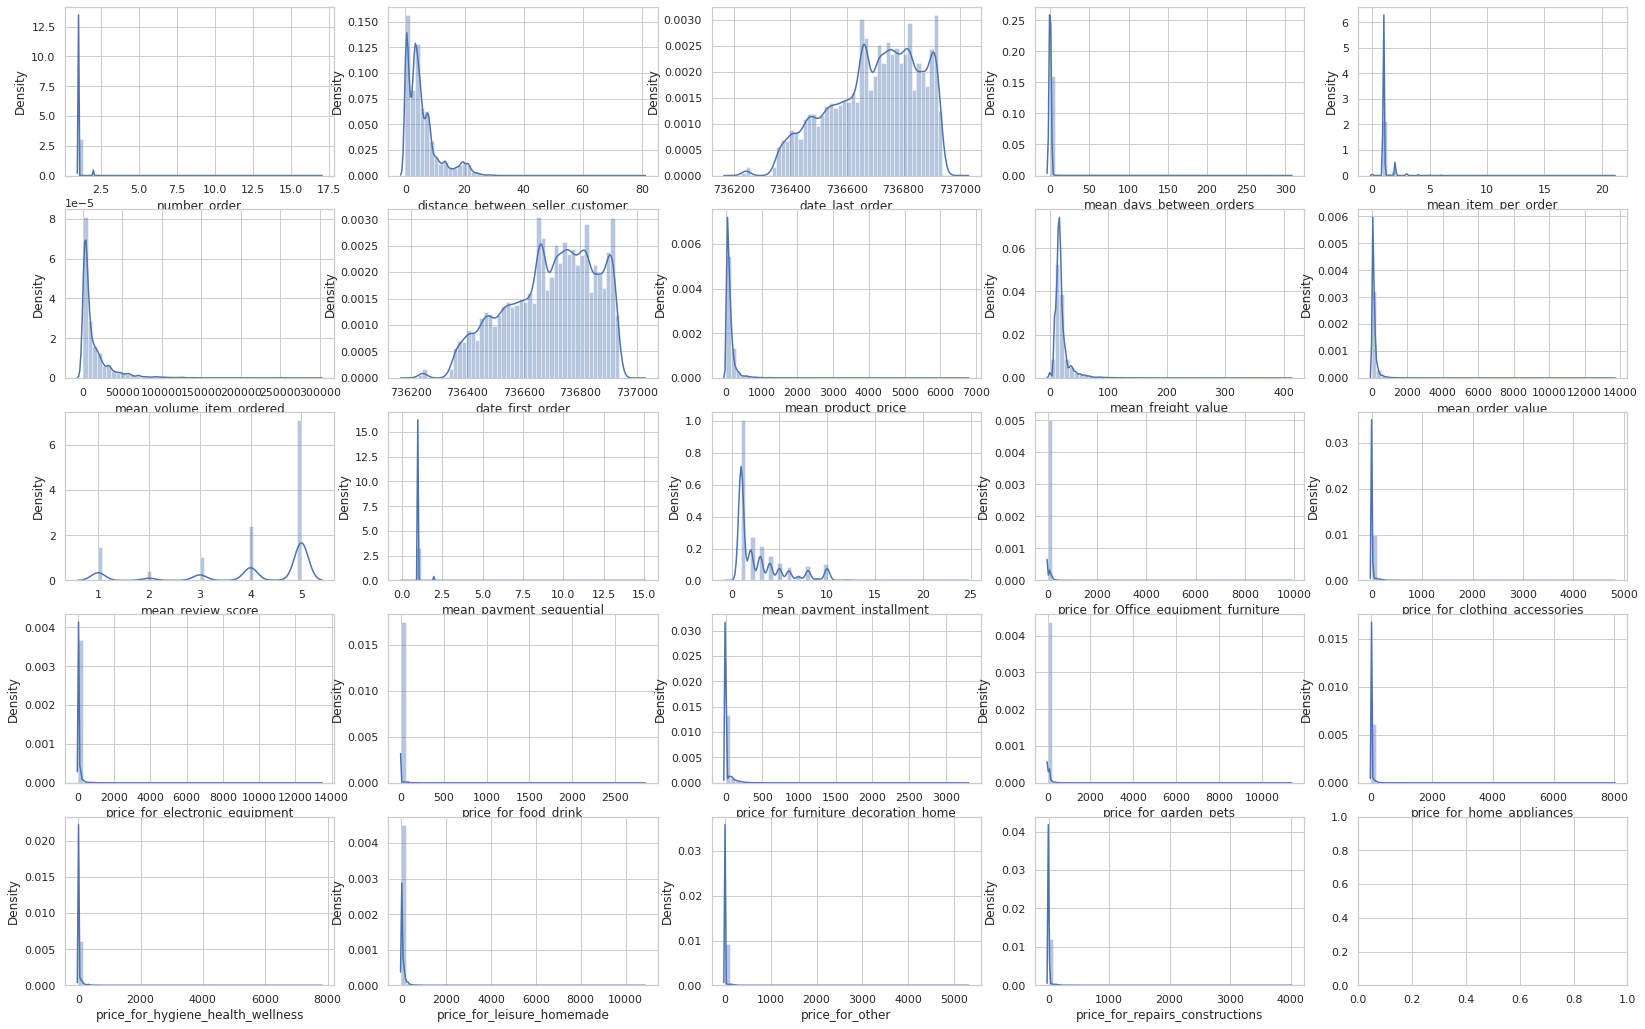

In [ ]:
# %%flake8
plot_multiple_histograms(data_final, (28, 18))

In [ ]:
print("Verification of the normality of the numerical columns of the final dataset.")
verif_normalite(data_final)

Verification of the normality of the numerical columns of the final dataset.
__
number_order
p = 0
H0 is rejected : number_order is not normally distributed
__
distance_between_seller_customer
p = 0
H0 is rejected : distance_between_seller_customer is not normally distributed
__
date_last_order
p = 0
H0 is rejected : date_last_order is not normally distributed
__
mean_days_between_orders
p = 0
H0 is rejected : mean_days_between_orders is not normally distributed
__
mean_item_per_order
p = 0
H0 is rejected : mean_item_per_order is not normally distributed
__
mean_volume_item_ordered
p = 0
H0 is rejected : mean_volume_item_ordered is not normally distributed
__
date_first_order
p = 0
H0 is rejected : date_first_order is not normally distributed
__
mean_product_price
p = 0
H0 is rejected : mean_product_price is not normally distributed
__
mean_freight_value
p = 0
H0 is rejected : mean_freight_value is not normally distributed
__
mean_order_value
p = 0
H0 is rejected : mean_order_value is 

The variables do not have a Normal distribution so the Outliers are removed by the Percentile method.

In [ ]:
# %%flake8
delete_outliers_percentiles(data_final)

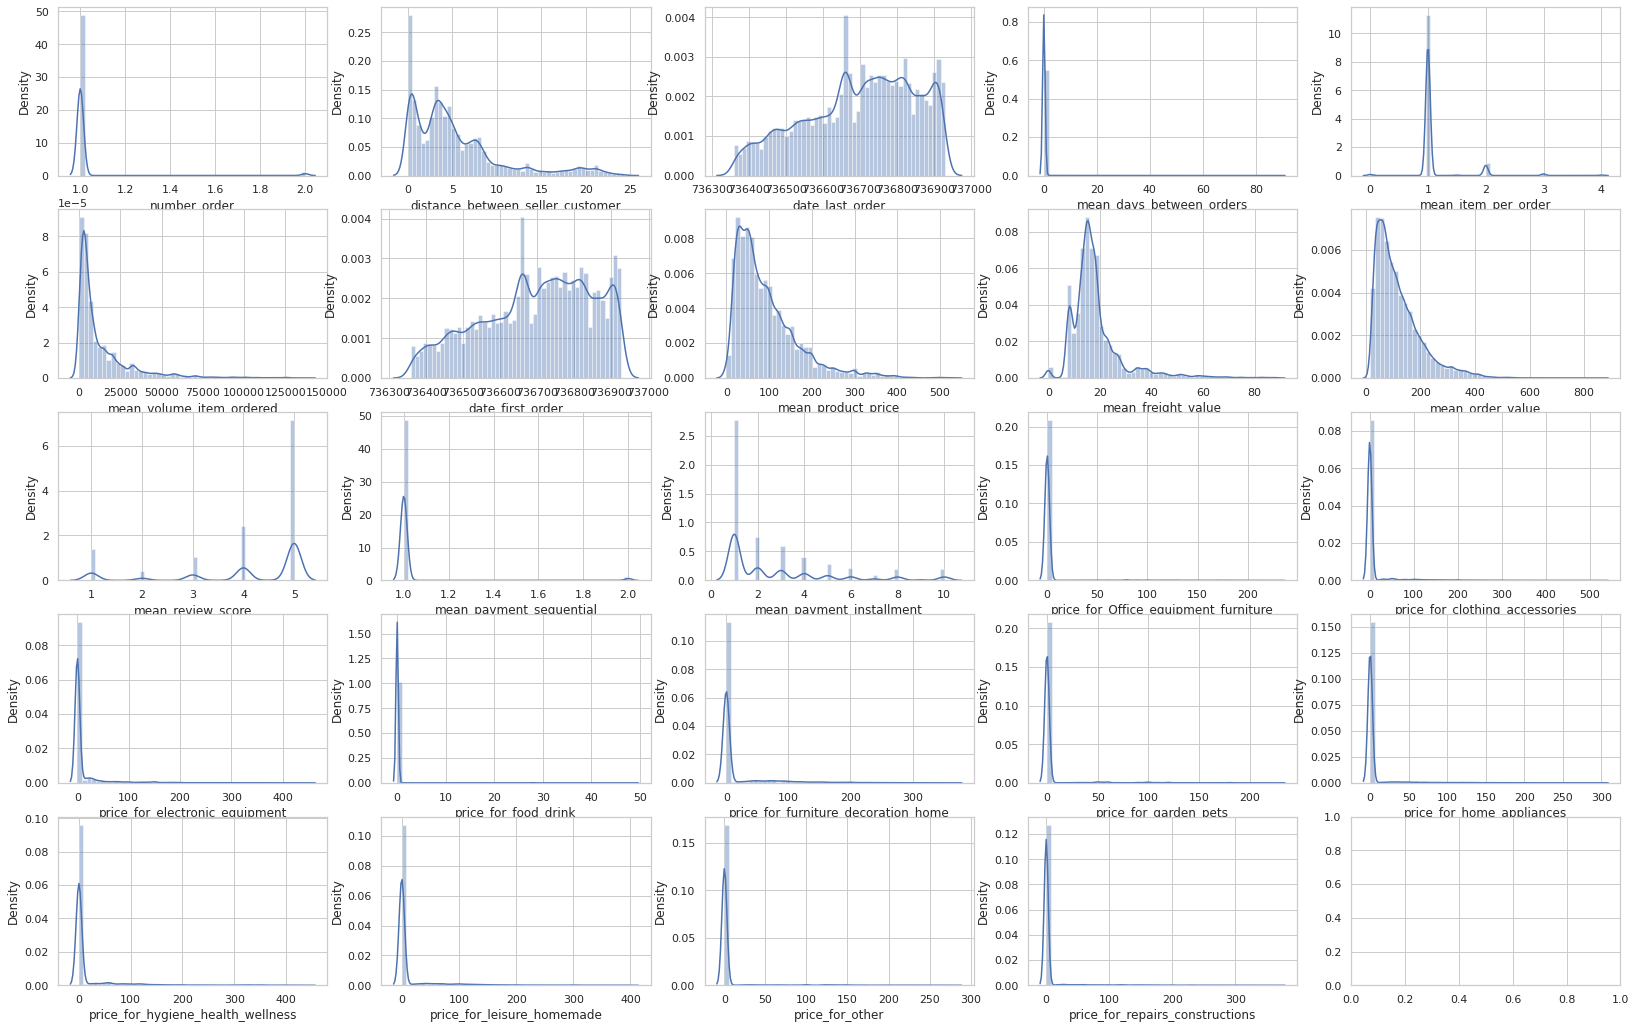

In [ ]:
# %%flake8
plot_multiple_histograms(data_final, (28, 18))

#### <font color='purple'> Répartition des données entre les variables des colonnes </font>

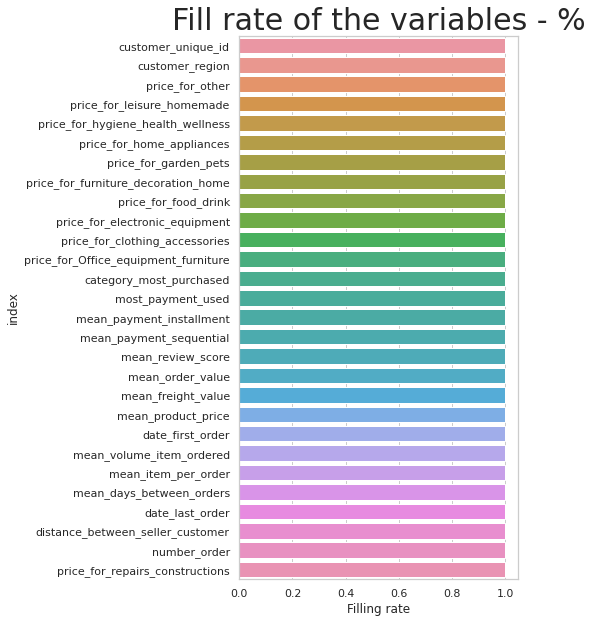

In [ ]:
# # %%flake8
graph_fill_variable(data_final, (5, 10))

Overall, we can say that the majority of the columns are completely filled. Just two columns title and message have many missig value.

In [ ]:
# %%flake8
datasets = [data_final]

list_names = ['bd_finale_olist']

resume = []
for name in list_names:
    pos = list_names.index(name)
    dataset = datasets[pos]
    print("General presentation of the dataset {}." .format(name))
    informations(dataset)
    resume.append(
        {
            'Dataset': name,
            'Lines': dataset.shape[0],
            'Columns': dataset.shape[1]
        }
    )

pd.DataFrame(resume)

General presentation of the dataset bd_finale_olist.

 Overview of the dataset : 

                 customer_unique_id  ... price_for_repairs_constructions
0  861eff4711a542e4b93843c6dd7febb0  ...                             0.0
1  290c77bc529b7ac935b93aa66c333dc3  ...                             0.0
2  060e732b5b29e8181a18229c7b0b2b5e  ...                             0.0
3  259dac757896d24d7702b9acbbff3f3c  ...                             0.0
4  345ecd01c38d18a9036ed96c73b8d066  ...                             0.0

[5 rows x 28 columns]
The dataset has 85408 rows and 28 columns. 
 

Column's name : 

Index(['customer_unique_id', 'customer_region', 'number_order',
       'distance_between_seller_customer', 'date_last_order',
       'mean_days_between_orders', 'mean_item_per_order',
       'mean_volume_item_ordered', 'date_first_order', 'mean_product_price',
       'mean_freight_value', 'mean_order_value', 'mean_review_score',
       'mean_payment_sequential', 'mean_payment_installment'

Dataset  Lines  Columns
0  bd_finale_olist  85408       28

#### <font color='purple'> Data Type </font>

In [ ]:
# %%flake8
data_final.dtypes

customer_unique_id                        object
customer_region                         category
number_order                             float64
distance_between_seller_customer         float64
date_last_order                          float64
mean_days_between_orders                 float64
mean_item_per_order                      float64
mean_volume_item_ordered                 float64
date_first_order                         float64
mean_product_price                       float64
mean_freight_value                       float64
mean_order_value                         float64
mean_review_score                        float64
mean_payment_sequential                  float64
mean_payment_installment                 float64
most_payment_used                         object
category_most_purchased                   object
price_for_Office_equipment_furniture     float64
price_for_clothing_accessories           float64
price_for_electronic_equipment           float64
price_for_food_drink

## <font color='green'>Multivariate Analysis </font>

### <font color='purple'>Corelation</font>

Text(0.5, 1.0, 'Correlation matrix between the different variables of the dataset')

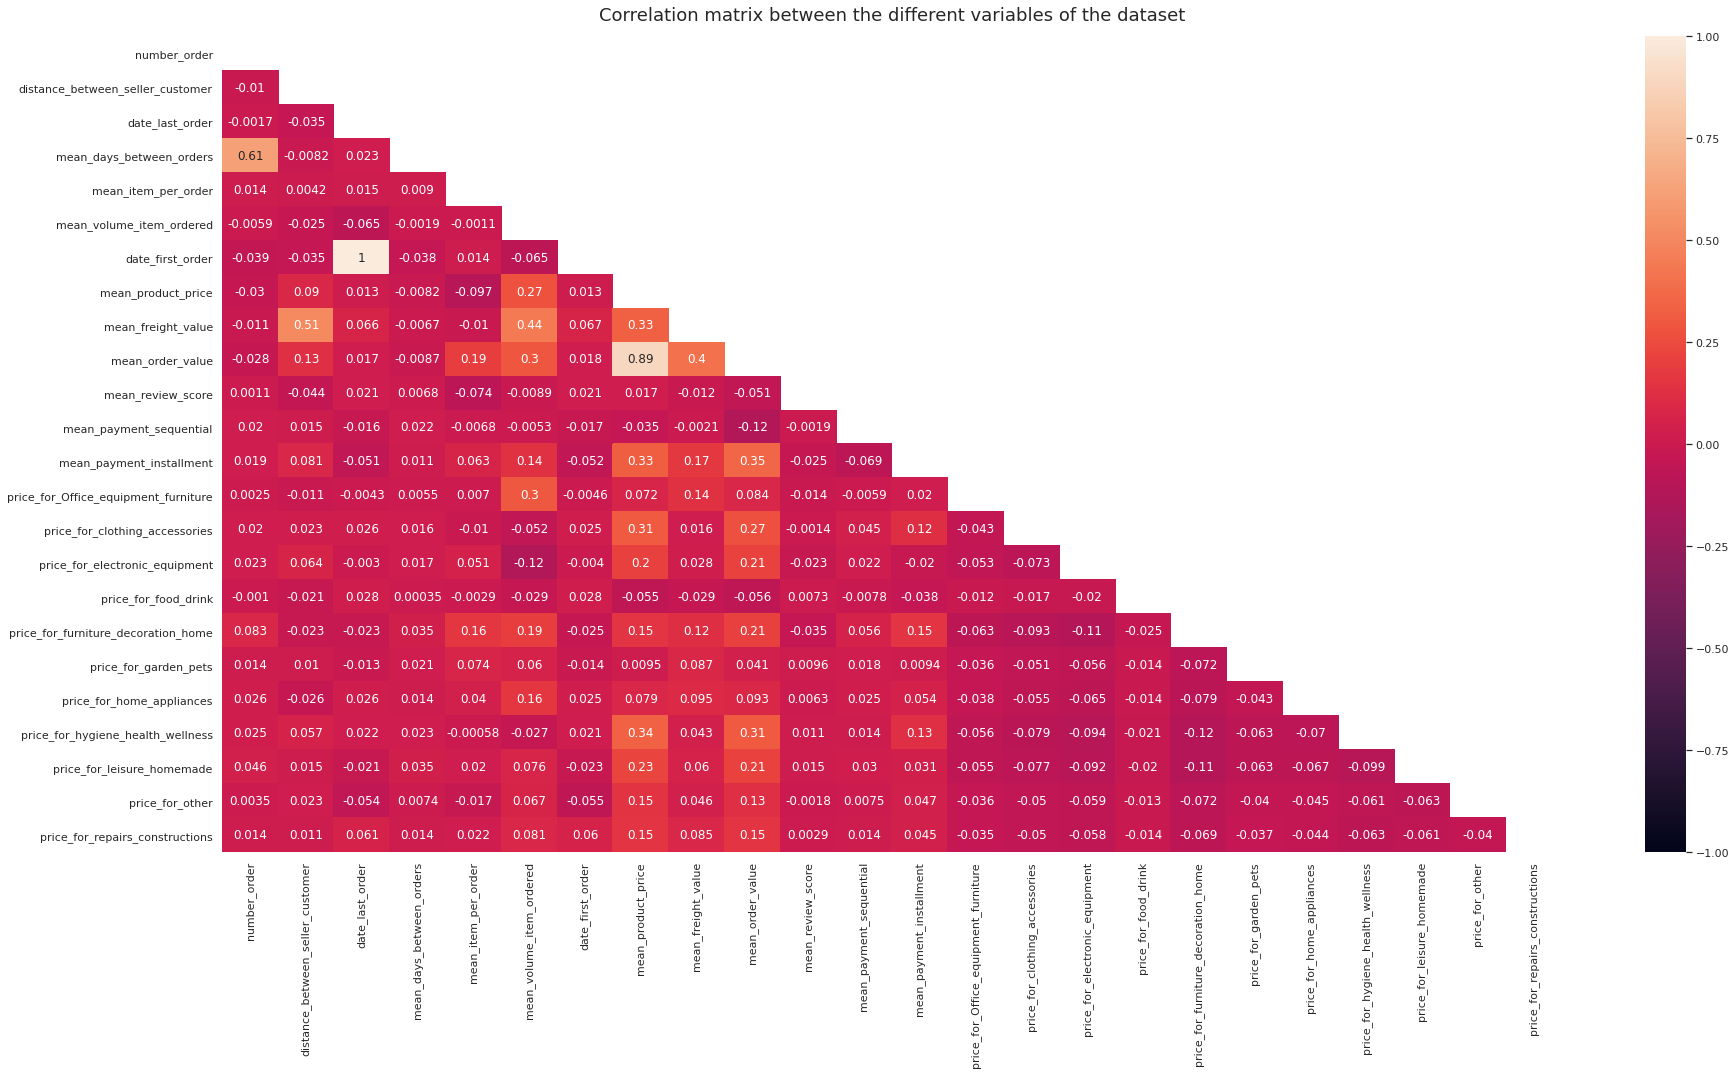

In [ ]:
# %%flake8
plt.figure(figsize=(30, 15))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(data_final.corr(), dtype=np.bool))
heatmap = sns.heatmap(data_final.corr(), mask=mask, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation matrix between the different variables of the '
                  'dataset', fontdict={'fontsize': 18}, pad=16)

In [ ]:
data_final.columns

Index(['customer_unique_id', 'customer_region', 'number_order',
       'distance_between_seller_customer', 'date_last_order',
       'mean_days_between_orders', 'mean_item_per_order',
       'mean_volume_item_ordered', 'date_first_order', 'mean_product_price',
       'mean_freight_value', 'mean_order_value', 'mean_review_score',
       'mean_payment_sequential', 'mean_payment_installment',
       'most_payment_used', 'category_most_purchased',
       'price_for_Office_equipment_furniture',
       'price_for_clothing_accessories', 'price_for_electronic_equipment',
       'price_for_food_drink', 'price_for_furniture_decoration_home',
       'price_for_garden_pets', 'price_for_home_appliances',
       'price_for_hygiene_health_wellness', 'price_for_leisure_homemade',
       'price_for_other', 'price_for_repairs_constructions'],
      dtype='object')

The correlation coefficient is between -1 and 1.
The closer the coefficient is to 1, the stronger the positive linear relationship between the variables.
The closer the coefficient is to -1, the stronger the negative linear relationship between the variables.
The closer the coefficient is to 0, the weaker the linear relationship between the variables.

To determine which variables are strongly related to each other, a limit of 0.20 for the correlation coefficient was arbitrarily chosen.

Analysis of the relationships between certains variables:   

* distance_between_seller_customer
<ul>
<li>mean_freight_value</li>
</ul>


* number_order
<ul>
<li>mean_days_between_orders</li>
<li>total_nb_item_ordered</li>
</ul> 


* total_nb_item_ordered
<ul>
<li>mean_item_per_order</li>
</ul>


* mean_item_per_order
<ul>
<li>mean_order_value</li>
</ul>


* mean_volume_item_ordered
<ul>
<li>mean_product_price</li>
<li>mean_freight_value</li>
<li>mean_order_value</li>
<li>max_order_value</li>
<li>min_order_value</li>
</ul>


* mean_product_price
<ul>
<li>mean_freight_value</li>
<li>mean_order_value</li>
<li>max_order_value</li>
<li>min_order_value</li>
<li>mean_payment_installment</li>
</ul>


* mean_freight_value
<ul>
<li>mean_order_value</li>
<li>max_order_value</li>
<li>min_order_value</li>
<li>mean_payment_installment</li>
</ul>


* mean_order_value
<ul>
<li>mean_payment_installment</li>
</ul>  


* max_order_value
<ul>
<li>mean_payment_installment</li>
</ul> 


* min_order_value
<ul>
<li>mean_payment_installment</li>
</ul> 

### <font color='purple'>Scatter plot of the most correlated variables</font>

#### <font color='olive'>Scatter plot with distance_between_seller_customer</font>

In [ ]:
data_final.shape

(85408, 28)

In [ ]:
# %%flake8
subset = data_final.sample(n=5000)

The Pearson coefficient is 0.50


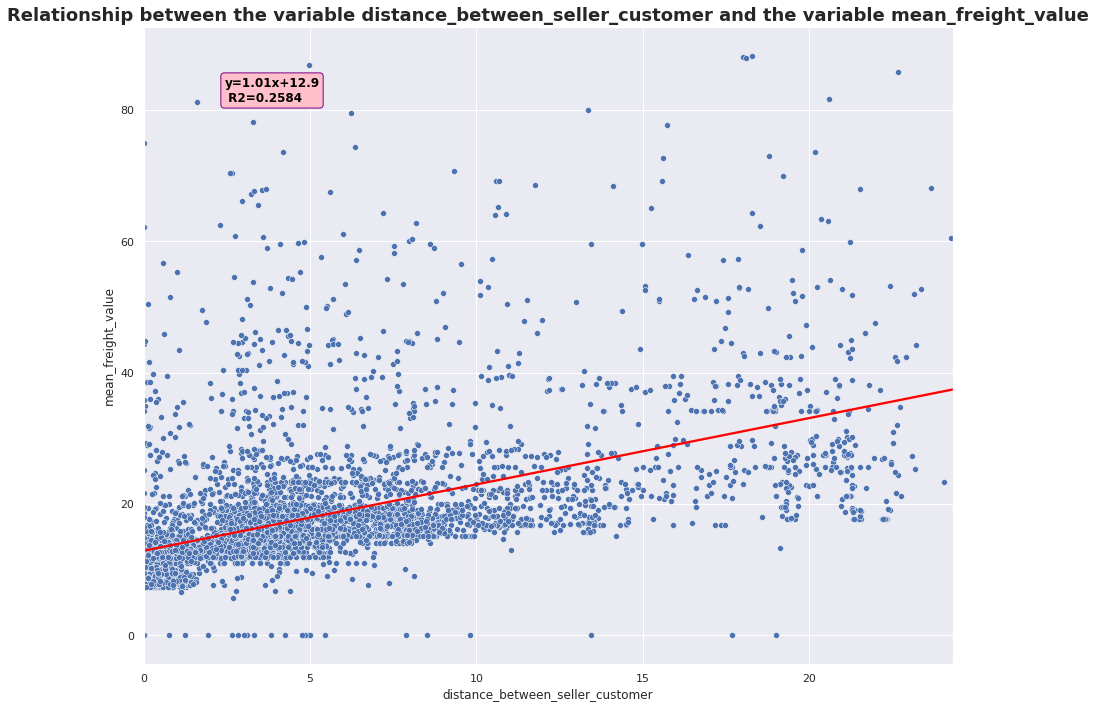

In [ ]:
# %%flake8
scatter_plot(subset, "distance_between_seller_customer", "mean_freight_value", data_final)

Thanks to this graph, we can see that there is a relationship between the distance seller-buyer and the shipping costs. It is possible to say that the greater the distance between a seller and a buyer, the higher the price of shipping costs will be.

#### <font color='olive'>Scatter plot with mean_item_per_order</font>

The Pearson coefficient is 0.17


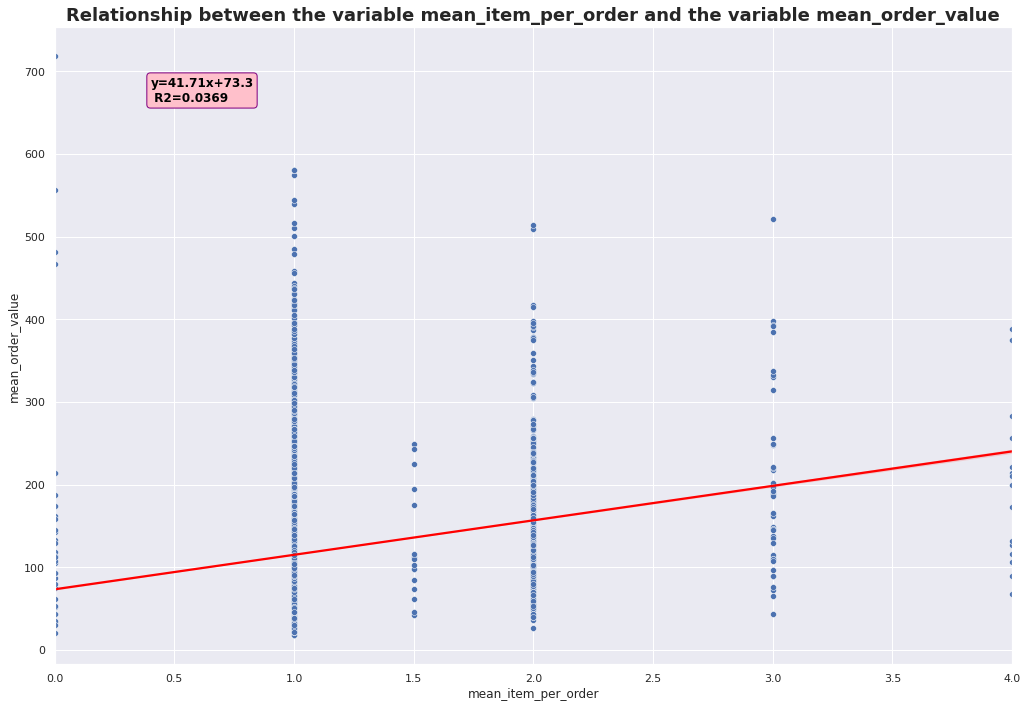

In [ ]:
# %%flake8
scatter_plot(subset, "mean_item_per_order", "mean_order_value", data_final)

Thanks to this graph, we can see that there is a relationship between the average number of products per order and the value of each order. It is possible to say that the more products there are in the order, the higher the price of the order will be.

#### <font color='olive'>Scatter plot with mean_volume_item_ordered</font>

The Pearson coefficient is 0.27


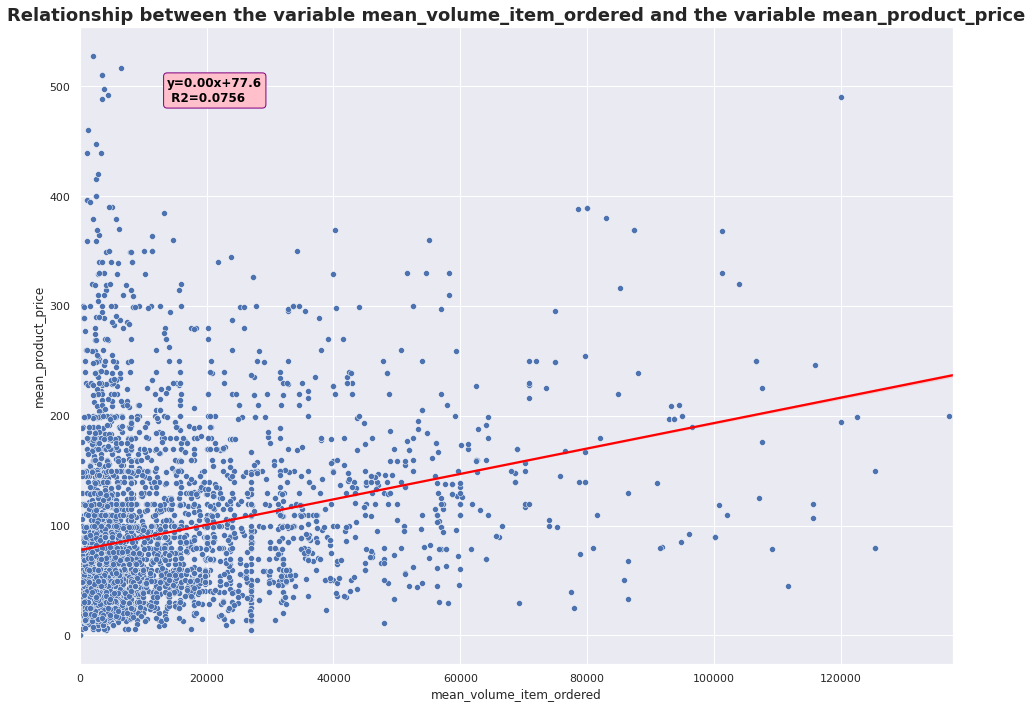

In [ ]:
# %%flake8
scatter_plot(subset, "mean_volume_item_ordered", "mean_product_price", data_final)

Thanks to this graph, we can see that there is a relationship between the volume of a product and its price. It is possible to say that the more a product is voluminous, the higher its price will be.

The Pearson coefficient is 0.43


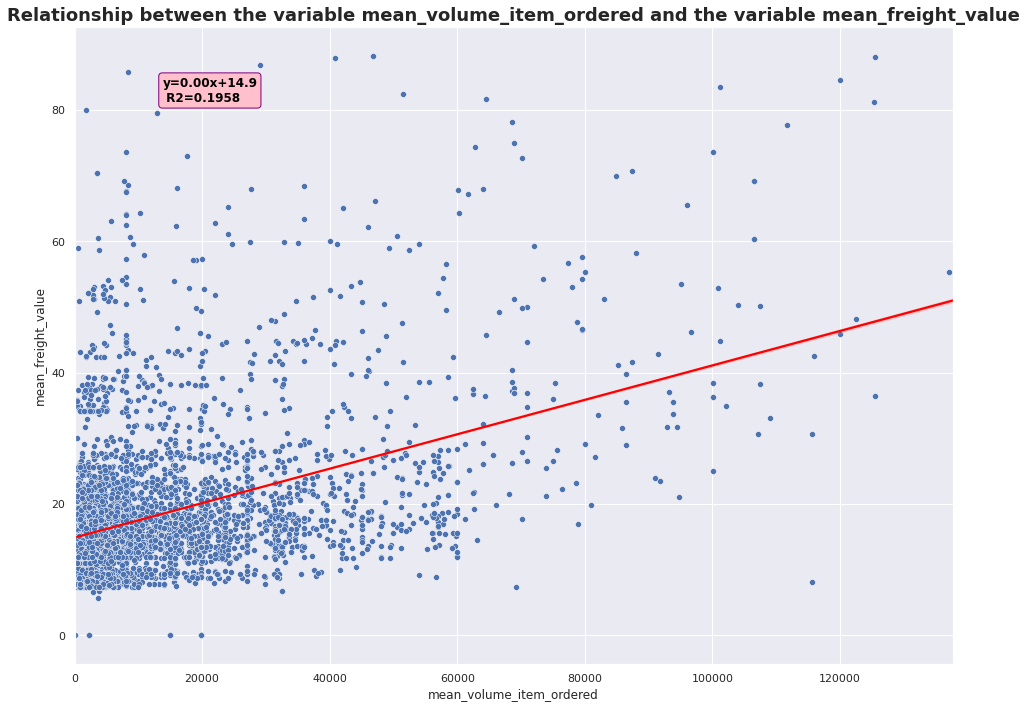

In [ ]:
# %%flake8
scatter_plot(subset, "mean_volume_item_ordered", "mean_freight_value", data_final)

Thanks to this graph, we can see that there is a relationship between the volume of a product and its shipping costs. It is possible to say that the more a product is voluminous, the higher its shipping costs will be.

The Pearson coefficient is 0.28


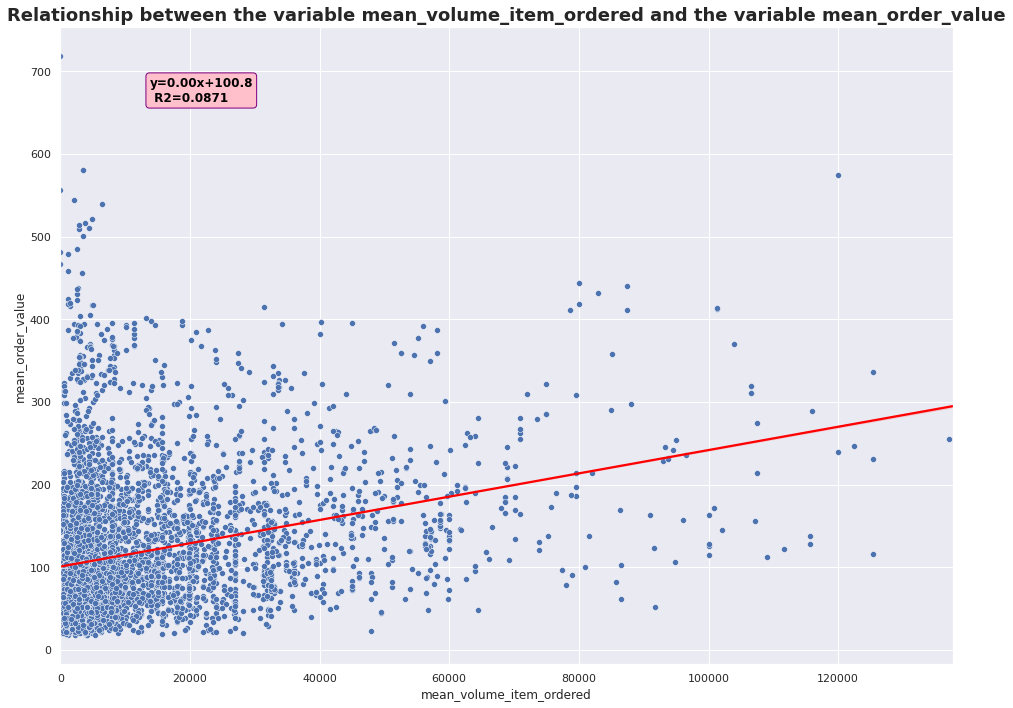

In [ ]:
# %%flake8
scatter_plot(subset, "mean_volume_item_ordered", "mean_order_value", data_final)

Thanks to this graph, we can see that there is a relationship between the volume of a product and the price of the order. It is possible to say that the more a product is voluminous, the more the price of the order will be high.

#### <font color='olive'>Scatter plot with mean_product_price</font>

The Pearson coefficient is 0.36


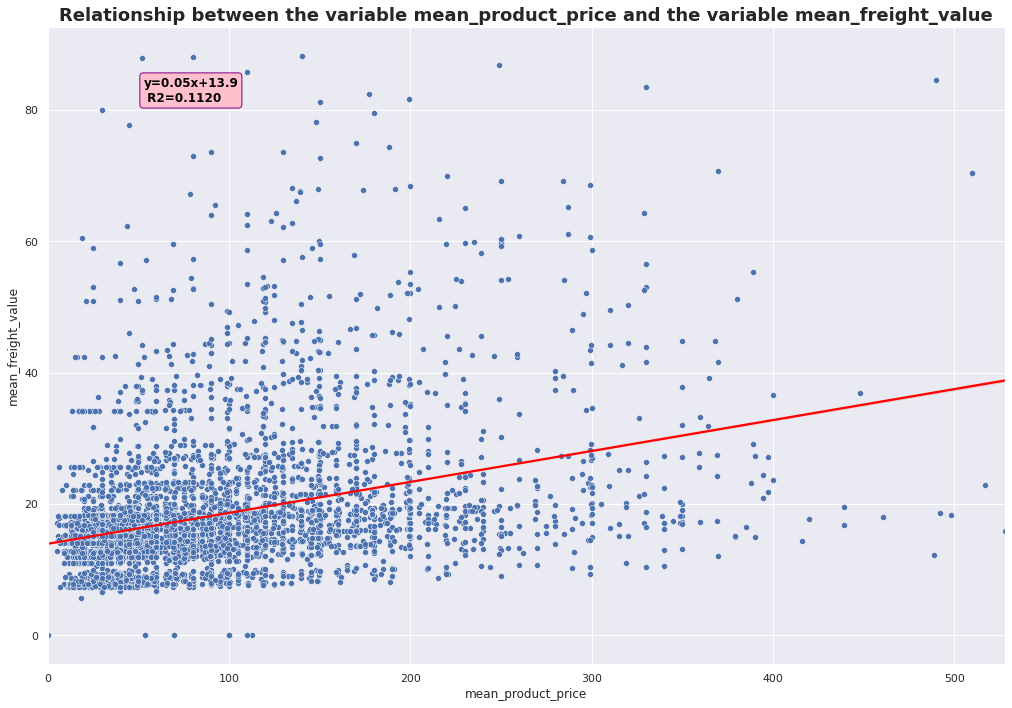

In [ ]:
# %%flake8
scatter_plot(subset, "mean_product_price", "mean_freight_value", data_final)

Thanks to this graph, we can see that there is a relationship between the price of a product and the shipping costs.   It is possible to say that the more expensive a product is, the higher the shipping costs will be.

The Pearson coefficient is 0.89


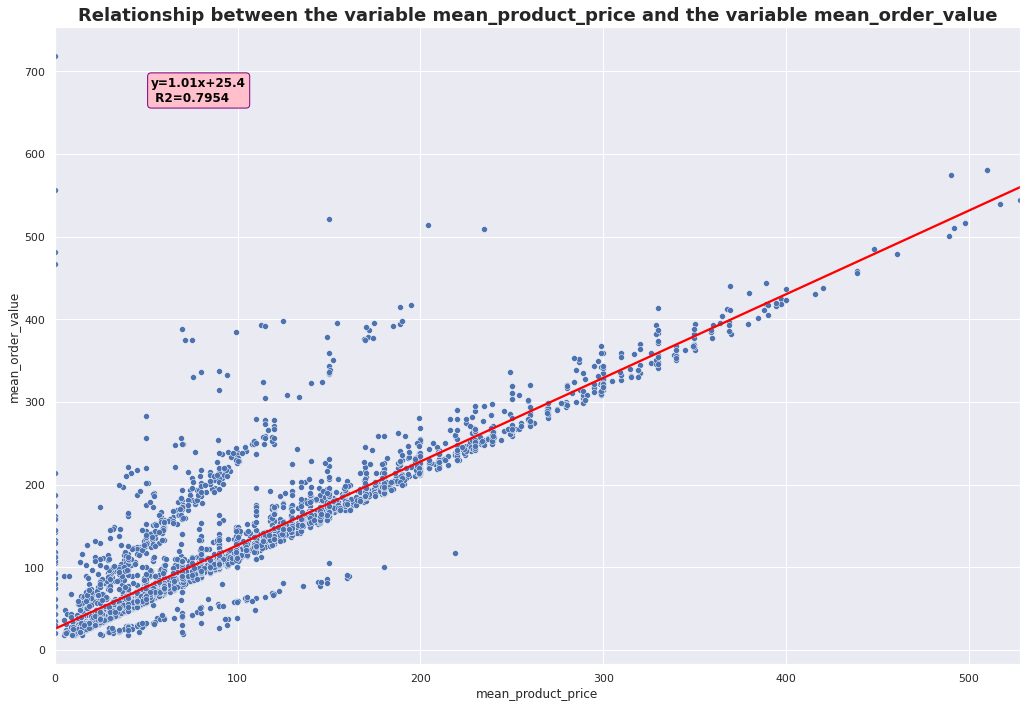

In [ ]:
# %%flake8
scatter_plot(subset, "mean_product_price", "mean_order_value", data_final)

Thanks to this graph, we can see that there is a relationship between the price of a product and the total price of the order.   It is possible to say that the more expensive a product is, the higher the price of the order will be.

The Pearson coefficient is 0.37


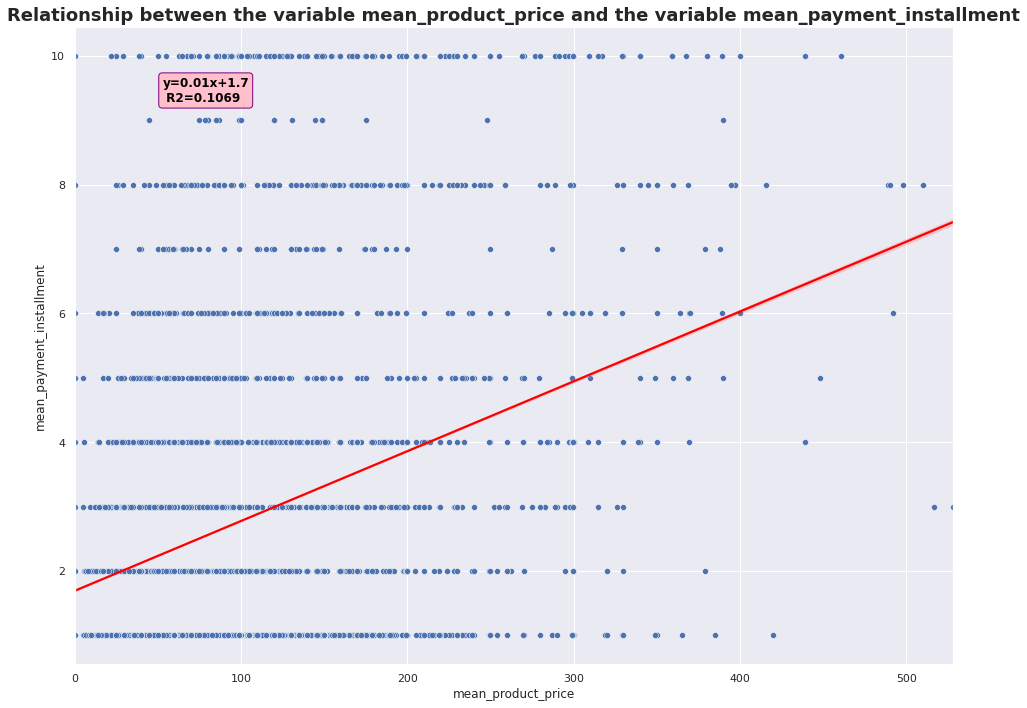

In [ ]:
# %%flake8
scatter_plot(subset, "mean_product_price", "mean_payment_installment", data_final)

Thanks to this graph, we can see that there is a relationship between the price of a product and the total price of the order.   It is possible to say that the more expensive a product is, the higher the number of payments will be.

#### <font color='olive'>Scatter plot with mean_freight_value</font>

The Pearson coefficient is 0.36


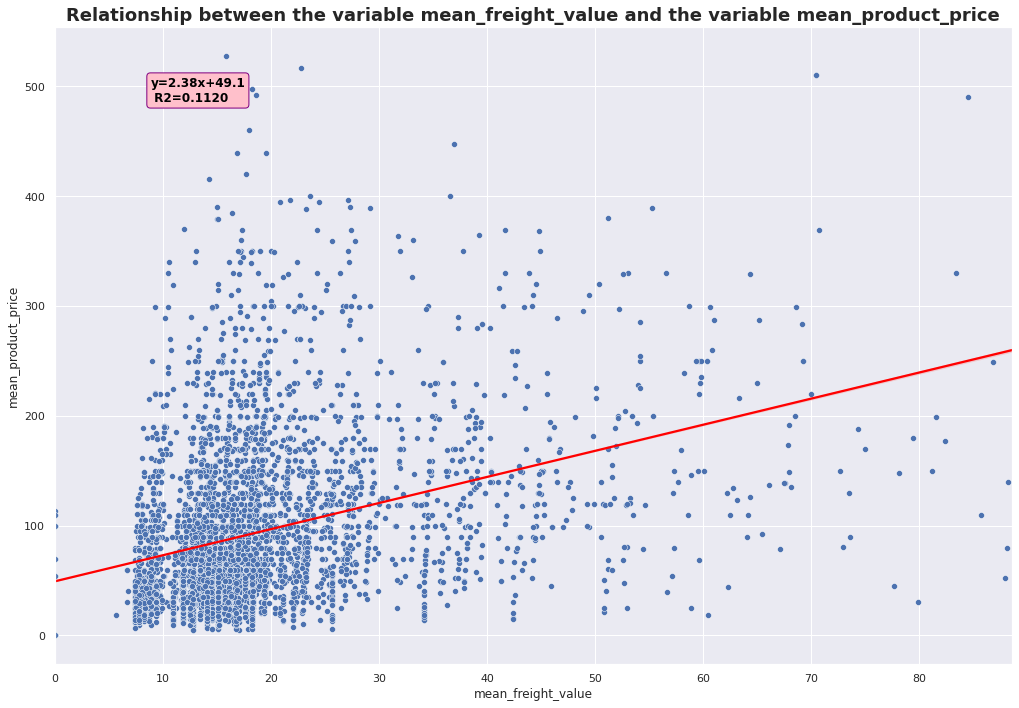

In [ ]:
# %%flake8
scatter_plot(subset, "mean_freight_value", "mean_product_price", data_final)

Thanks to this graph, we can see that there is a relationship between the shipping costs and the price of a product. We can say that the higher the shipping costs are, the more expensive the product will be.

The Pearson coefficient is 0.41


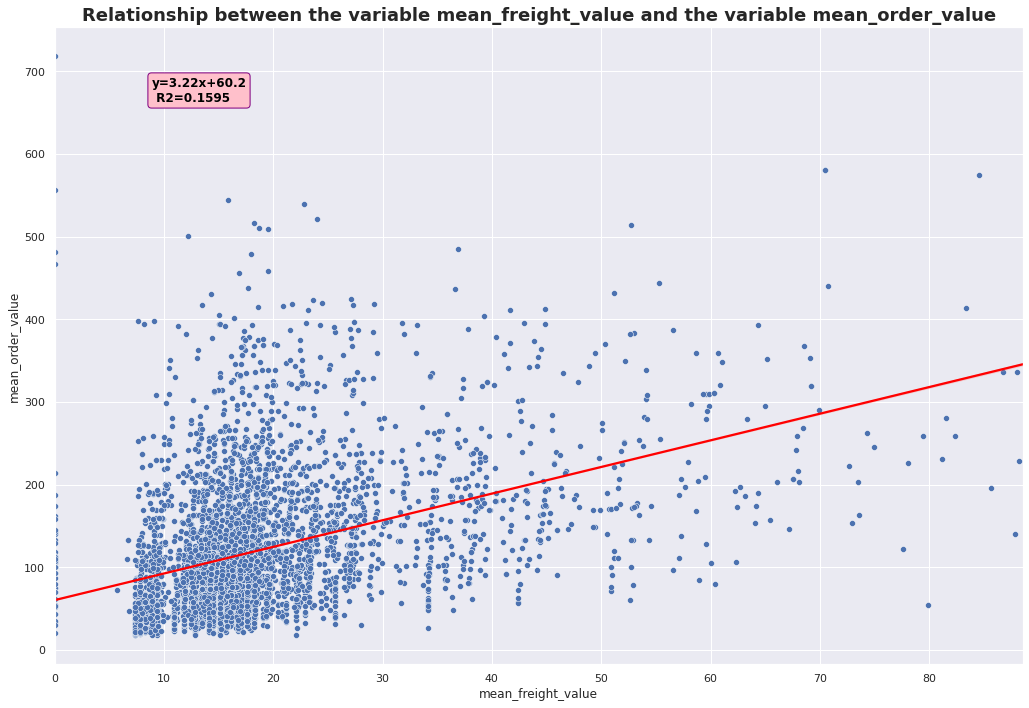

In [ ]:
# %%flake8
scatter_plot(subset, "mean_freight_value", "mean_order_value", data_final)

Thanks to this graph, we can see that there is a relationship between the shipping costs and the price of a product. We can say that the higher the shipping costs are, the higher the price of the order will be.

The Pearson coefficient is 0.17


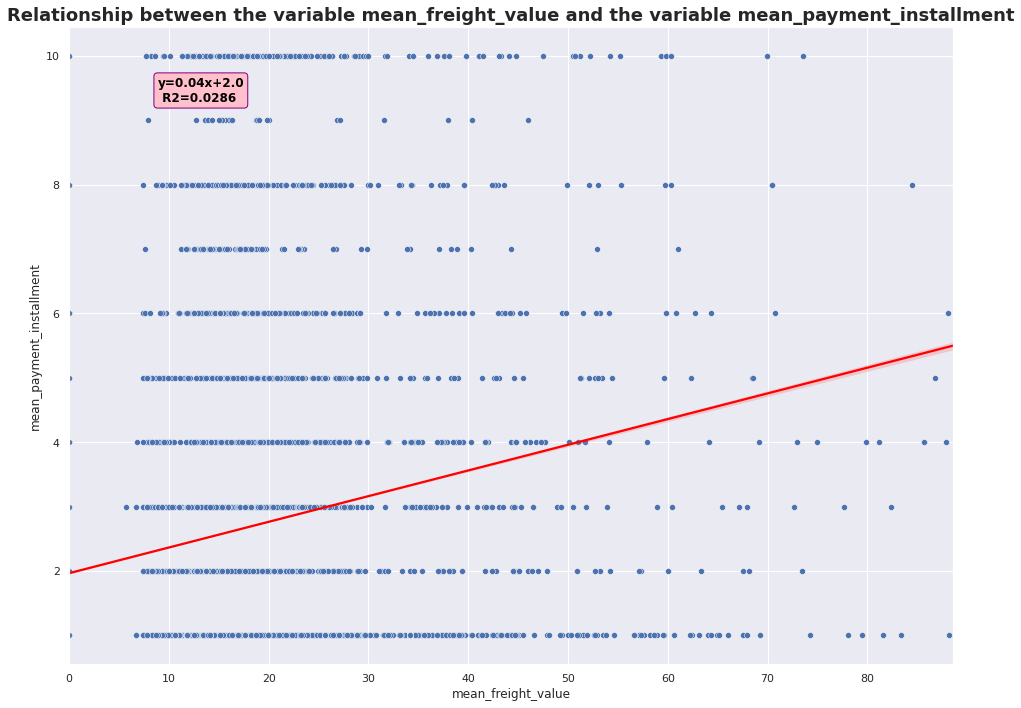

In [ ]:
# %%flake8
scatter_plot(subset, "mean_freight_value", "mean_payment_installment", data_final)

Thanks to this graph, we can see that there is a relationship between the shipping costs and tthe number of payments. We can say that the higher the shipping costs are, the higher the number of payments will be.

#### <font color='olive'>Scatter plot with mean_order_value</font>

The Pearson coefficient is 0.39


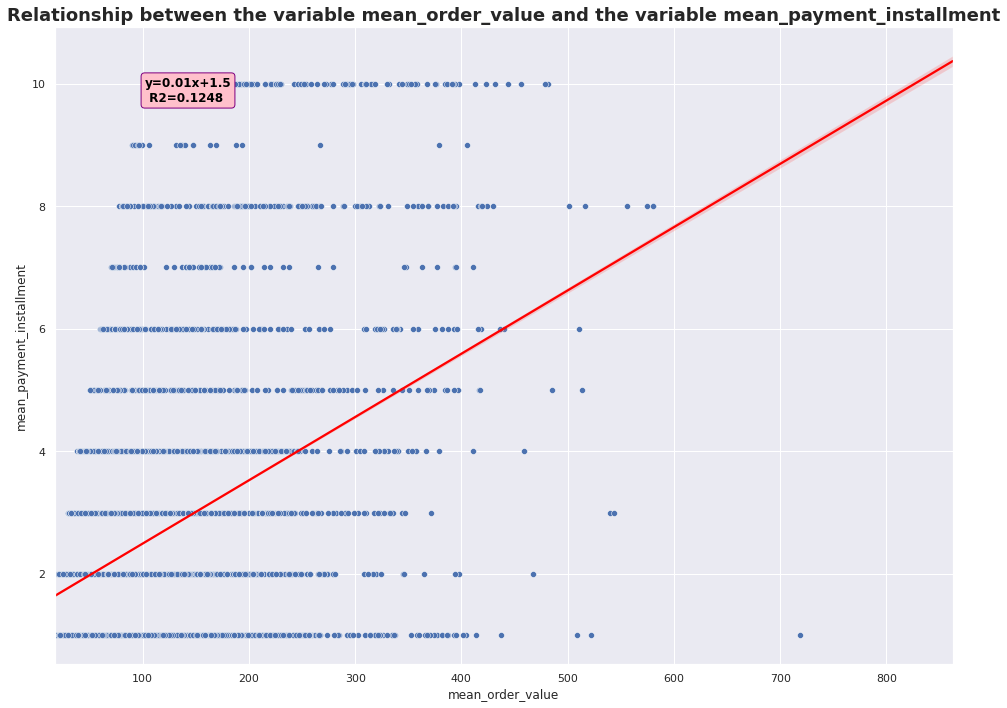

In [ ]:
# %%flake8
scatter_plot(subset, "mean_order_value", "mean_payment_installment", data_final)

Thanks to this graph, we can see that there is a relationship between the total price of the order and the price of a product. We can say that the higher the total price of the order, the higher the number of payments will be.

## <font color='green'> transformation of the final dataset into CSV </font>

In [ ]:
# %%flake8
# sur google colab
from google.colab import drive
drive.mount('/content/drive/')
data_final.to_csv('bd_olist_finale.csv', index=False)
!cp bd_olist_finale.csv /content/drive/My\ Drive/

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
"""# %%flake8
data_final.to_csv('csv_produits/bd_olist_finale.csv', index=False)"""

"# %%flake8\ndata_final.to_csv('csv_produits/bd_olist_finale.csv', index=False)"

In [ ]:
data_final.head()

customer_unique_id  ... price_for_repairs_constructions
0  861eff4711a542e4b93843c6dd7febb0  ...                             0.0
1  290c77bc529b7ac935b93aa66c333dc3  ...                             0.0
2  060e732b5b29e8181a18229c7b0b2b5e  ...                             0.0
3  259dac757896d24d7702b9acbbff3f3c  ...                             0.0
4  345ecd01c38d18a9036ed96c73b8d066  ...                             0.0

[5 rows x 28 columns]

In [ ]:
data_final.dtypes

customer_unique_id                        object
customer_region                         category
number_order                             float64
distance_between_seller_customer         float64
date_last_order                          float64
mean_days_between_orders                 float64
mean_item_per_order                      float64
mean_volume_item_ordered                 float64
date_first_order                         float64
mean_product_price                       float64
mean_freight_value                       float64
mean_order_value                         float64
mean_review_score                        float64
mean_payment_sequential                  float64
mean_payment_installment                 float64
most_payment_used                         object
category_most_purchased                   object
price_for_Office_equipment_furniture     float64
price_for_clothing_accessories           float64
price_for_electronic_equipment           float64
price_for_food_drink

In [ ]:
data_final.shape

(85408, 28)